In [22]:
import pandas as pd
final = pd.read_csv(r'final.csv', encoding = 'CP949')
final

시도     시군구        행정번호    년도  우울증환자수  평균연령    총인구수  스트레스인지율    고용률  \
0       서울특별시   서울종로구  1111000000  2018   14837  44.2  153065     34.2  59.60   
1       서울특별시    서울중구  1114000000  2018    4352  44.6  125725     28.3  59.60   
2       서울특별시   서울용산구  1117000000  2018    2370  43.6  228999     20.0  59.60   
3       서울특별시   서울성동구  1120000000  2018    3657  42.0  308221     31.3  59.60   
4       서울특별시   서울광진구  1121500000  2018    6917  41.4  355559     29.4  59.60   
...       ...     ...         ...   ...     ...   ...     ...      ...    ...   
1245     경상남도   경남함양군  4887000000  2022     283  54.5   37708     27.5  68.85   
1246     경상남도   경남거창군  4888000000  2022     794  50.4   60387     23.2  67.00   
1247     경상남도   경남합천군  4889000000  2022     185  57.8   42142     23.1  67.95   
1248  제주특별자치도   제주제주시  5011000000  2022   11503  42.5  493389     25.0  67.15   
1249  제주특별자치도  제주서귀포시  5013000000  2022    2743  45.8  184770     25.0  72.95   

      코로나확진자수  1인당 정신건강예산(원)  공공시설개수  
0           0           5326      44  
1           0           5326      42  
2           0           5326      53  
3           0           5326      50  
4           0           5326      47  
...       ...            ...     ...  
1245    15896           6119       6  
1246    29267           6119      14  
1247    15704           6119       1  
1248   271444           8662     198  
1249    89872           8662      54  

[1250 rows x 12 columns]

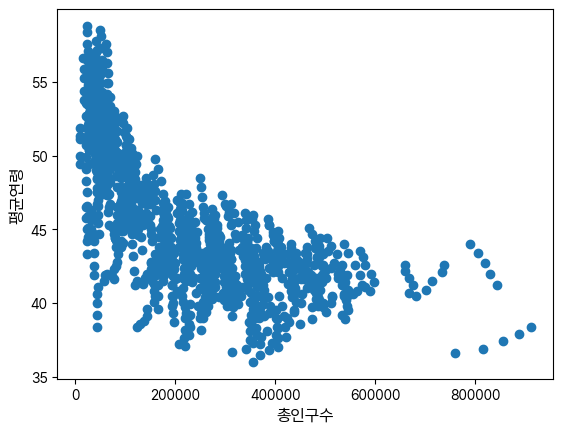

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/Pretendard-Regular.ttf"
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()

plt.scatter(final['총인구수'], final['평균연령'])
plt.xlabel('총인구수', fontproperties=font_prop)
plt.ylabel('평균연령', fontproperties=font_prop)

plt.show()

In [25]:
final.describe()

행정번호          년도        우울증환자수         평균연령           총인구수  \
count  1.250000e+03  1250.00000   1250.000000  1250.000000    1250.000000   
mean   3.814814e+09  2020.00000   3776.165600    46.026720  206866.232000   
std    1.131174e+09     1.41478   4074.322496     4.944874  166228.852267   
min    1.111000e+09  2018.00000      0.000000    36.000000    8867.000000   
25%    2.917000e+09  2019.00000    515.250000    42.200000   55743.000000   
50%    4.272500e+09  2020.00000   2889.000000    44.800000  176398.500000   
75%    4.673000e+09  2021.00000   5581.250000    50.100000  312786.500000   
max    5.013000e+09  2022.00000  32947.000000    58.800000  910814.000000   

           스트레스인지율         고용률        코로나확진자수  1인당 정신건강예산(원)       공공시설개수  
count  1250.000000  1250.00000    1250.000000     1250.00000  1250.000000  
mean     25.172800    62.10044   23230.667200     6624.11040    75.183200  
std       4.360287     5.61868   62572.915299     2275.40401    74.886116  
min       6.200000    46.35000       0.000000     2758.00000     0.000000  
25%      22.500000    58.36250       0.000000     5298.00000    23.000000  
50%      25.500000    60.70000      84.000000     6207.00000    56.000000  
75%      28.100000    65.73750    3100.250000     8050.00000   108.000000  
max      39.800000    84.60000  564132.000000    13975.00000   617.000000

In [28]:
final['우울증지수'] = round(final['우울증환자수'] / final['총인구수'] * 100,2)
final.head()

시도    시군구        행정번호    년도  우울증환자수  평균연령    총인구수  스트레스인지율   고용률  \
0  서울특별시  서울종로구  1111000000  2018   14837  44.2  153065     34.2  59.6   
1  서울특별시   서울중구  1114000000  2018    4352  44.6  125725     28.3  59.6   
2  서울특별시  서울용산구  1117000000  2018    2370  43.6  228999     20.0  59.6   
3  서울특별시  서울성동구  1120000000  2018    3657  42.0  308221     31.3  59.6   
4  서울특별시  서울광진구  1121500000  2018    6917  41.4  355559     29.4  59.6   

   코로나확진자수  1인당 정신건강예산(원)  공공시설개수  우울증지수  
0        0           5326      44   9.69  
1        0           5326      42   3.46  
2        0           5326      53   1.03  
3        0           5326      50   1.19  
4        0           5326      47   1.95

C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


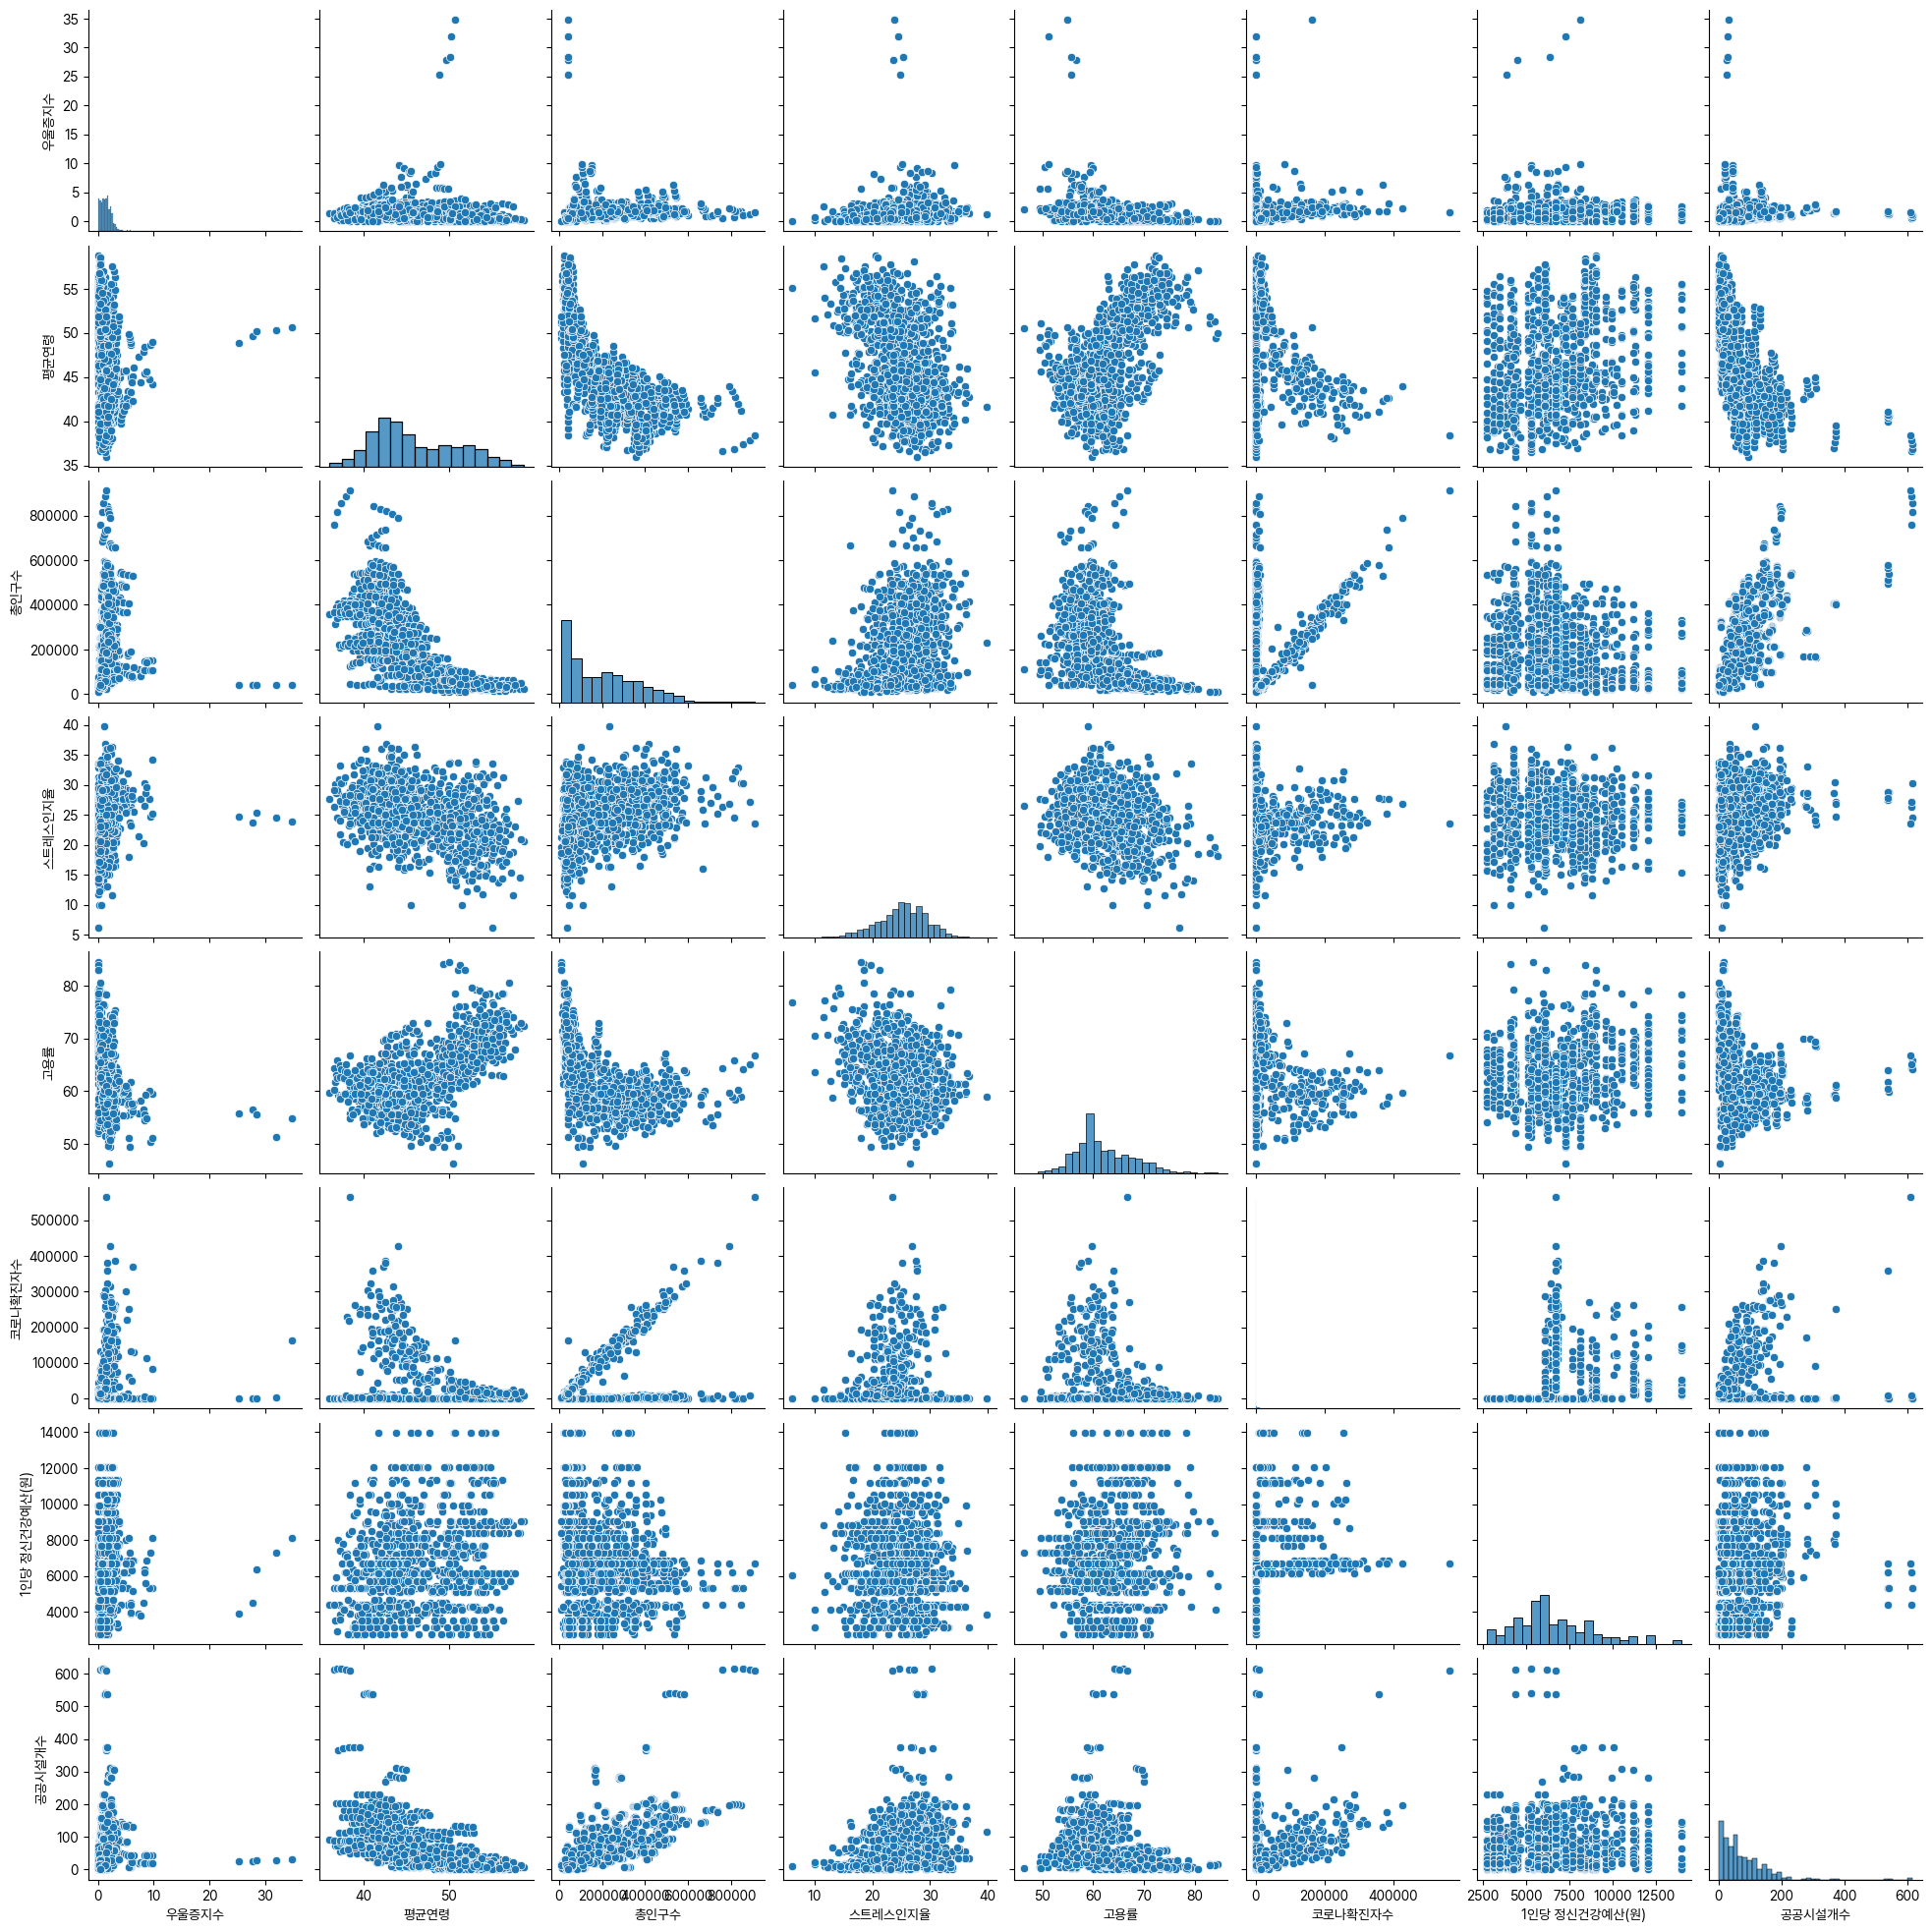

In [29]:
import seaborn as sns

sns.pairplot(final[['우울증지수', '평균연령', '총인구수', '스트레스인지율', '고용률', '코로나확진자수',
                   '1인당 정신건강예산(원)', '공공시설개수']])
# 우울증지수와 다른 변수들은 모두 상관관계가 없다고 볼 수 있으며
# 총 인구수와 코로나확진자수만이 서로 상관관계를 띄고 있음

In [35]:
final1 = final.iloc[:,4:]
final1.corr()

# 우울증 지수와
# 매우 약한 상관관계 : 평균연령, 총인구수, 스트레스인지율, 코로나확진자수, 정신건강예산, 공공시설개수
# 약한 상관관계 : 고용률
# 중간 정도의 상관관계 : 우울증환자수

우울증환자수      평균연령      총인구수   스트레스인지율       고용률   코로나확진자수  \
우울증환자수         1.000000 -0.529223  0.763873  0.310235 -0.465496  0.367391   
평균연령          -0.529223  1.000000 -0.723292 -0.416707  0.617515 -0.151659   
총인구수           0.763873 -0.723292  1.000000  0.366776 -0.508388  0.309206   
스트레스인지율        0.310235 -0.416707  0.366776  1.000000 -0.285594 -0.056337   
고용률           -0.465496  0.617515 -0.508388 -0.285594  1.000000 -0.124379   
코로나확진자수        0.367391 -0.151659  0.309206 -0.056337 -0.124379  1.000000   
1인당 정신건강예산(원) -0.120519  0.281040 -0.229774 -0.090431  0.263605  0.206280   
공공시설개수         0.434231 -0.573853  0.672829  0.262897 -0.245662  0.220423   
우울증지수          0.483707 -0.103106  0.097072  0.114299 -0.294838  0.124576   

               1인당 정신건강예산(원)    공공시설개수     우울증지수  
우울증환자수             -0.120519  0.434231  0.483707  
평균연령                0.281040 -0.573853 -0.103106  
총인구수               -0.229774  0.672829  0.097072  
스트레스인지율            -0.090431  0.262897  0.114299  
고용률                 0.263605 -0.245662 -0.294838  
코로나확진자수             0.206280  0.220423  0.124576  
1인당 정신건강예산(원)       1.000000 -0.011847 -0.004312  
공공시설개수             -0.011847  1.000000  0.039409  
우울증지수              -0.004312  0.039409  1.000000

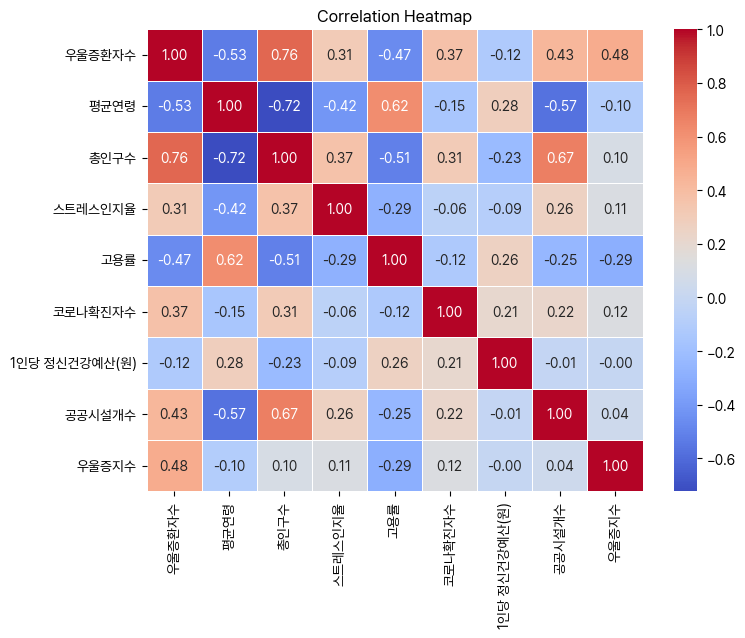

In [50]:
final1 = final.iloc[:,4:]
correlation_matrix = final1.corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [54]:
! pip install statsmodels

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(final1.values, i) for i in range(final1.shape[1])]
vif["features"] = final1.columns
vif

VIF Factor       features
0    8.138537         우울증환자수
1  176.465239           평균연령
2   13.087331           총인구수
3   34.450508        스트레스인지율
4  192.892563            고용률
5    1.507754        코로나확진자수
6   12.098131  1인당 정신건강예산(원)
7    4.408810         공공시설개수
8    2.826692          우울증지수

In [61]:
vif = pd.DataFrame()
final2 = final1.copy()
final2 = final2.drop("고용률",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(final2.values, i) for i in range(final2.shape[1])]
vif["features"] = final2.columns
vif

VIF Factor       features
0    8.138437         우울증환자수
1   31.141307           평균연령
2   13.087166           총인구수
3   32.399217        스트레스인지율
4    1.507602        코로나확진자수
5   12.053195  1인당 정신건강예산(원)
6    4.093104         공공시설개수
7    2.716804          우울증지수

In [62]:
vif = pd.DataFrame()
final2 = final2.drop("스트레스인지율",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(final2.values, i) for i in range(final2.shape[1])]
vif["features"] = final2.columns
vif

VIF Factor       features
0    8.138146         우울증환자수
1   13.348939           평균연령
2   11.586949           총인구수
3    1.425553        코로나확진자수
4   11.927445  1인당 정신건강예산(원)
5    4.076228         공공시설개수
6    2.683728          우울증지수

In [ ]:
import statsmodels.api as sm

In [74]:
data = final.copy()
data

시도     시군구        행정번호    년도  우울증환자수  평균연령    총인구수  스트레스인지율    고용률  \
0       서울특별시   서울종로구  1111000000  2018   14837  44.2  153065     34.2  59.60   
1       서울특별시    서울중구  1114000000  2018    4352  44.6  125725     28.3  59.60   
2       서울특별시   서울용산구  1117000000  2018    2370  43.6  228999     20.0  59.60   
3       서울특별시   서울성동구  1120000000  2018    3657  42.0  308221     31.3  59.60   
4       서울특별시   서울광진구  1121500000  2018    6917  41.4  355559     29.4  59.60   
...       ...     ...         ...   ...     ...   ...     ...      ...    ...   
1245     경상남도   경남함양군  4887000000  2022     283  54.5   37708     27.5  68.85   
1246     경상남도   경남거창군  4888000000  2022     794  50.4   60387     23.2  67.00   
1247     경상남도   경남합천군  4889000000  2022     185  57.8   42142     23.1  67.95   
1248  제주특별자치도   제주제주시  5011000000  2022   11503  42.5  493389     25.0  67.15   
1249  제주특별자치도  제주서귀포시  5013000000  2022    2743  45.8  184770     25.0  72.95   

      코로나확진자수  1인당 정신건강예산(원)  공공시설개수  우울증지수  
0           0           5326      44   9.69  
1           0           5326      42   3.46  
2           0           5326      53   1.03  
3           0           5326      50   1.19  
4           0           5326      47   1.95  
...       ...            ...     ...    ...  
1245    15896           6119       6   0.75  
1246    29267           6119      14   1.31  
1247    15704           6119       1   0.44  
1248   271444           8662     198   2.33  
1249    89872           8662      54   1.48  

[1250 rows x 13 columns]

In [75]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 객체로 생성합니다.
le = LabelEncoder()
# fit_transform()으로 라벨인코딩을 수행합니다.
data['시도'] = le.fit_transform(data['시도'])

In [117]:
data['시도']=='부산광역시'

KeyError: '시도'

In [77]:
data

시도     시군구        행정번호    년도  우울증환자수  평균연령    총인구수  스트레스인지율    고용률  \
0      8   서울종로구  1111000000  2018   14837  44.2  153065     34.2  59.60   
1      8    서울중구  1114000000  2018    4352  44.6  125725     28.3  59.60   
2      8   서울용산구  1117000000  2018    2370  43.6  228999     20.0  59.60   
3      8   서울성동구  1120000000  2018    3657  42.0  308221     31.3  59.60   
4      8   서울광진구  1121500000  2018    6917  41.4  355559     29.4  59.60   
...   ..     ...         ...   ...     ...   ...     ...      ...    ...   
1245   2   경남함양군  4887000000  2022     283  54.5   37708     27.5  68.85   
1246   2   경남거창군  4888000000  2022     794  50.4   60387     23.2  67.00   
1247   2   경남합천군  4889000000  2022     185  57.8   42142     23.1  67.95   
1248  14   제주제주시  5011000000  2022   11503  42.5  493389     25.0  67.15   
1249  14  제주서귀포시  5013000000  2022    2743  45.8  184770     25.0  72.95   

      코로나확진자수  1인당 정신건강예산(원)  공공시설개수  우울증지수  
0           0           5326      44   9.69  
1           0           5326      42   3.46  
2           0           5326      53   1.03  
3           0           5326      50   1.19  
4           0           5326      47   1.95  
...       ...            ...     ...    ...  
1245    15896           6119       6   0.75  
1246    29267           6119      14   1.31  
1247    15704           6119       1   0.44  
1248   271444           8662     198   2.33  
1249    89872           8662      54   1.48  

[1250 rows x 13 columns]

In [78]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 객체로 생성합니다.
le = LabelEncoder()
# fit_transform()으로 라벨인코딩을 수행합니다.
data['년도'] = le.fit_transform(data['년도'])

In [79]:
data = data.drop('행정번호', axis=1)
data

시도     시군구  년도  우울증환자수  평균연령    총인구수  스트레스인지율    고용률  코로나확진자수  \
0      8   서울종로구   0   14837  44.2  153065     34.2  59.60        0   
1      8    서울중구   0    4352  44.6  125725     28.3  59.60        0   
2      8   서울용산구   0    2370  43.6  228999     20.0  59.60        0   
3      8   서울성동구   0    3657  42.0  308221     31.3  59.60        0   
4      8   서울광진구   0    6917  41.4  355559     29.4  59.60        0   
...   ..     ...  ..     ...   ...     ...      ...    ...      ...   
1245   2   경남함양군   4     283  54.5   37708     27.5  68.85    15896   
1246   2   경남거창군   4     794  50.4   60387     23.2  67.00    29267   
1247   2   경남합천군   4     185  57.8   42142     23.1  67.95    15704   
1248  14   제주제주시   4   11503  42.5  493389     25.0  67.15   271444   
1249  14  제주서귀포시   4    2743  45.8  184770     25.0  72.95    89872   

      1인당 정신건강예산(원)  공공시설개수  우울증지수  
0              5326      44   9.69  
1              5326      42   3.46  
2              5326      53   1.03  
3              5326      50   1.19  
4              5326      47   1.95  
...             ...     ...    ...  
1245           6119       6   0.75  
1246           6119      14   1.31  
1247           6119       1   0.44  
1248           8662     198   2.33  
1249           8662      54   1.48  

[1250 rows x 12 columns]

In [87]:
from sklearn.preprocessing import MinMaxScaler

# min-max 정규화 객체 생성
scaler = MinMaxScaler()

dfcolumn = ['우울증환자수', '평균연령', '총인구수', '스트레스인지율', '고용률', '코로나확진자수', '1인당 정신건강예산(원)', 
           '공공시설개수', '우울증지수']

# min-max 정규화 적용
scaler.fit(data[dfcolumn])
df_scaled = scaler.transform(data[dfcolumn])

# 적용된 결과를 새로운 데이터프레임에 저장
scaled_df = pd.DataFrame(df_scaled, columns=dfcolumn)
scaled_df = pd.concat([data['시도'], data['년도'], scaled_df], axis=1)
scaled_df

시도  년도    우울증환자수      평균연령      총인구수   스트레스인지율       고용률   코로나확진자수  \
0      8   0  0.450329  0.359649  0.159874  0.833333  0.346405  0.000000   
1      8   0  0.132091  0.377193  0.129562  0.657738  0.346405  0.000000   
2      8   0  0.071934  0.333333  0.244063  0.410714  0.346405  0.000000   
3      8   0  0.110996  0.263158  0.331898  0.747024  0.346405  0.000000   
4      8   0  0.209943  0.236842  0.384382  0.690476  0.346405  0.000000   
...   ..  ..       ...       ...       ...       ...       ...       ...   
1245   2   4  0.008590  0.811404  0.031976  0.633929  0.588235  0.028178   
1246   2   4  0.024099  0.631579  0.057121  0.505952  0.539869  0.051880   
1247   2   4  0.005615  0.956140  0.036892  0.502976  0.564706  0.027837   
1248  14   4  0.349136  0.285088  0.537196  0.559524  0.543791  0.481171   
1249  14   4  0.083255  0.429825  0.195026  0.559524  0.695425  0.159310   

      1인당 정신건강예산(원)    공공시설개수     우울증지수  
0          0.228938  0.071313  0.278448  
1          0.228938  0.068071  0.099425  
2          0.228938  0.085900  0.029598  
3          0.228938  0.081037  0.034195  
4          0.228938  0.076175  0.056034  
...             ...       ...       ...  
1245       0.299634  0.009724  0.021552  
1246       0.299634  0.022690  0.037644  
1247       0.299634  0.001621  0.012644  
1248       0.526344  0.320908  0.066954  
1249       0.526344  0.087520  0.042529  

[1250 rows x 11 columns]

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd

# 예제 데이터 생성
data1 = scaled_df.copy()

df = pd.DataFrame(data1)

# 다항회귀 모델 만들기
model = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), LinearRegression())

# 독립 변수 선택 (년도, 지역, 다른 변수들)
X = df[['시도', '년도', '우울증환자수', '평균연령', '총인구수', '스트레스인지율', '고용률', 
        '코로나확진자수', '1인당 정신건강예산(원)', '공공시설개수']]

# 추가로 상호작용 항을 만들어줍니다.
#X['Year*Region'] = df['행정번호'] * df['년도'].astype('category').cat.codes

# 종속 변수 선택
y = df['우울증지수']

# 모델 훈련
model.fit(X, y)

# 회귀 계수 확인
coefficients = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_

# 결과 출력
print('Intercept:', intercept)
print('Coefficients:', coefficients)

Intercept: 0.07526856392767028
Coefficients: [ 0.00048746  0.00051893  0.48744162  0.02003429 -0.28536314  0.01436785
 -0.11536885 -0.01240164 -0.01209952  0.08232213]


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd

# 예제 데이터 생성
data1 = scaled_df.copy()

df = pd.DataFrame(data1)

# 다항회귀 모델 만들기
model = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), LinearRegression())

# 독립 변수 선택 (년도, 지역, 다른 변수들)
X = df[['시도', '년도', '우울증환자수', '평균연령', '스트레스인지율', '고용률', '코로나확진자수']]

# 추가로 상호작용 항을 만들어줍니다.
#X['Year*Region'] = df['행정번호'] * df['년도'].astype('category').cat.codes

# 종속 변수 선택
y = df['우울증지수']

# 모델 훈련
model.fit(X, y)

# 회귀 계수 확인
coefficients = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_

# 결과 출력
print('Intercept:', intercept)
print('Coefficients:', coefficients)

Intercept: 0.013393666931571103
Coefficients: [ 9.06107231e-04 -2.44840794e-04  2.87850134e-01  9.87851477e-02
  6.83835490e-05 -1.12991131e-01 -3.31660123e-02]


In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd

# 예제 데이터 생성
data1 = scaled_df.copy()

df = pd.DataFrame(data1)

# 다항회귀 모델 만들기
model = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), LinearRegression())

# 독립 변수 선택 (년도, 지역, 다른 변수들)
X = df[['고용률', '평균연령']]

# 추가로 상호작용 항을 만들어줍니다.
#X['Year*Region'] = df['행정번호'] * df['년도'].astype('category').cat.codes

# 종속 변수 선택
y = df['우울증지수']

# 모델 훈련
model.fit(X, y)

# 회귀 계수 확인
coefficients = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_

# 결과 출력
print('Intercept:', intercept)
print('Coefficients:', coefficients)

Intercept: 0.09699825292448902
Coefficients: [-0.15941795  0.03688109]


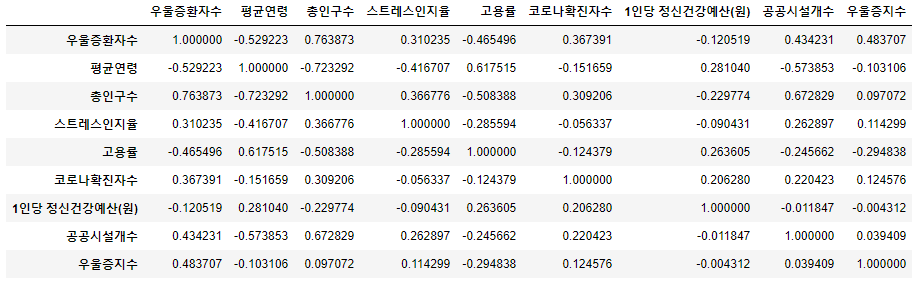

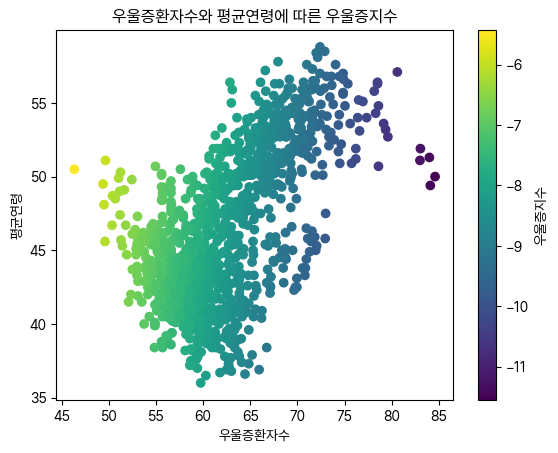

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 예시 데이터 생성
np.random.seed(42)
X1 = final['고용률']
X2 = final['평균연령']
y = 0.09699825292448902 - 0.15941795 * X1 + 0.03688109 * X2

plt.scatter(X1, X2, c=y, cmap='viridis')
plt.colorbar(label='우울증지수')
plt.xlabel('고용률')
plt.ylabel('평균연령')
plt.title('고용률과 평균연령에 따른 우울증지수')

plt.show()

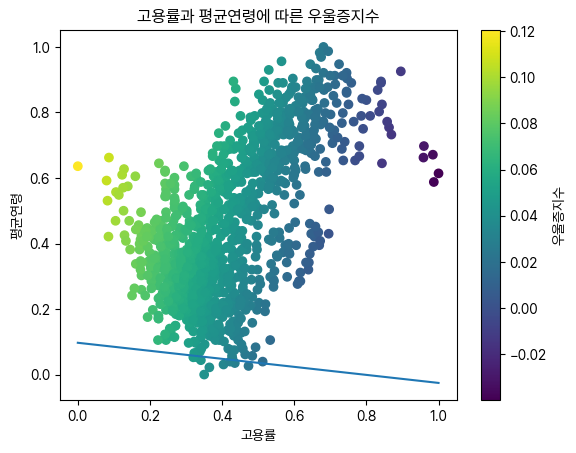

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 예시 데이터 생성
np.random.seed(42)
X1 = data1['고용률']
X2 = data1['평균연령']
y = 0.09699825292448902 - 0.15941795 * X1 + 0.03688109 * X2
point = np.arange(0, 2)

plt.scatter(X1, X2, c=y, cmap='viridis')
plt.plot(point, -0.15941795*point**2 +0.03688109*point +0.09699825292448902)
plt.colorbar(label='우울증지수')
plt.xlabel('고용률')
plt.ylabel('평균연령')
plt.title('고용률과 평균연령에 따른 우울증지수')

plt.show()

In [127]:
f_1111000000

시도    시군구        행정번호    년도  우울증환자수  평균연령    총인구수  스트레스인지율    고용률  \
0     서울특별시  서울종로구  1111000000  2018   14837  44.2  153065     34.2  59.60   
250   서울특별시  서울종로구  1111000000  2019   13895  44.7  151290     27.7  60.00   
500   서울특별시  서울종로구  1111000000  2020   12664  45.3  149384     28.6  59.30   
750   서울특별시  서울종로구  1111000000  2021   12128  45.4  144683     30.3  54.45   
1000  서울특별시  서울종로구  1111000000  2022   12166  45.6  141379     29.6  54.90   

      코로나확진자수  1인당 정신건강예산(원)  공공시설개수  우울증지수  
0           0           5326      44   9.69  
250         0           5309      43   9.18  
500       574           5587      47   8.48  
750      5476           6208      45   8.38  
1000   112225           6845      44   8.61

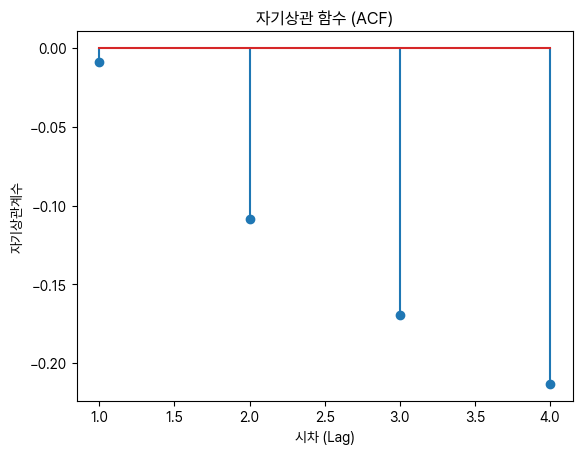

In [121]:
import statsmodels.api as sm
f_1111000000 = final[final['행정번호'] == 1111000000]
#f_1111000000.info()
data = np.array(f_1111000000['코로나확진자수'])


time_series = pd.Series(data, index=pd.to_datetime(f_1111000000['년도'],format='%Y'))

acf_result = sm.tsa.acf(time_series, nlags=len(f_1111000000['년도'])-1)

plt.stem(range(1, len(f_1111000000['년도'])), acf_result[1:])
plt.xlabel('시차 (Lag)')
plt.ylabel('자기상관계수')
plt.title('자기상관 함수 (ACF)')
plt.show()

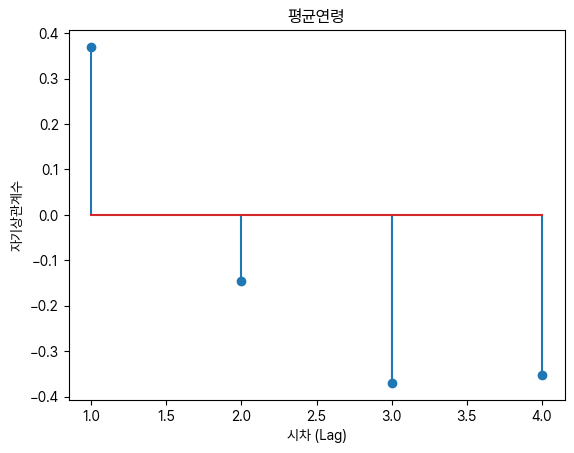

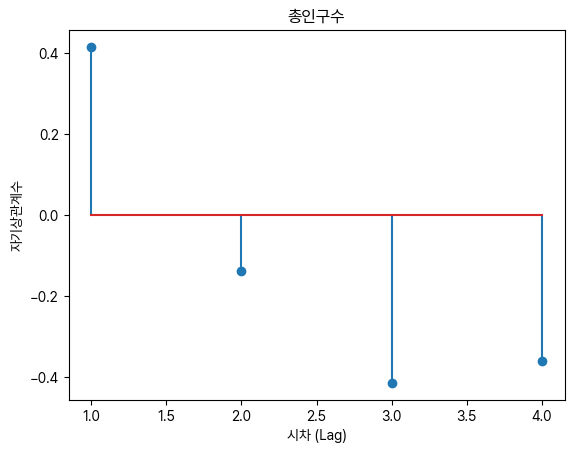

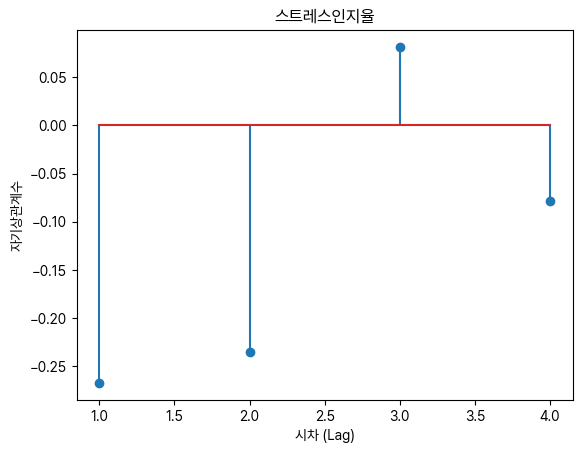

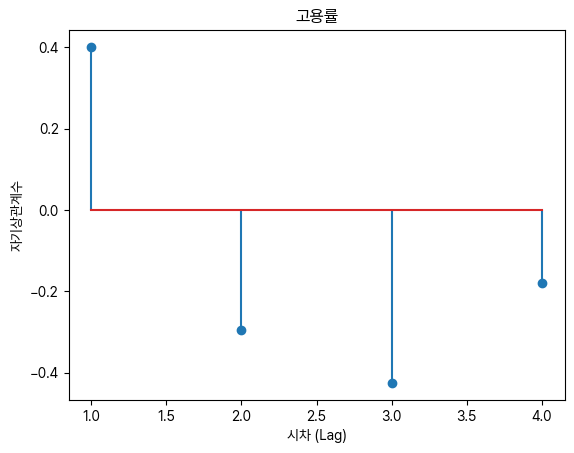

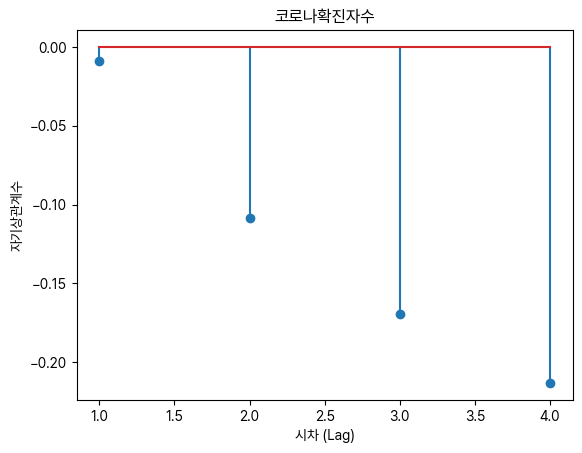

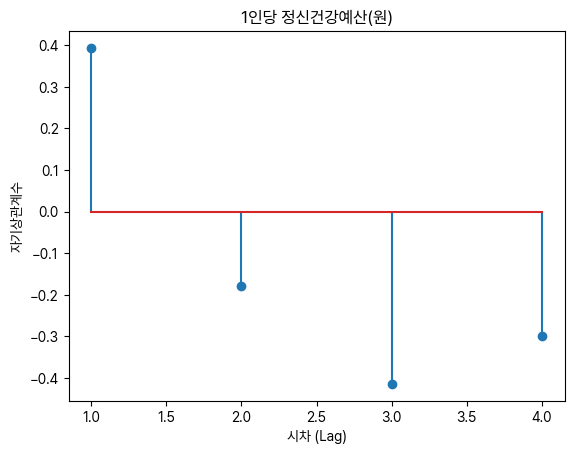

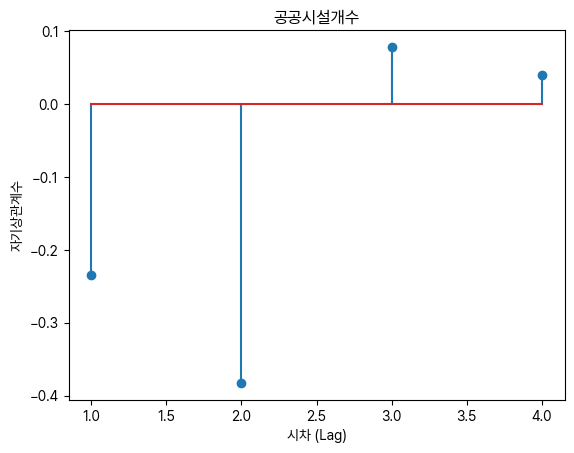

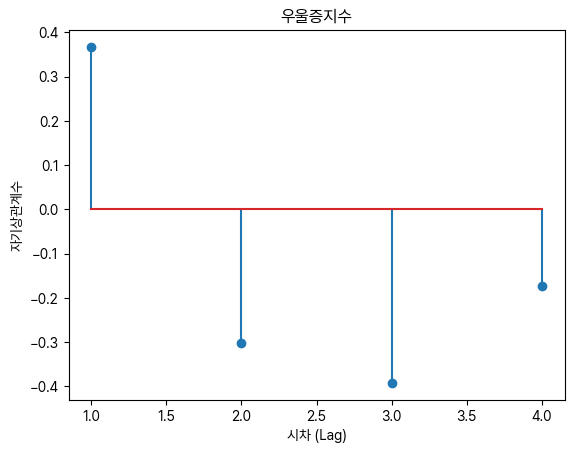

In [141]:
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt

col = ['평균연령', '총인구수', '스트레스인지율', '고용률', '코로나확진자수', '1인당 정신건강예산(원)', '공공시설개수', '우울증지수']
f_1111000000 = final[final['행정번호'] == 1111000000]
#f_1111000000.info()
for i in range(len(col)):
    data = np.array(f_1111000000[col[i]])


    time_series = pd.Series(data, index=pd.to_datetime(f_1111000000['년도'],format='%Y'))

    acf_result = sm.tsa.acf(time_series, nlags=len(f_1111000000['년도'])-1)

    plt.stem(range(1, len(f_1111000000['년도'])), acf_result[1:])
    plt.xlabel('시차 (Lag)')
    plt.ylabel('자기상관계수')
    #plt.title(f"{final['시군구']} - {col[i]}")
    plt.title(col[i])
    plt.show()

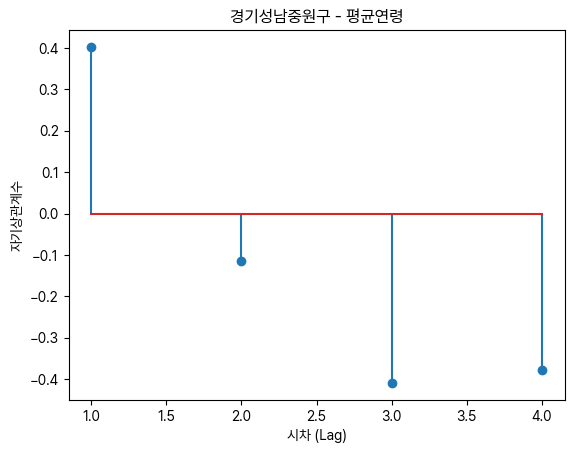

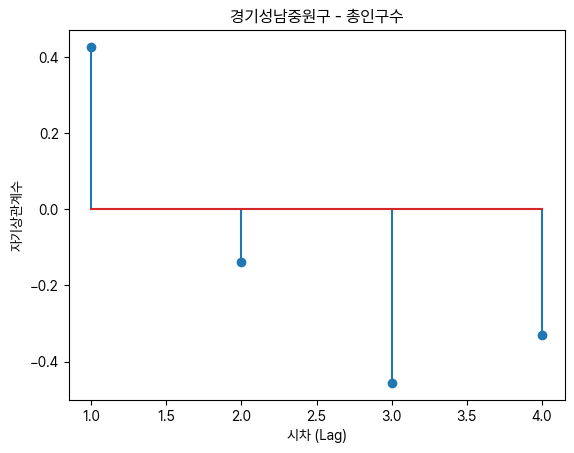

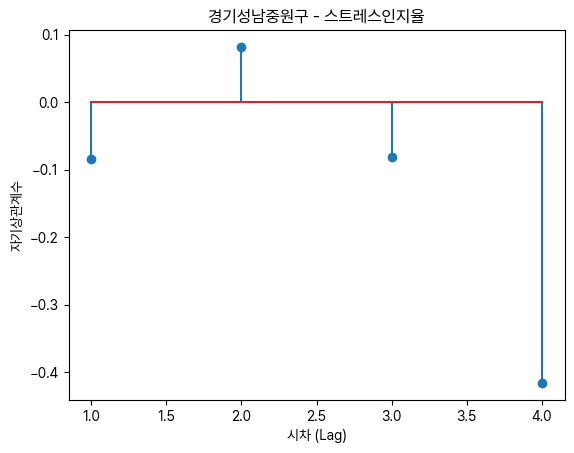

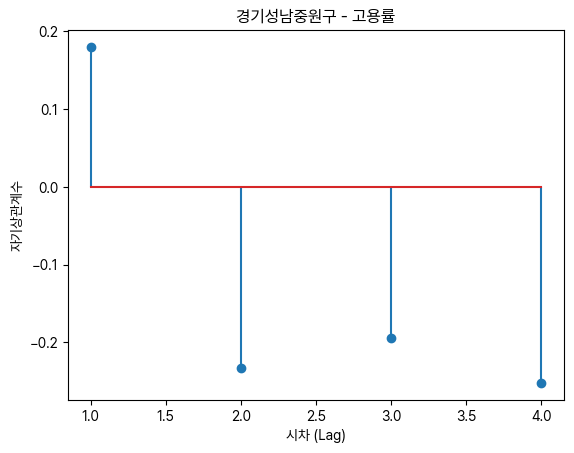

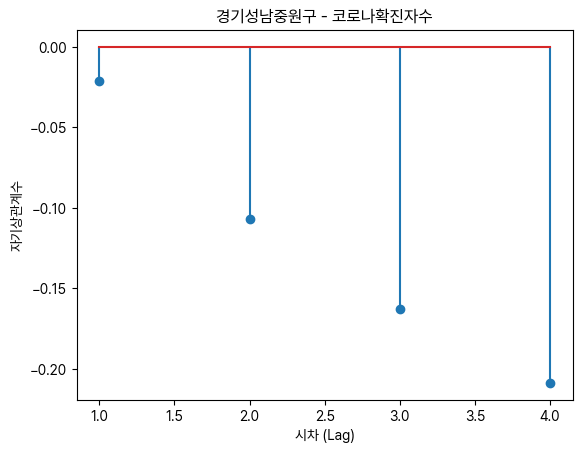

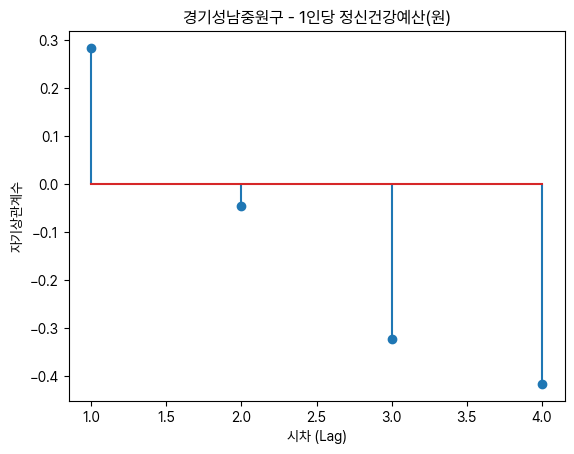

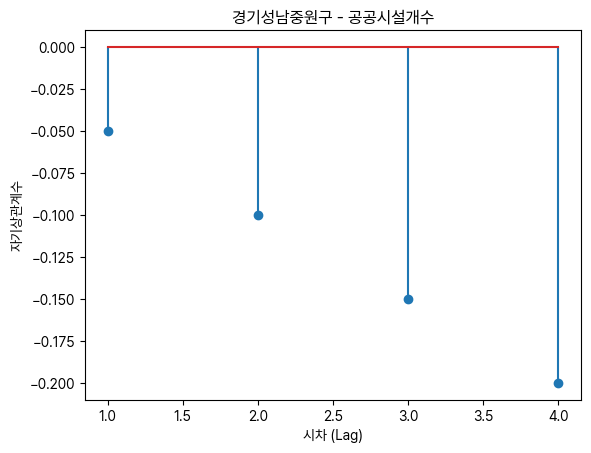

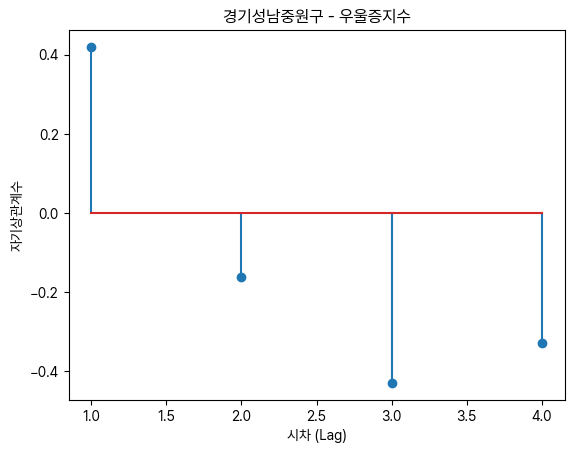

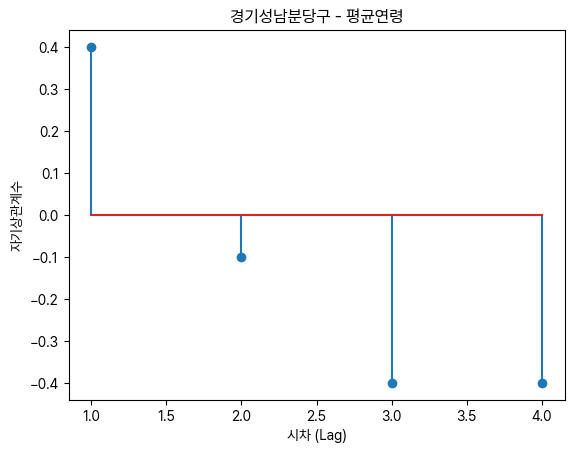

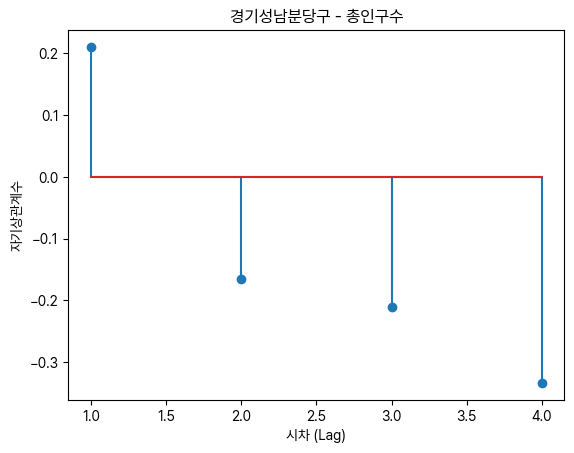

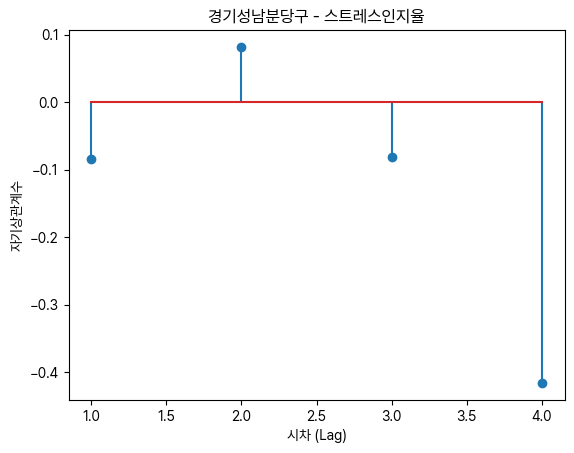

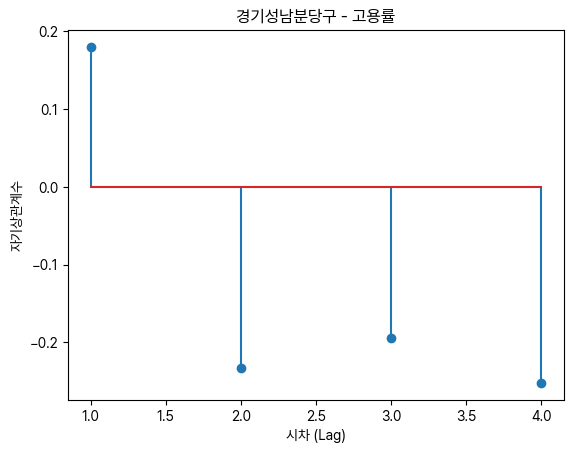

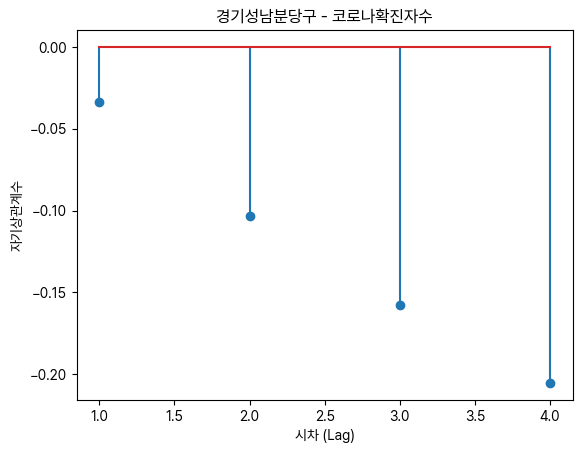

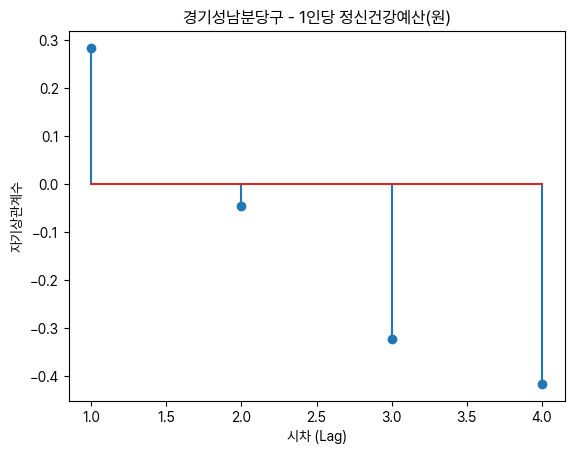

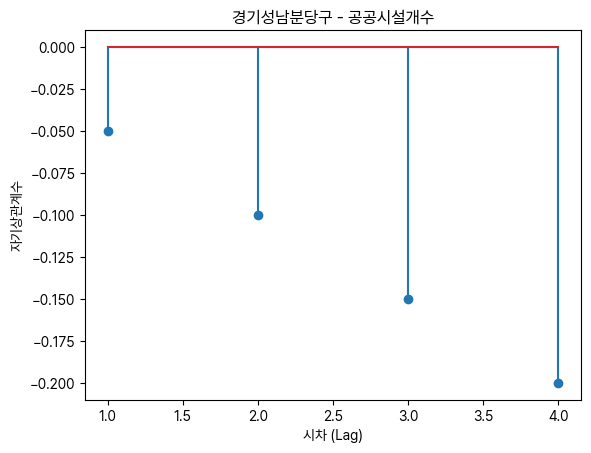

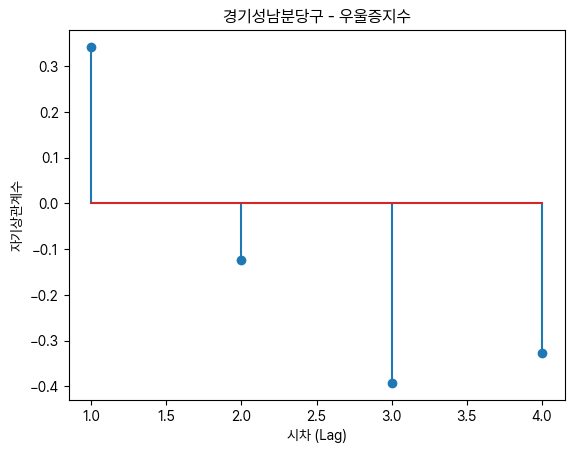

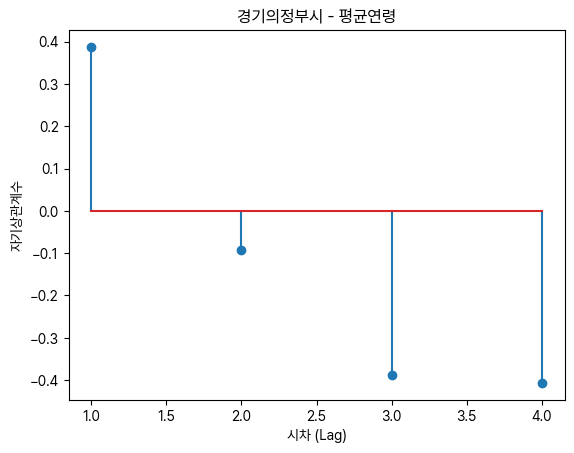

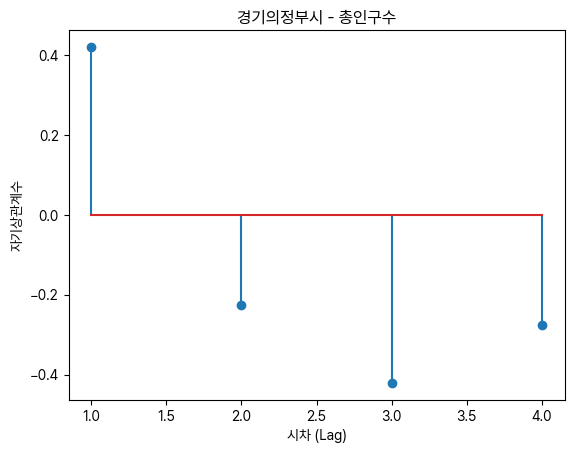

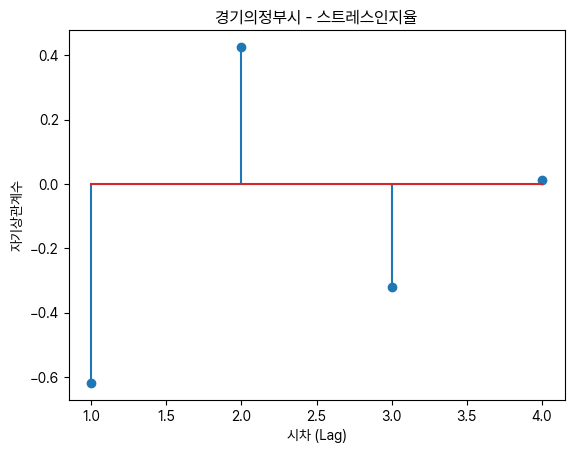

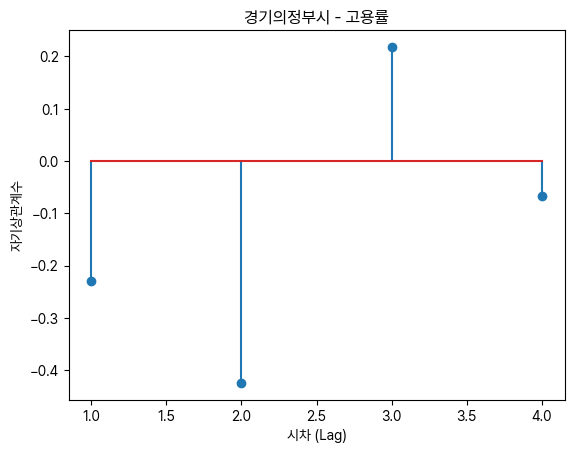

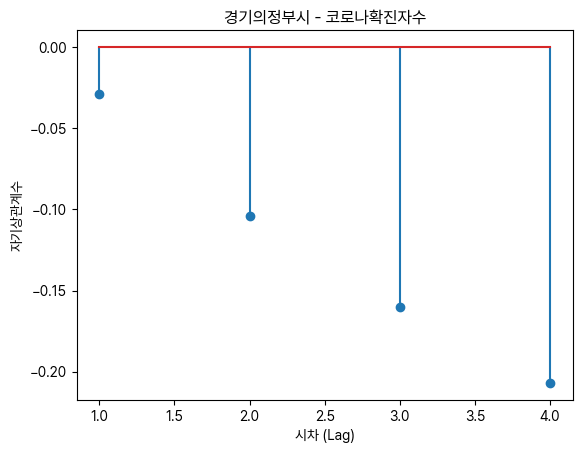

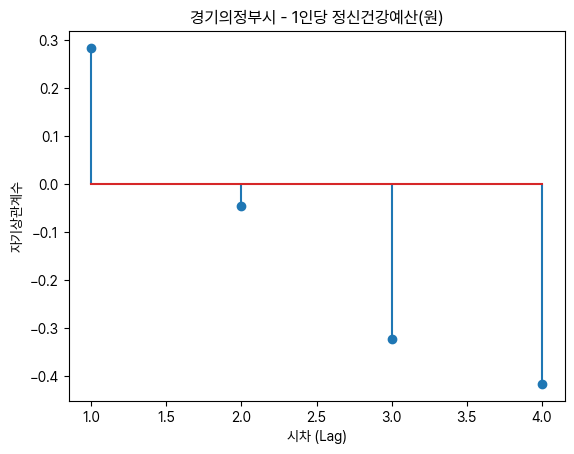

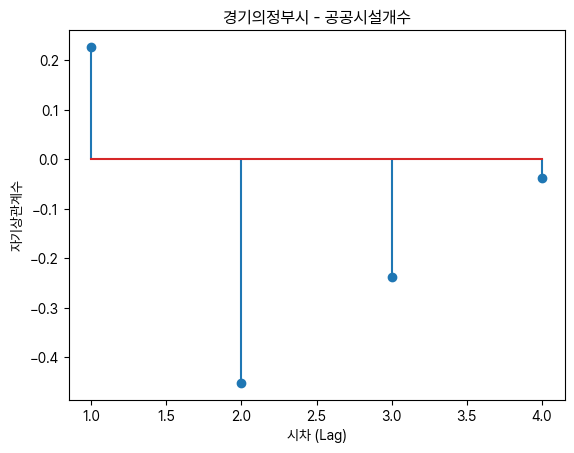

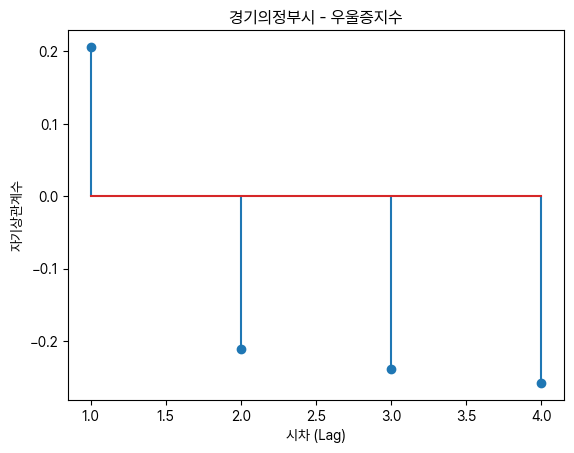

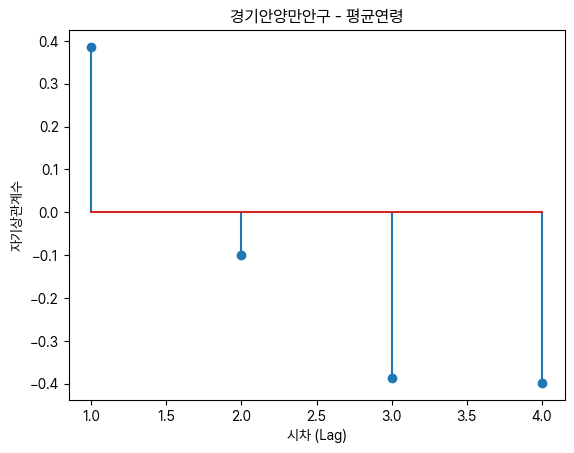

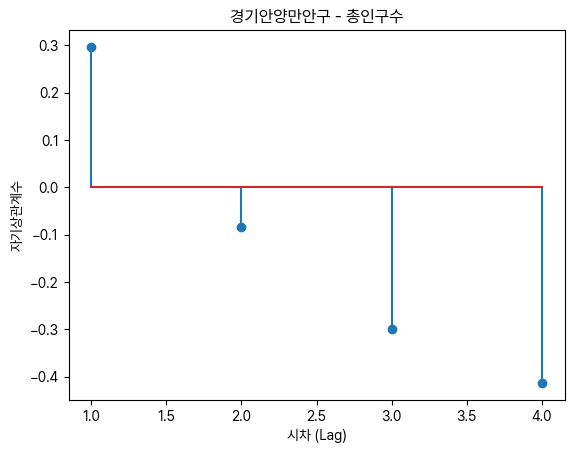

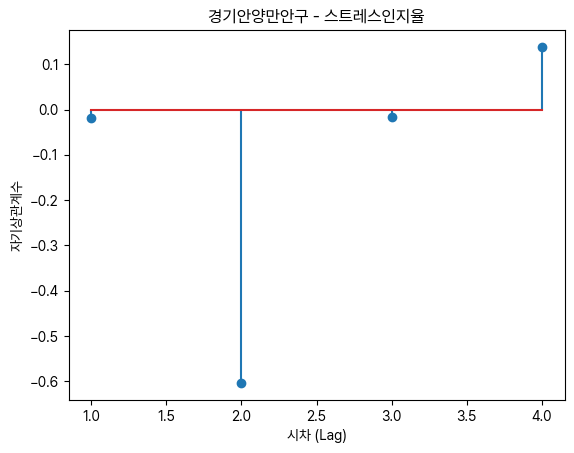

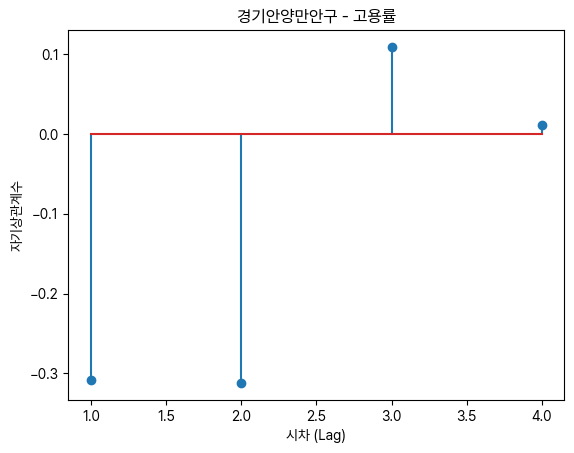

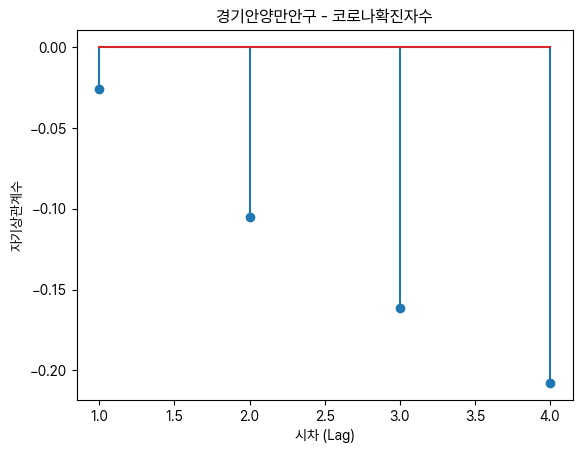

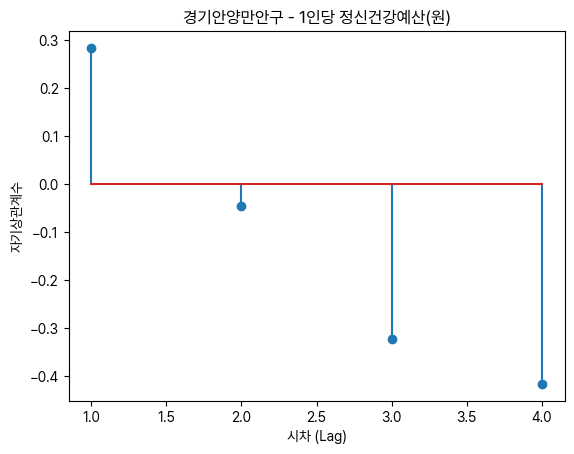

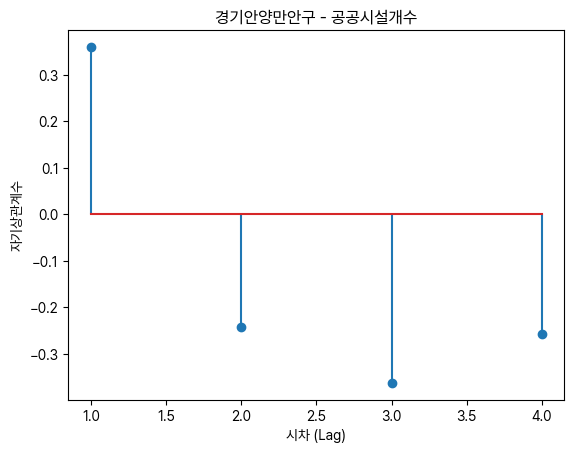

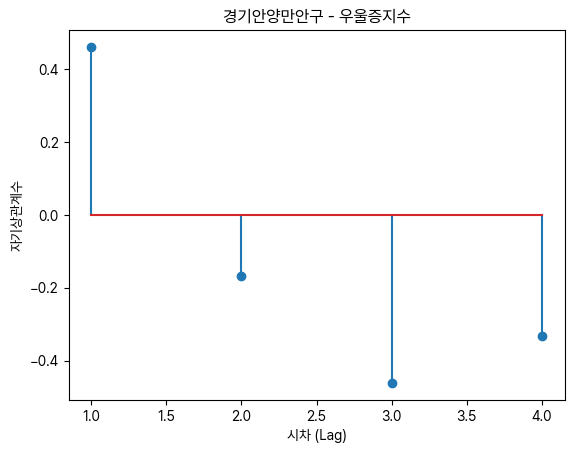

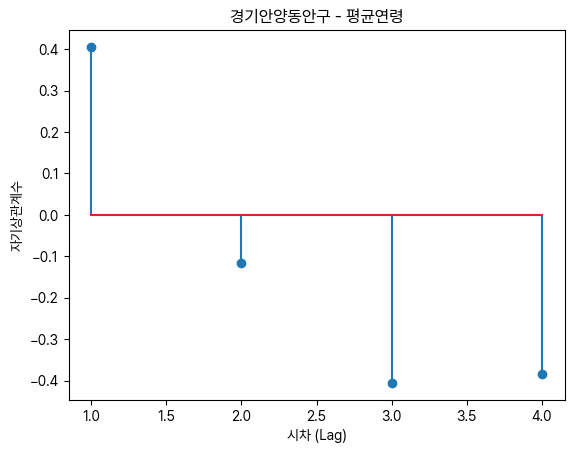

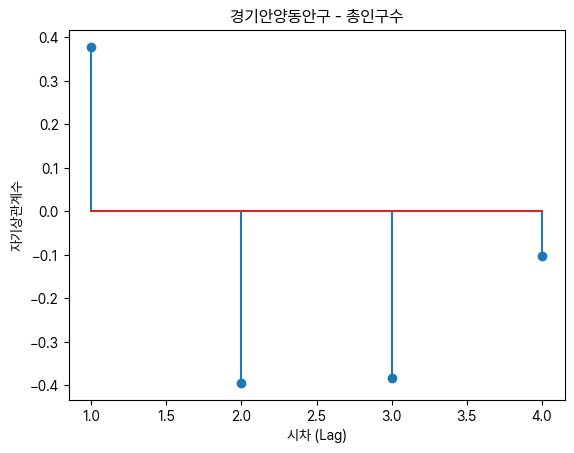

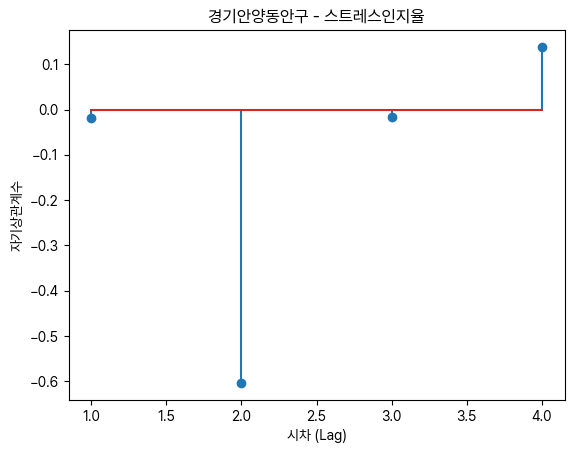

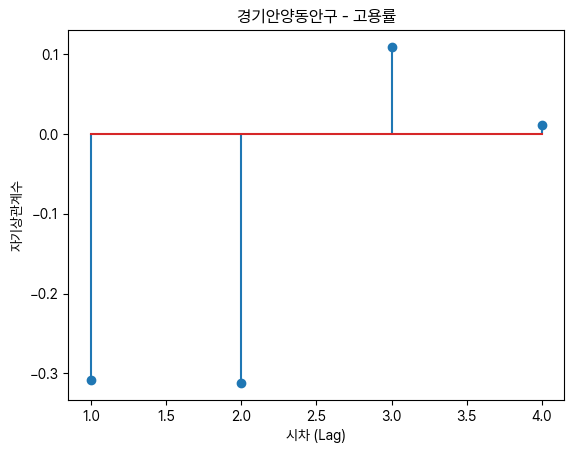

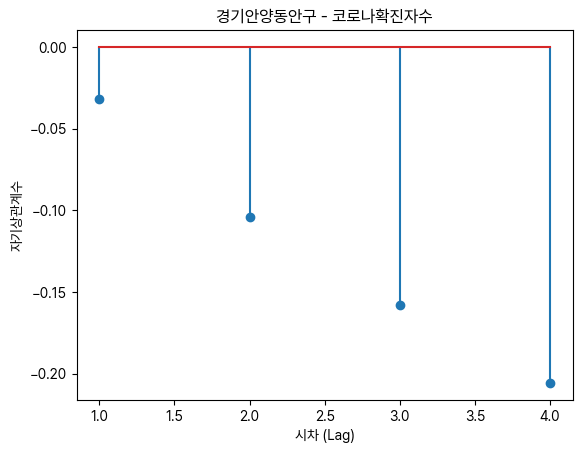

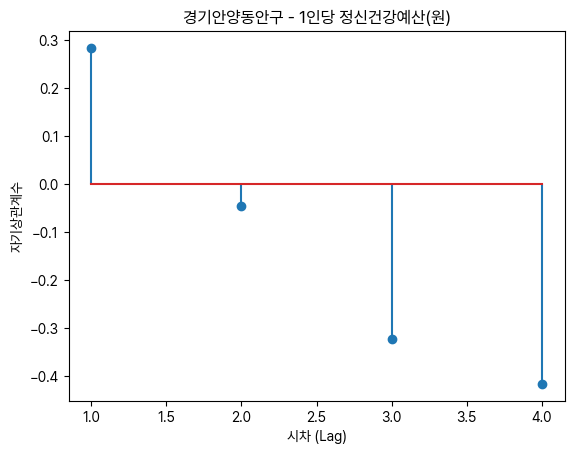

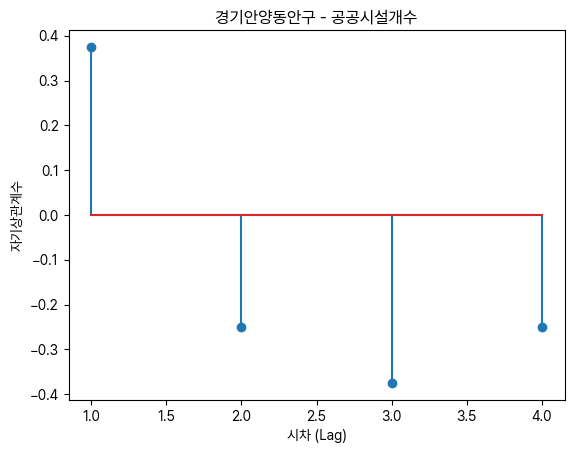

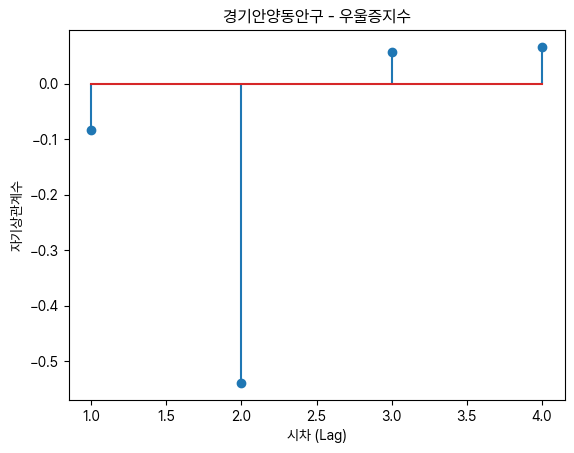

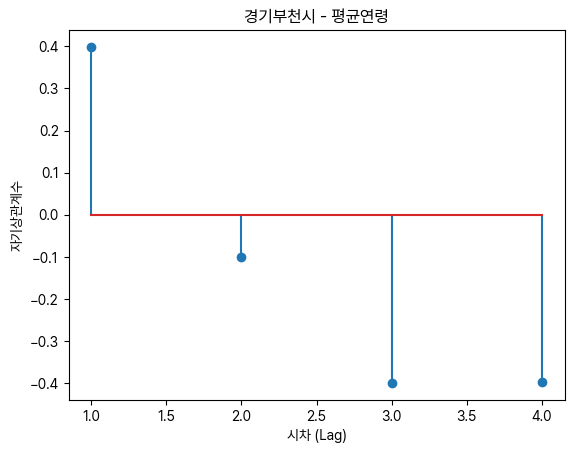

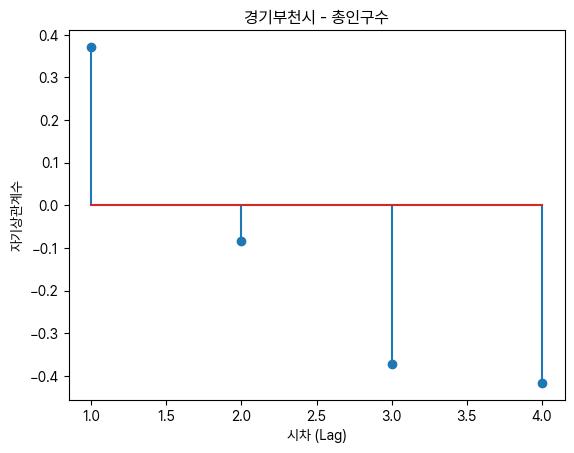

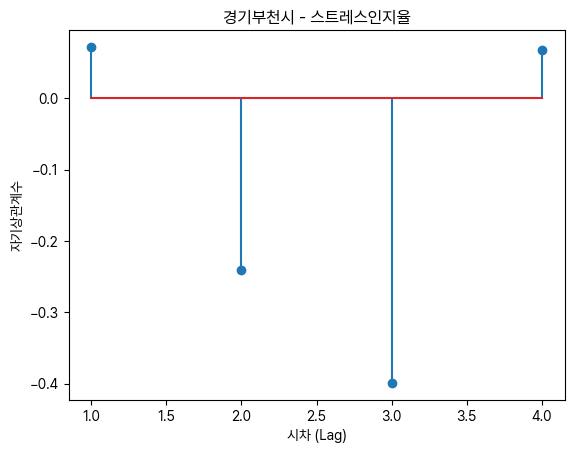

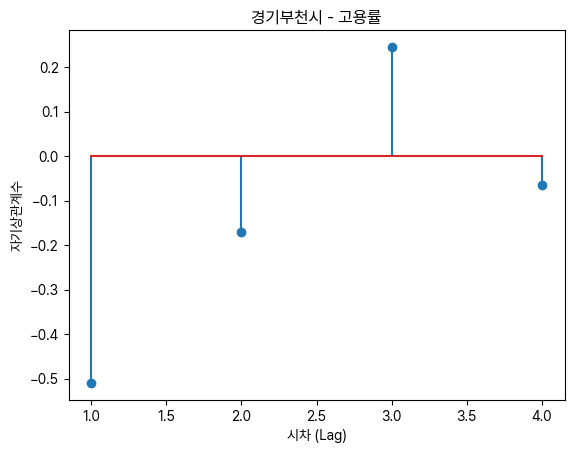

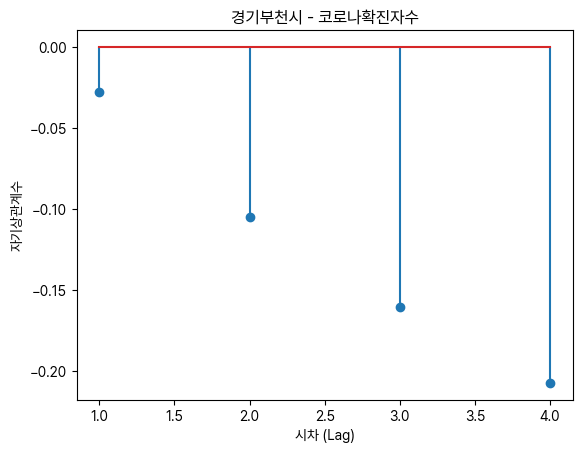

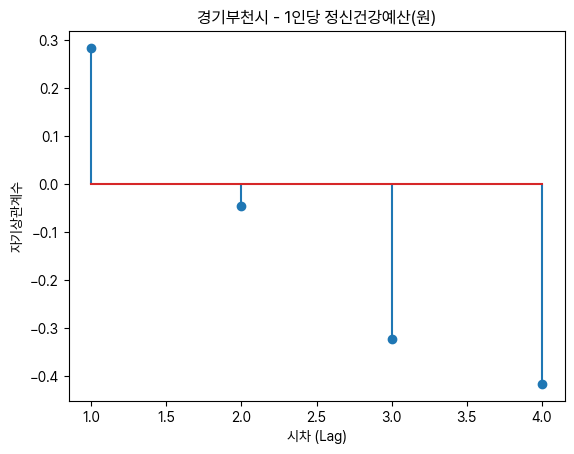

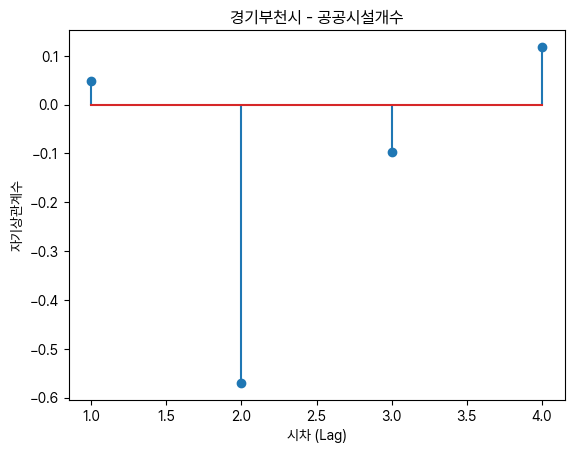

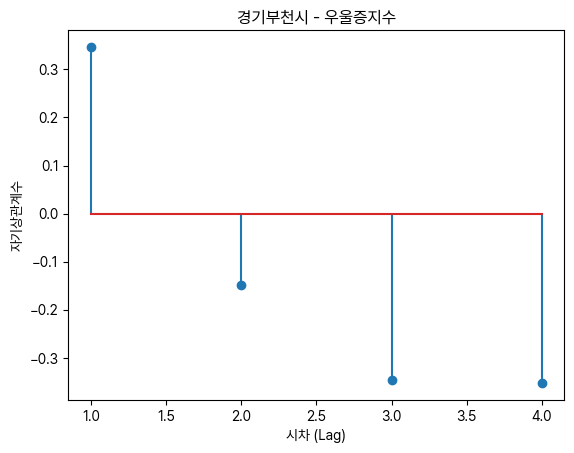

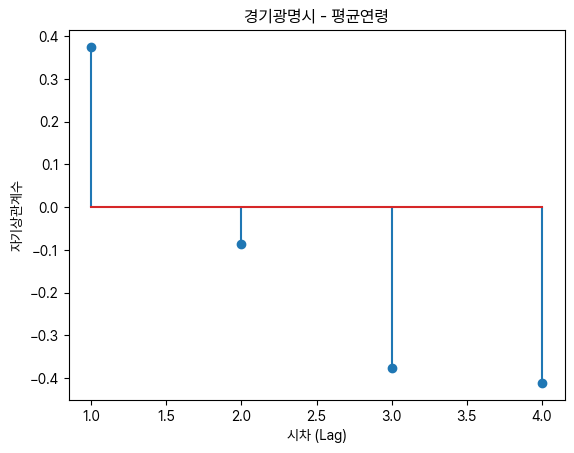

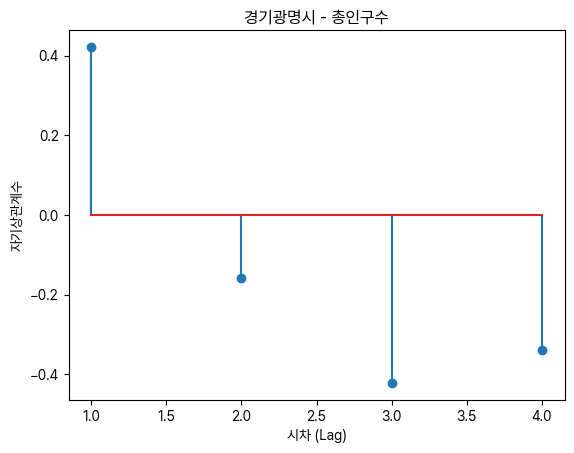

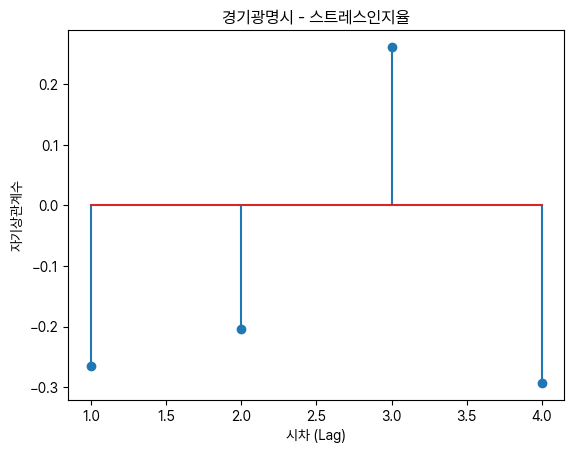

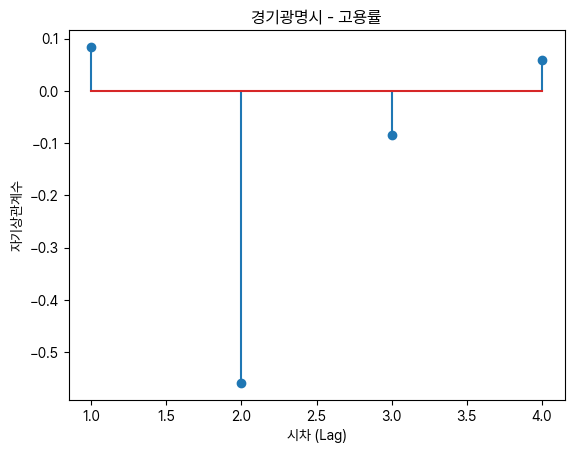

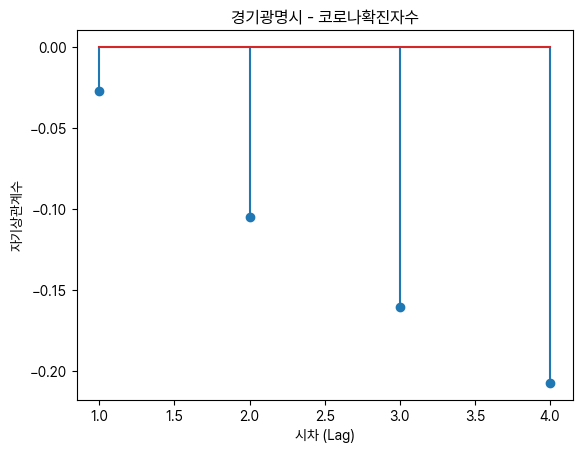

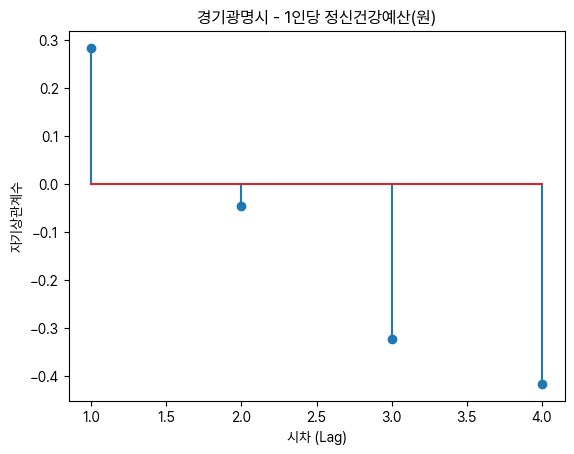

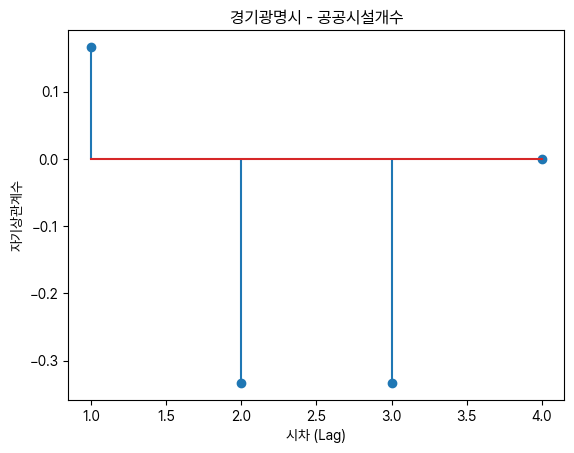

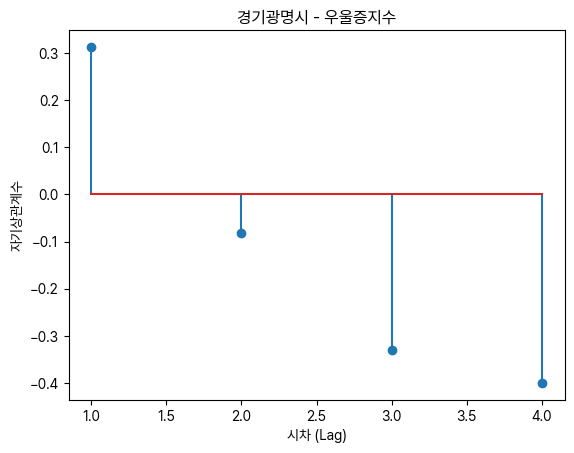

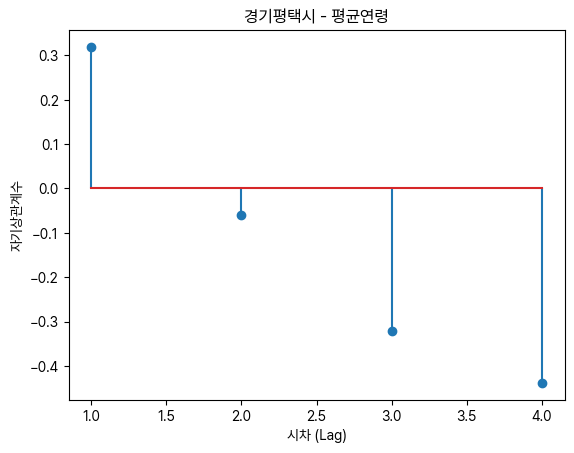

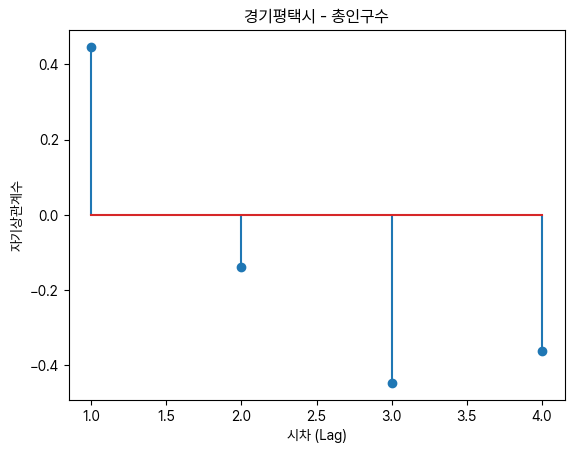

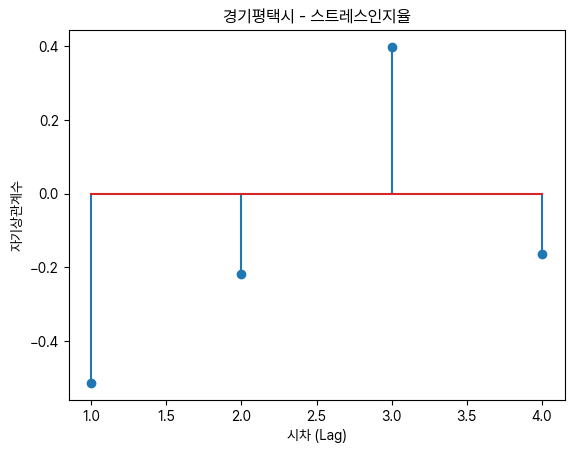

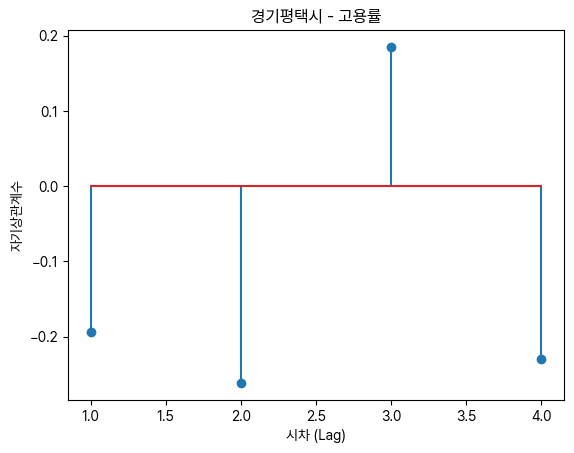

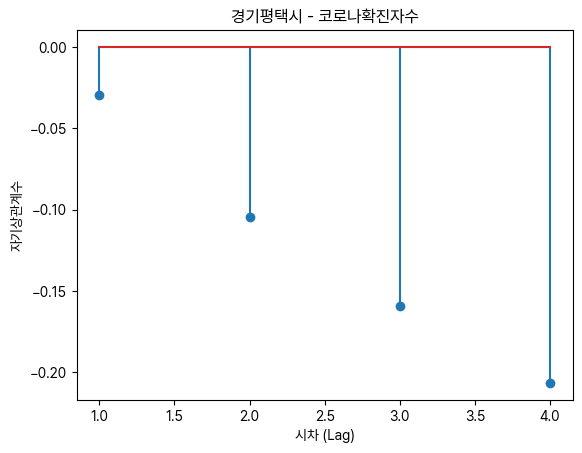

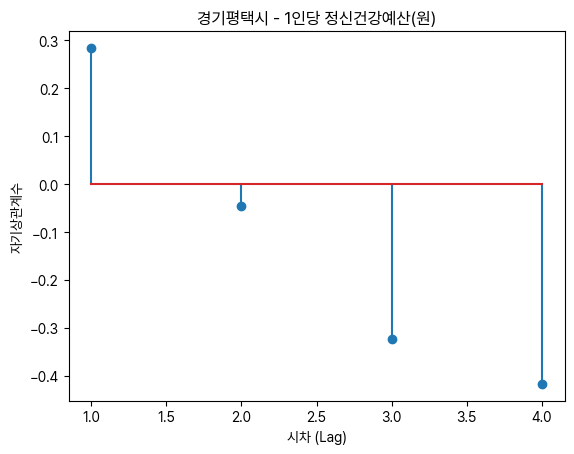

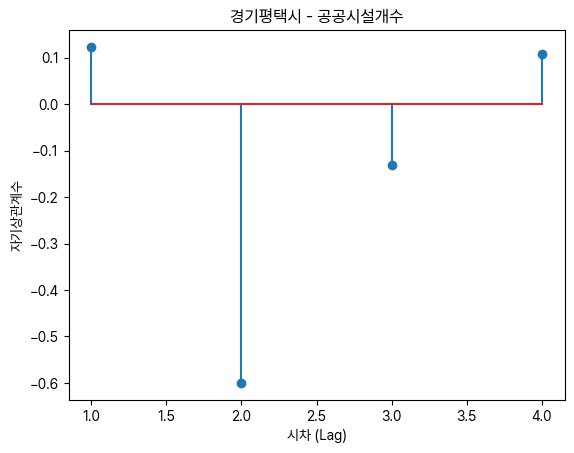

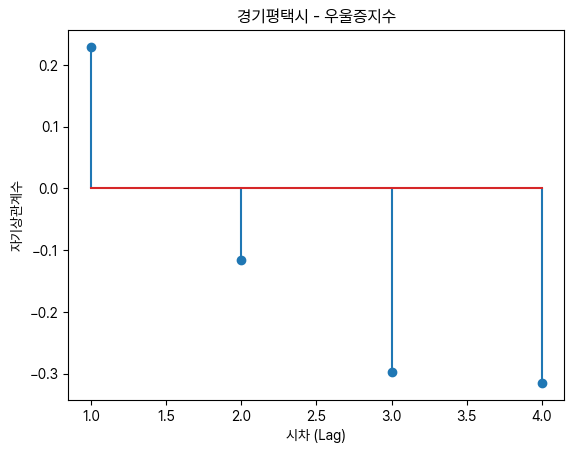

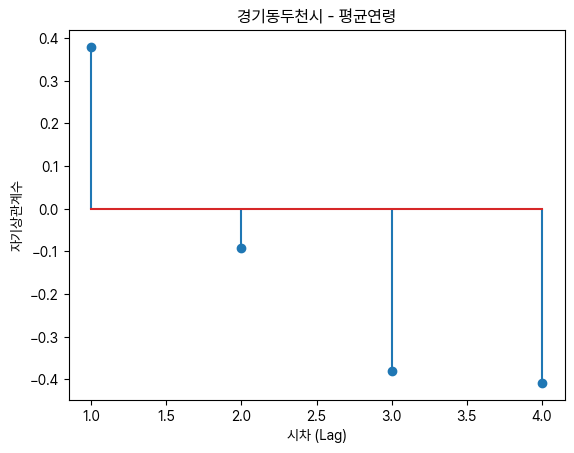

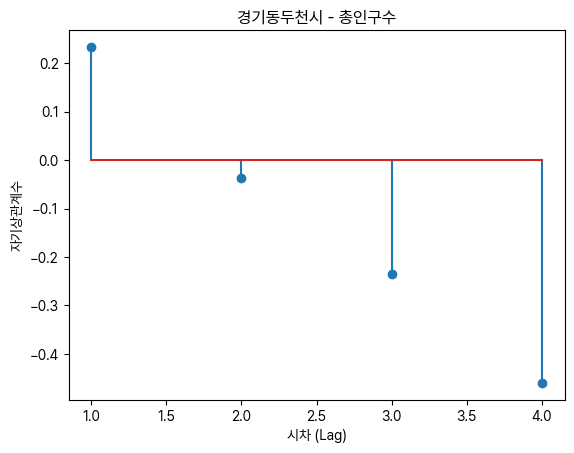

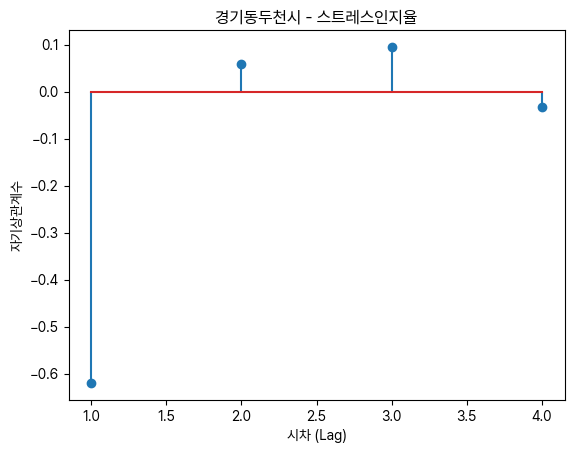

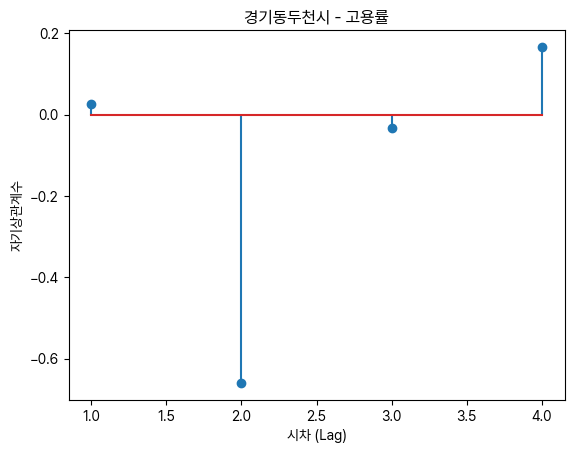

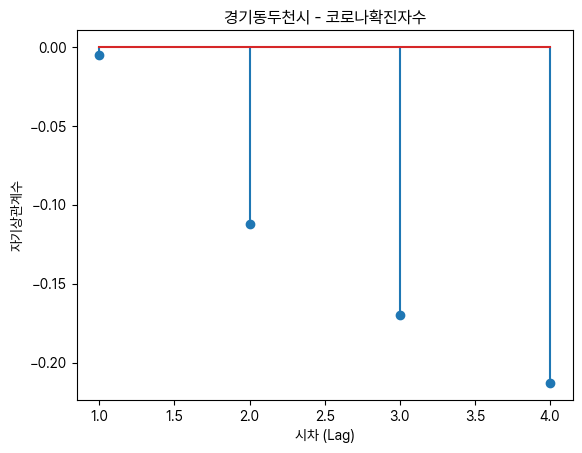

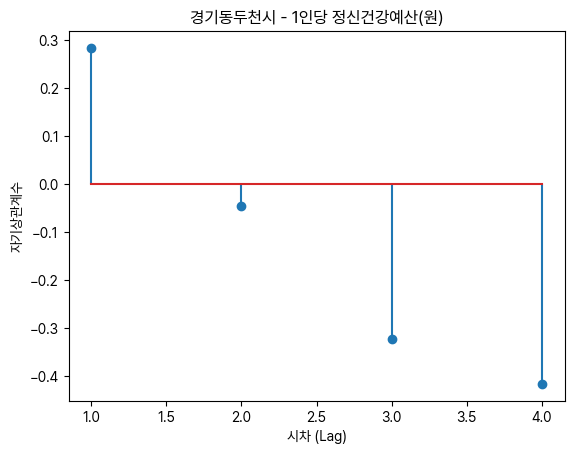

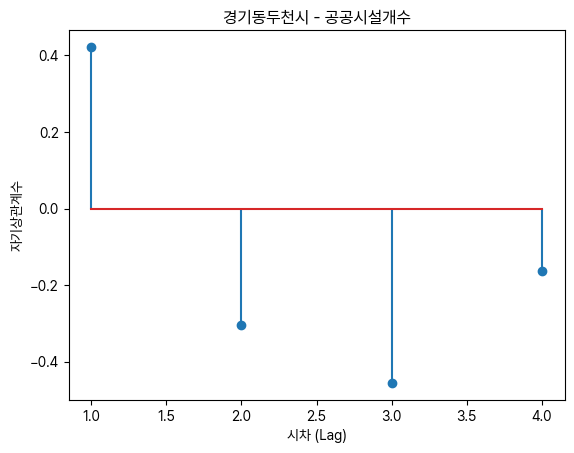

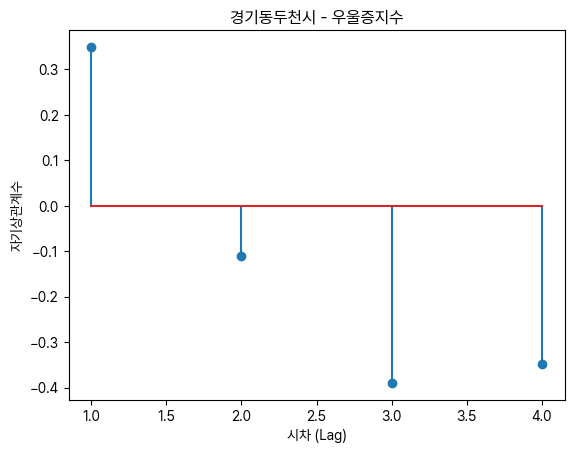

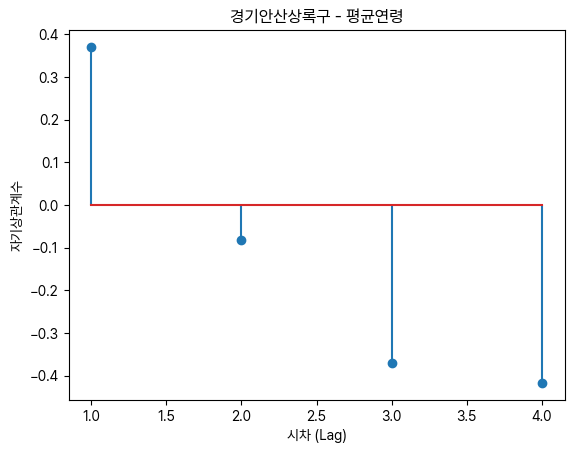

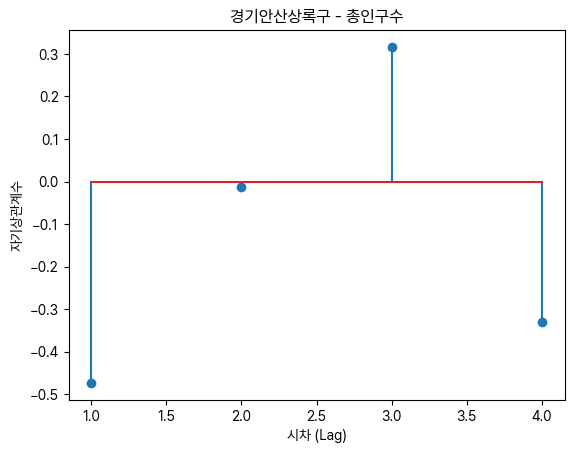

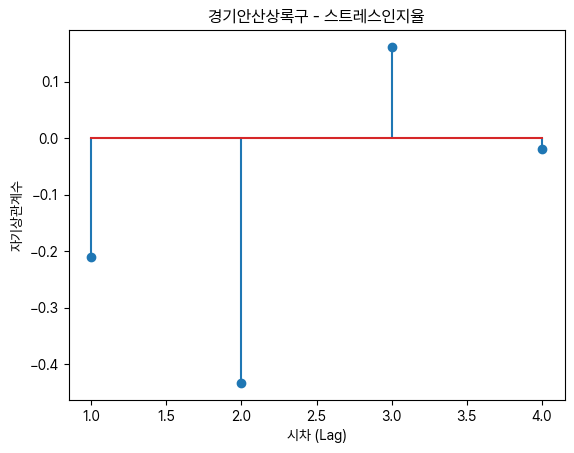

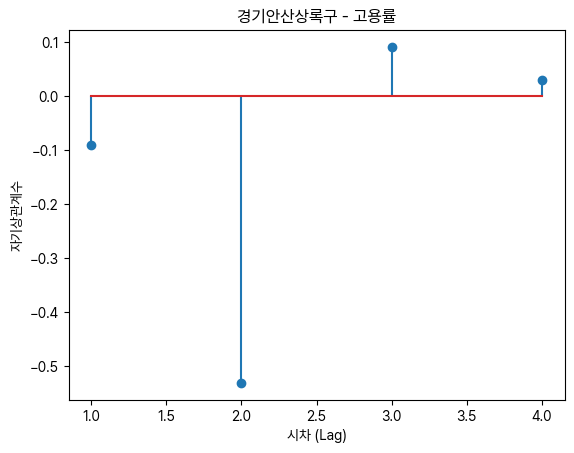

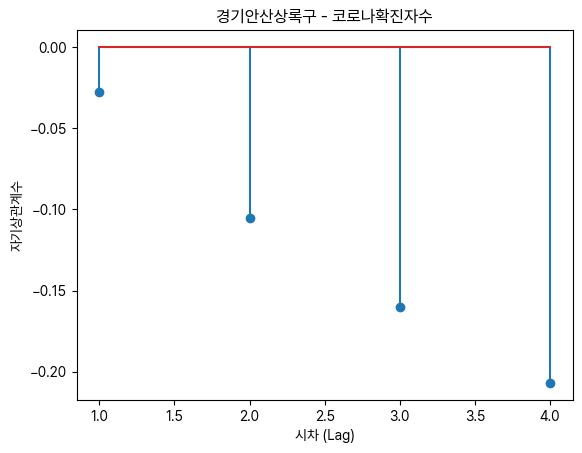

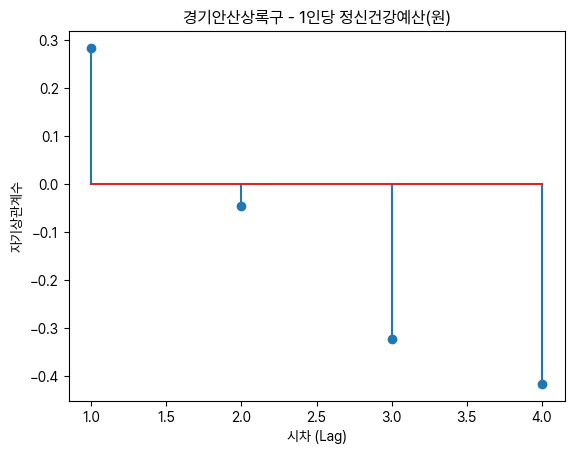

C:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


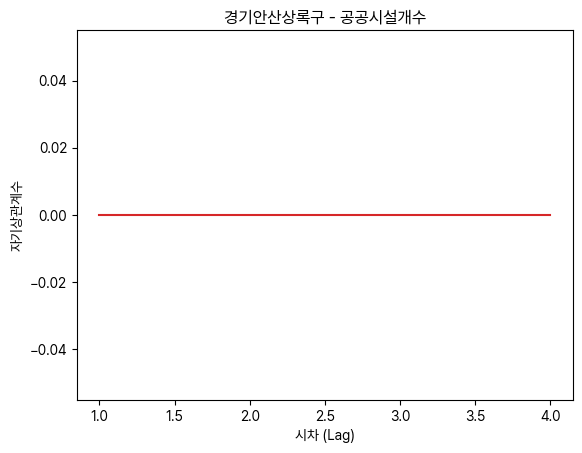

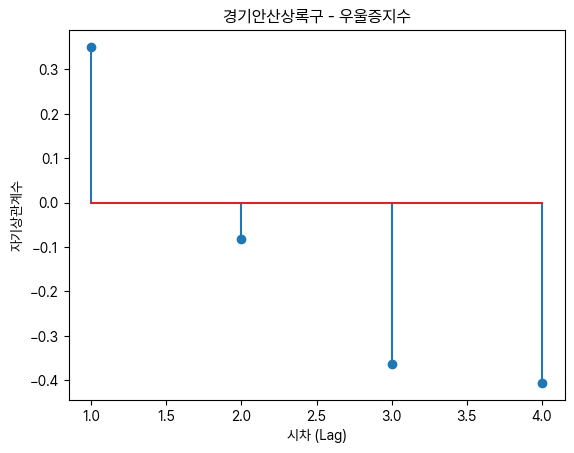

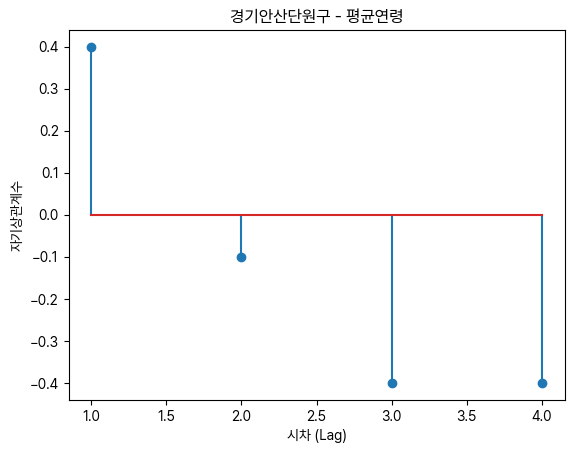

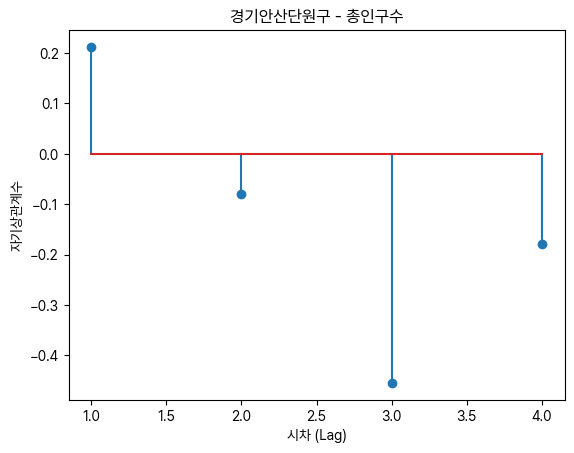

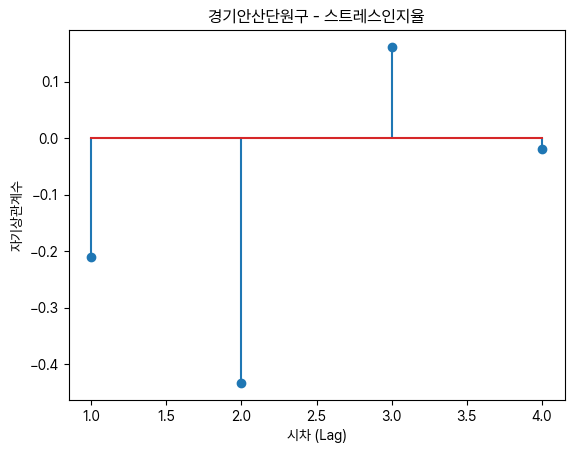

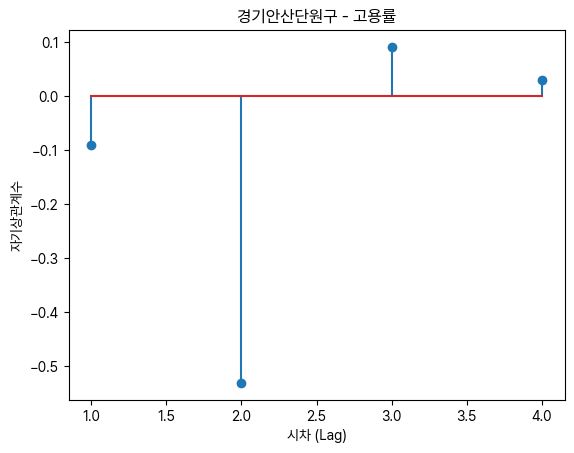

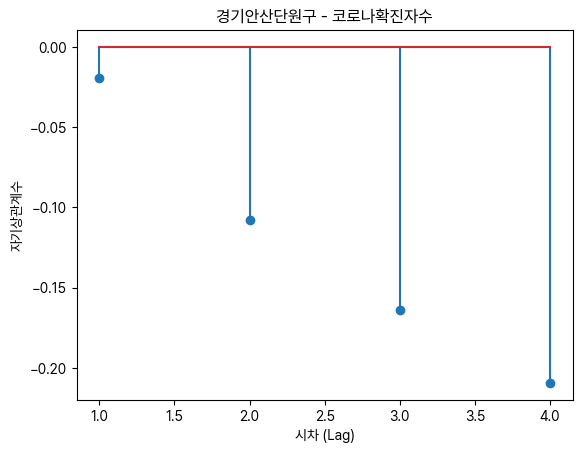

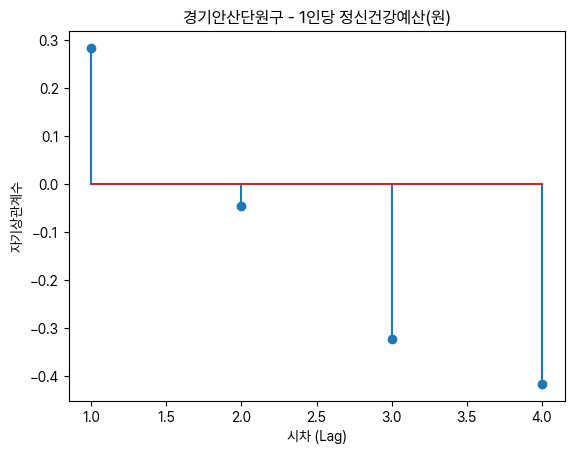

C:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


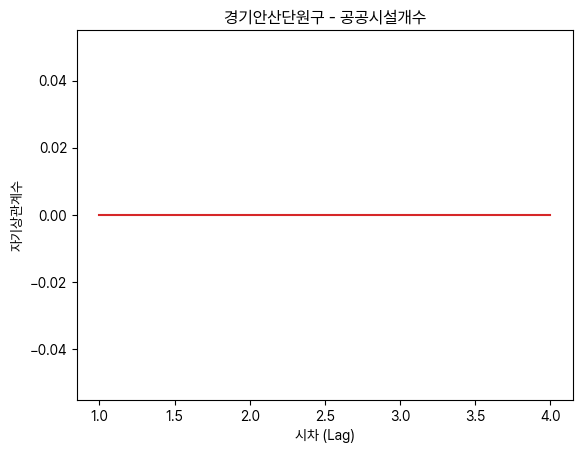

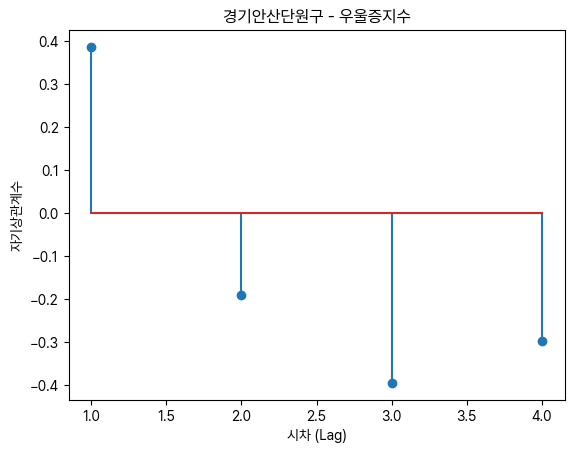

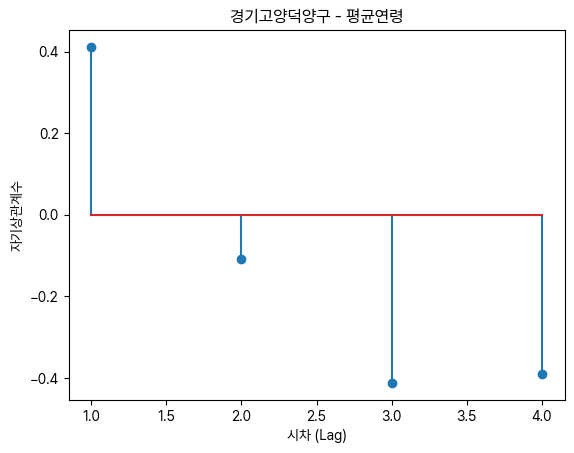

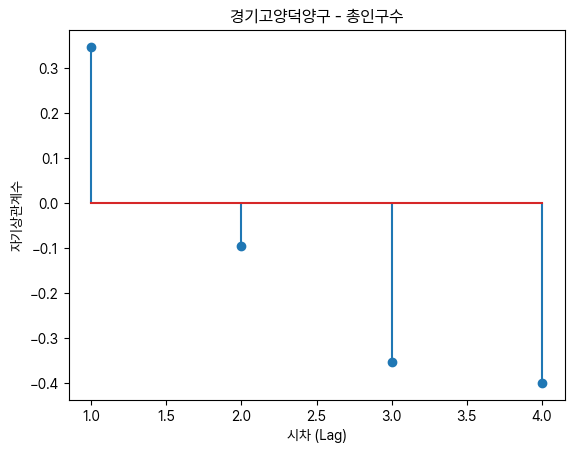

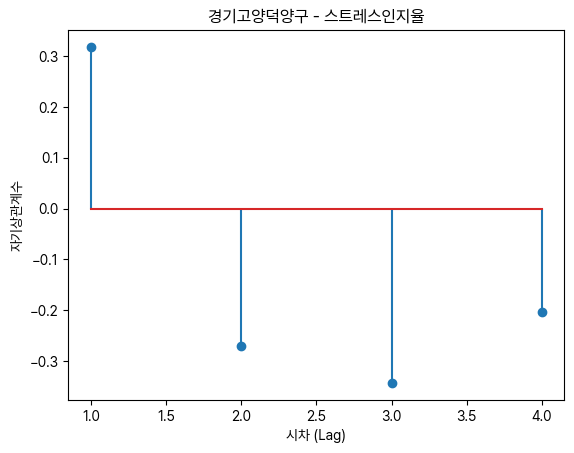

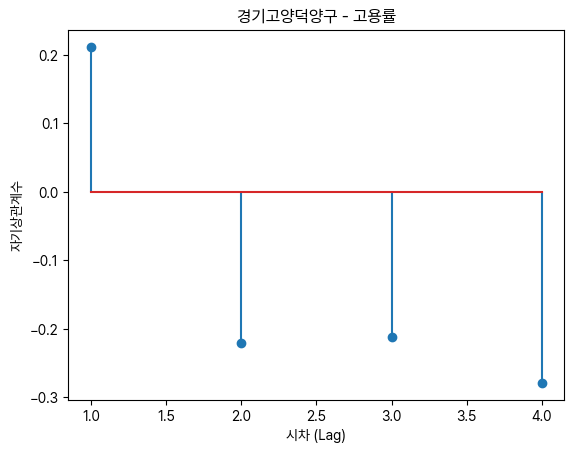

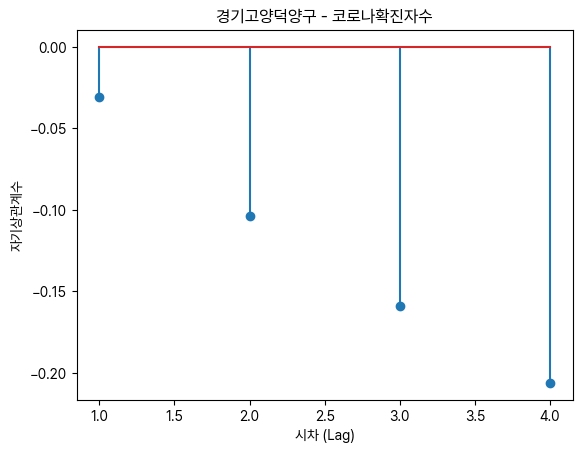

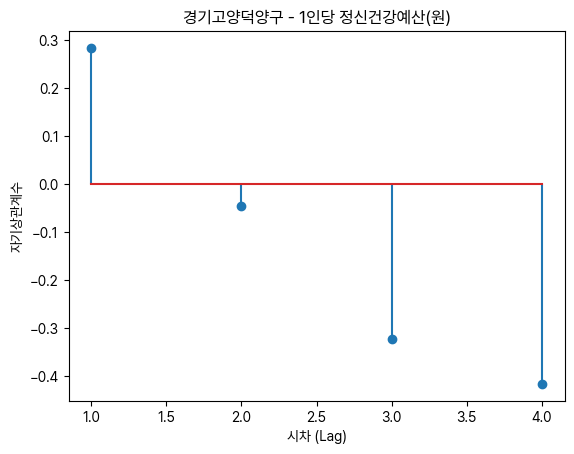

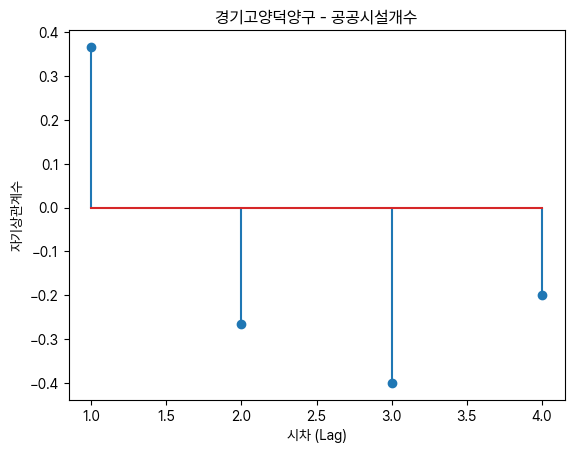

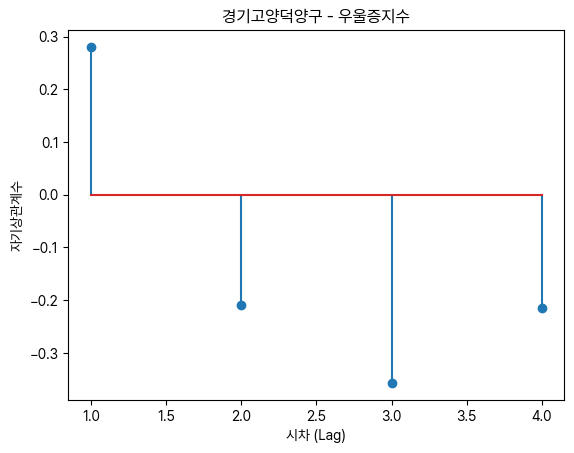

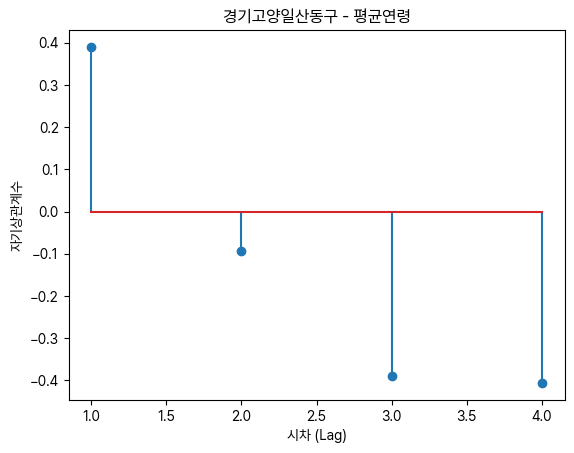

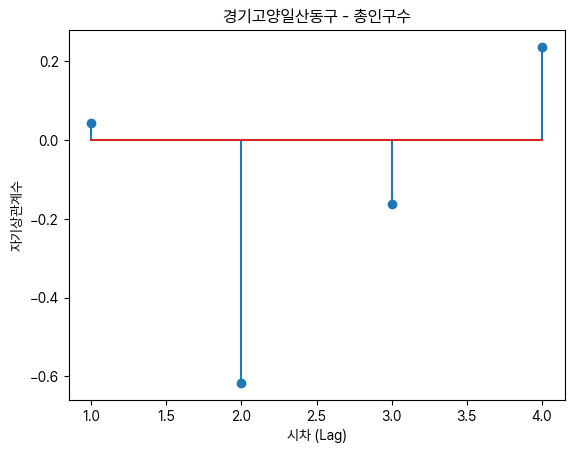

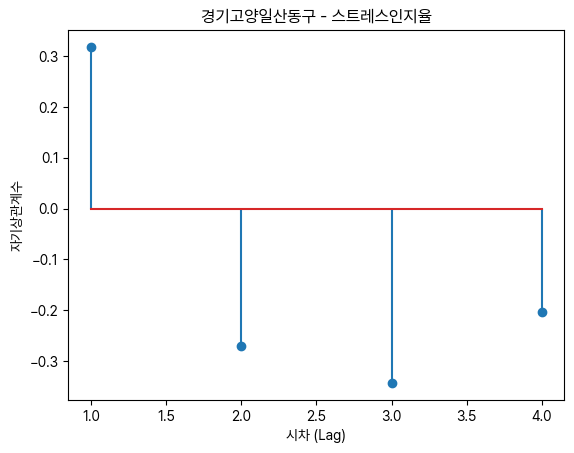

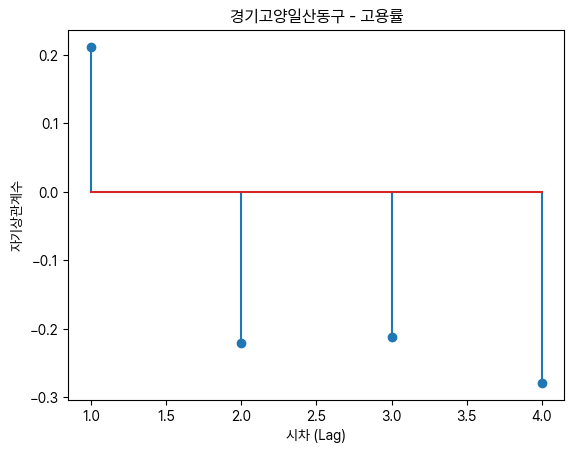

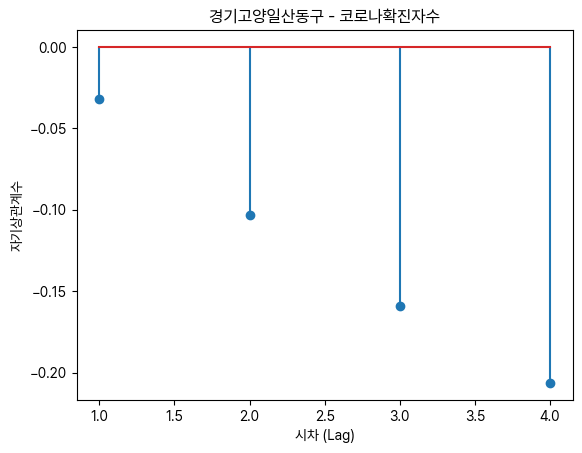

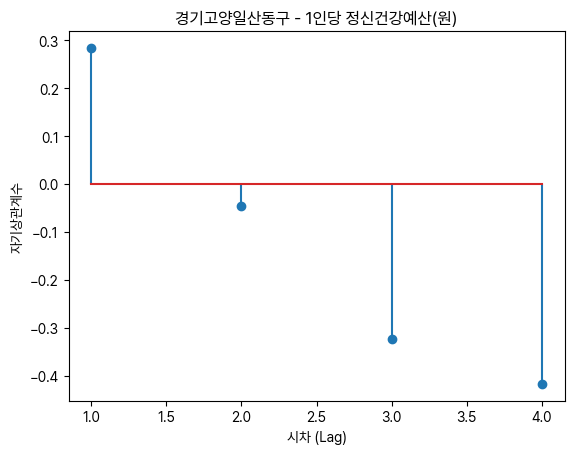

C:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


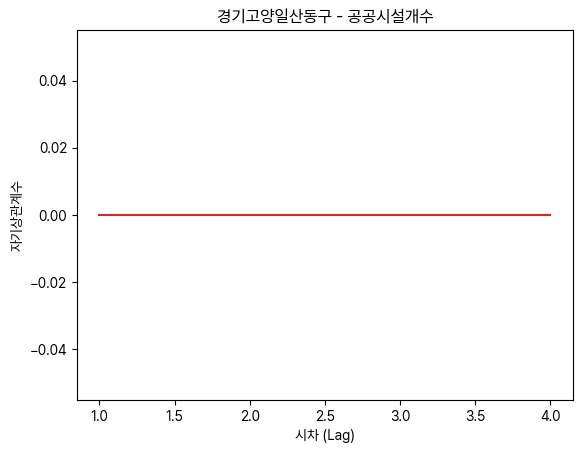

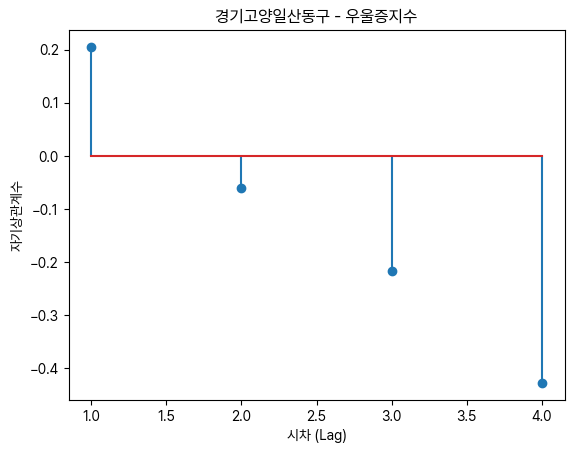

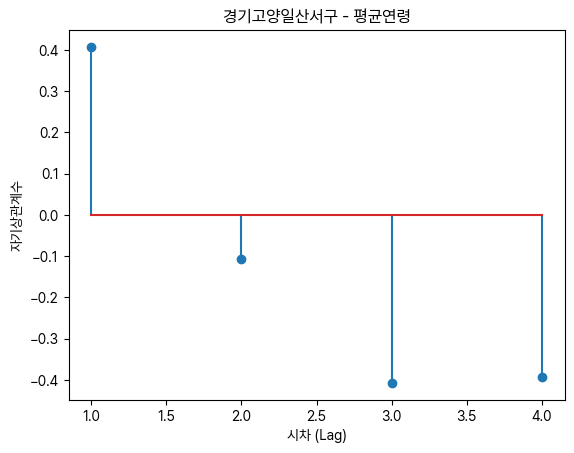

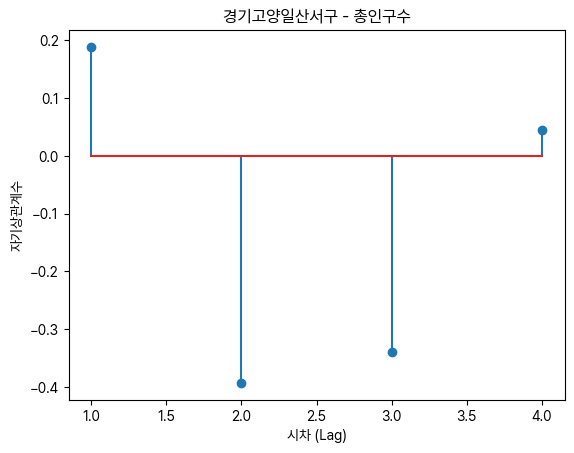

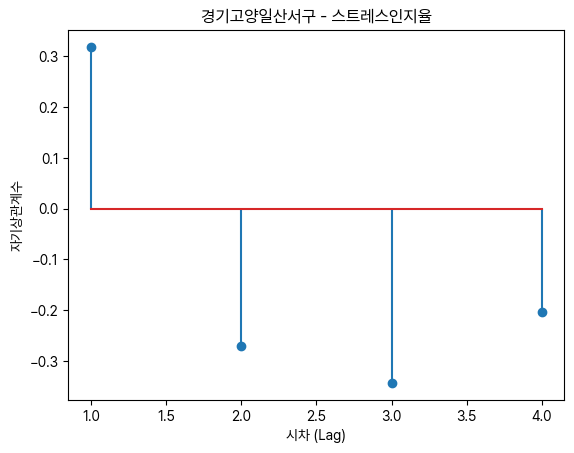

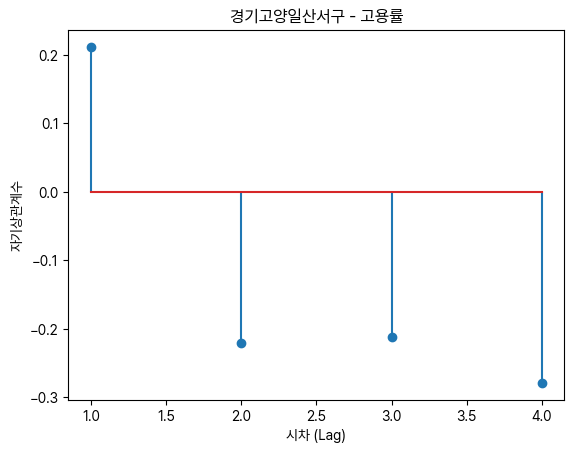

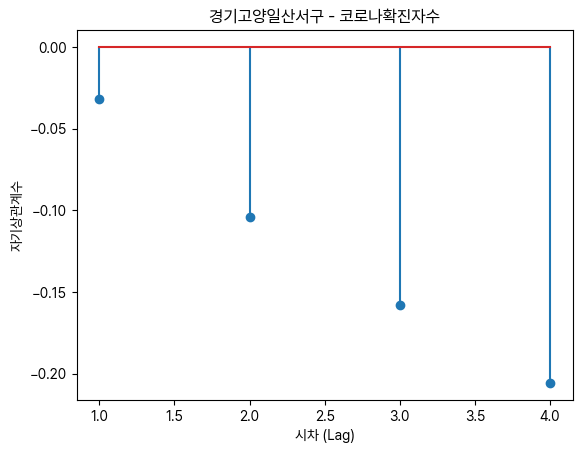

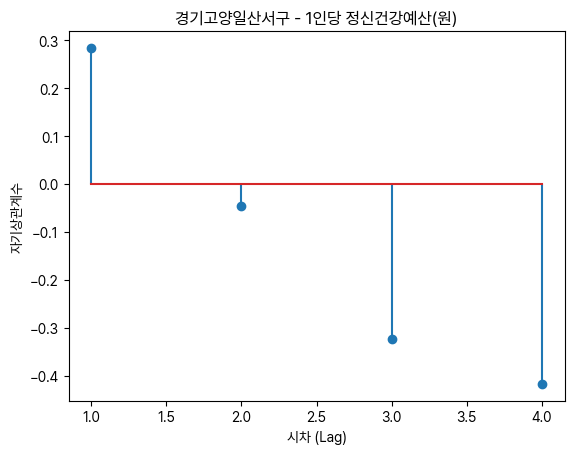

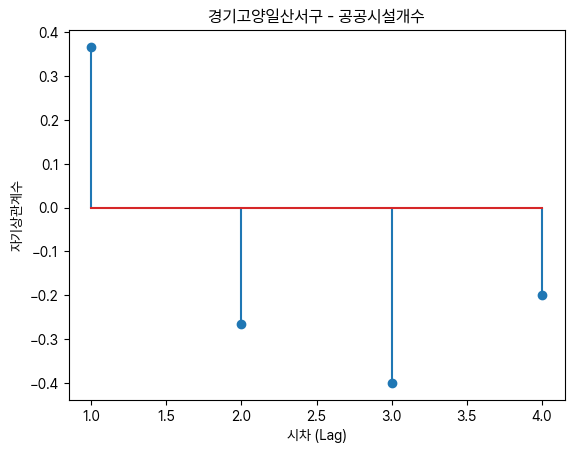

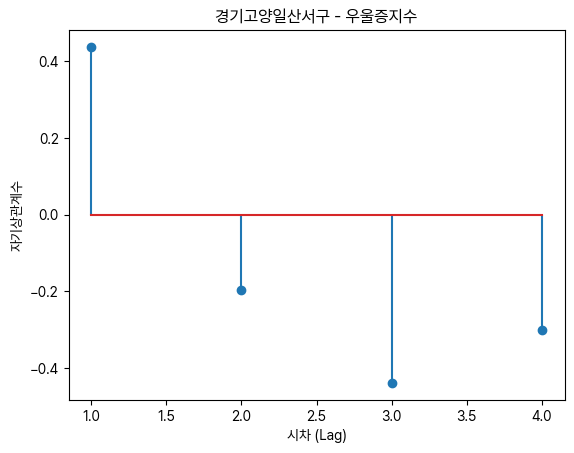

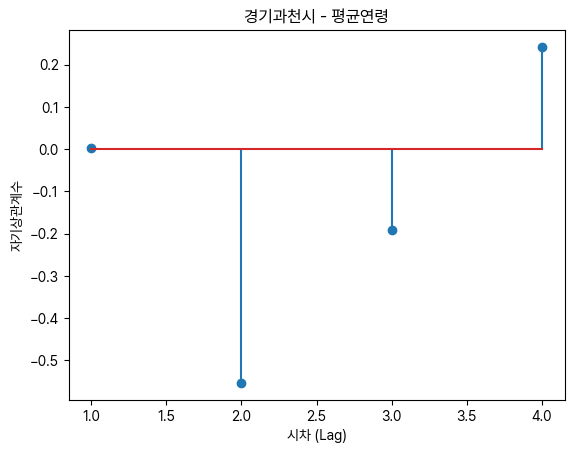

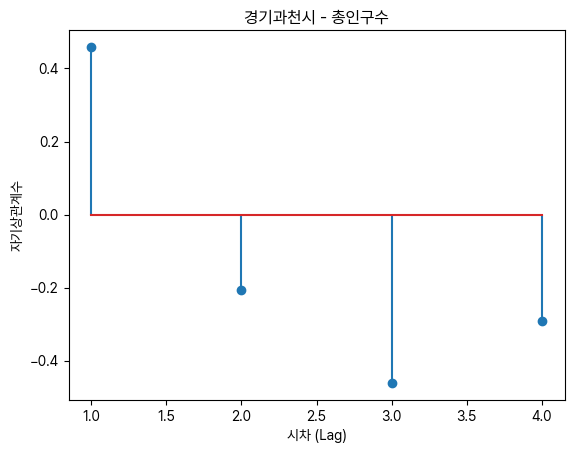

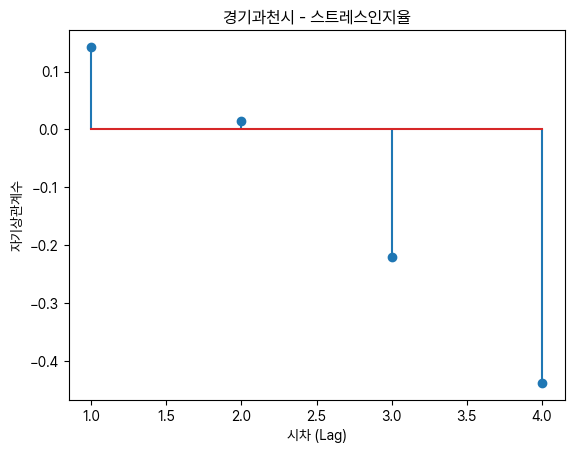

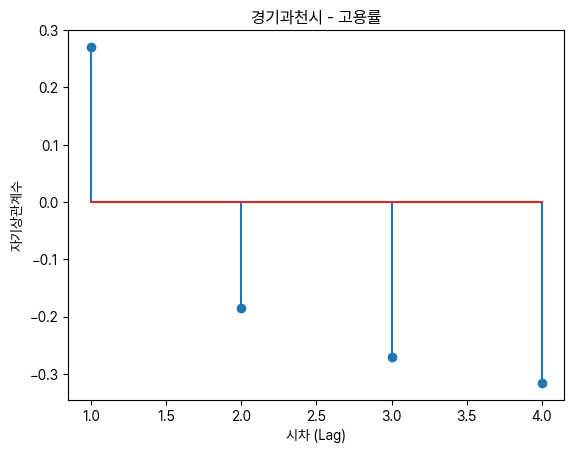

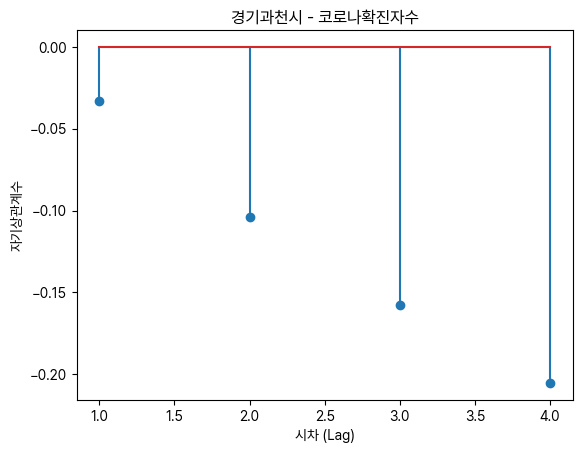

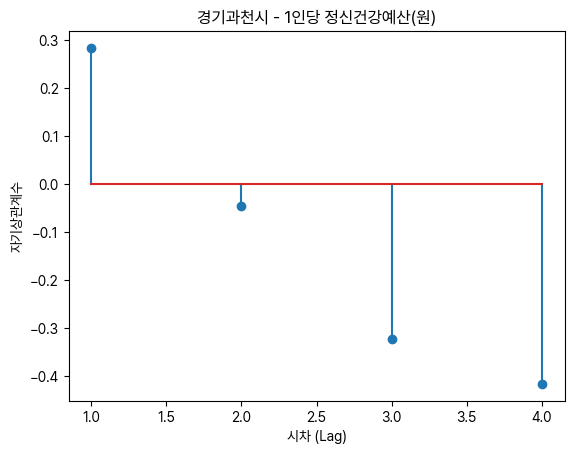

C:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


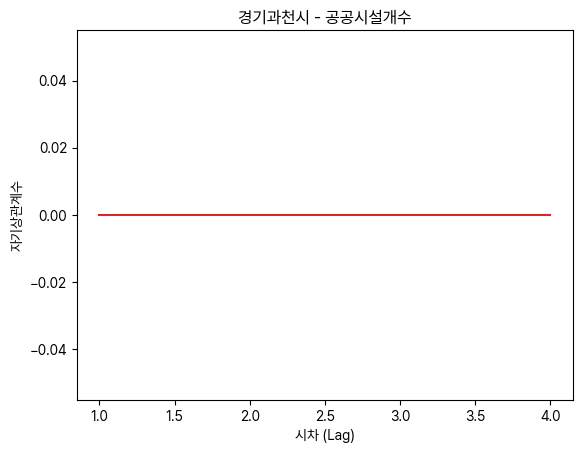

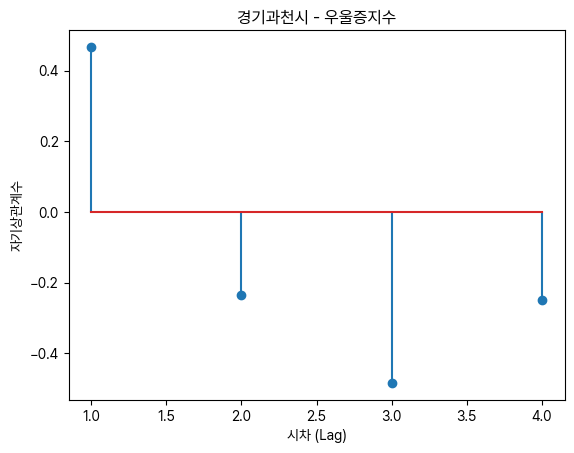

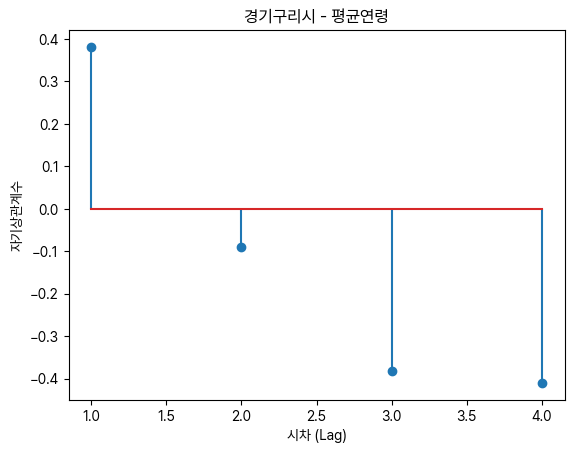

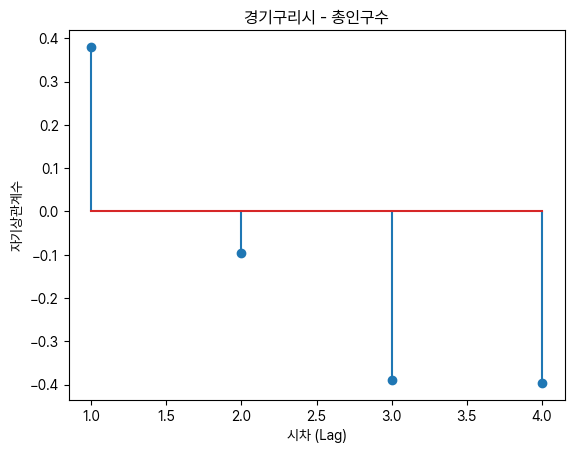

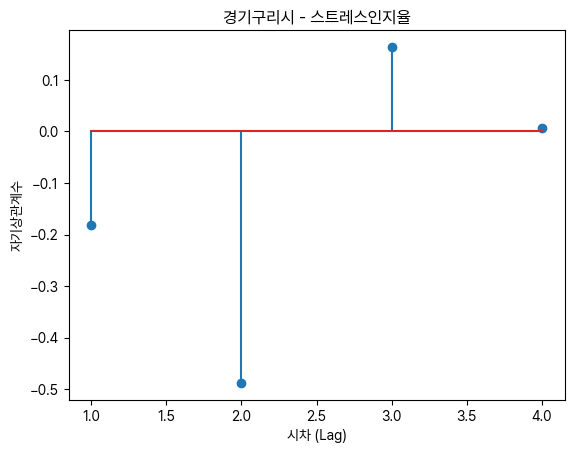

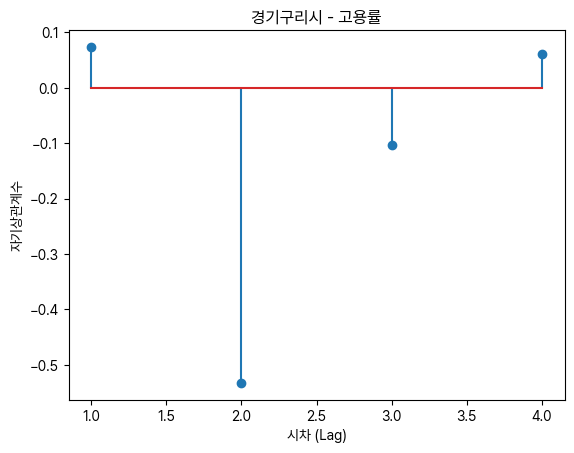

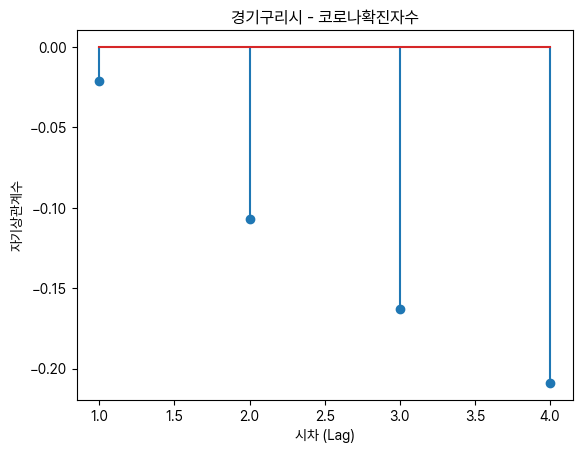

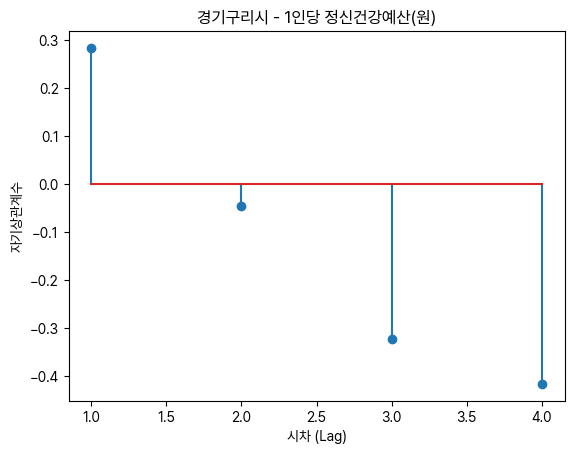

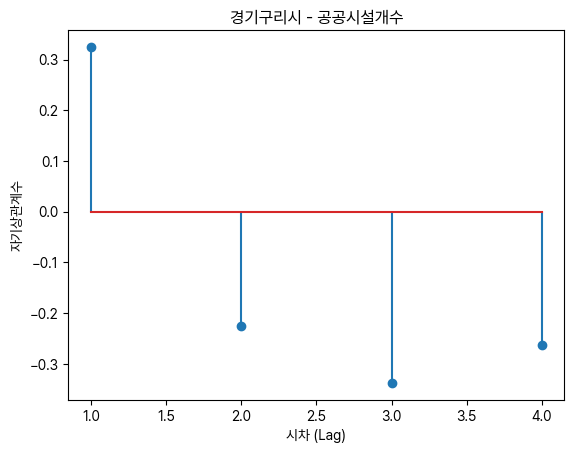

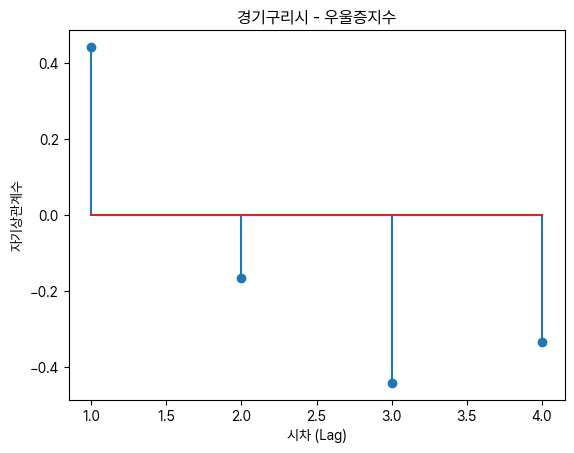

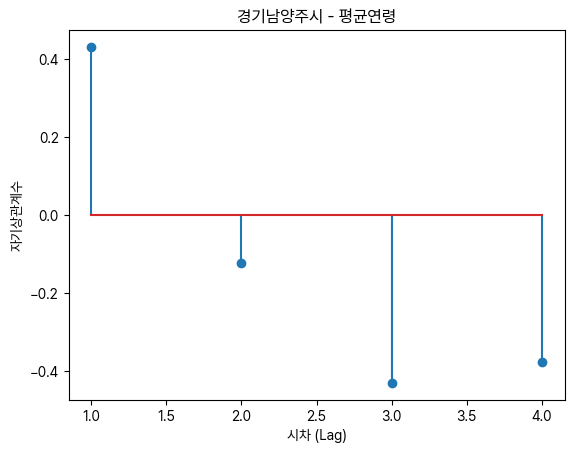

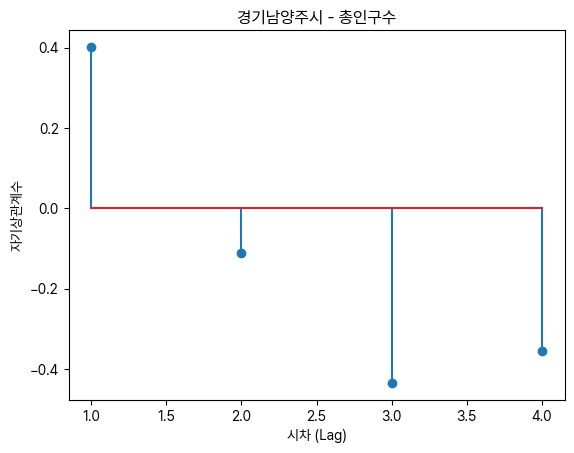

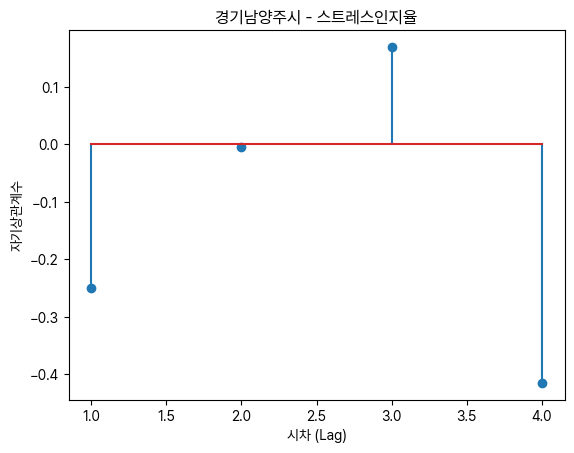

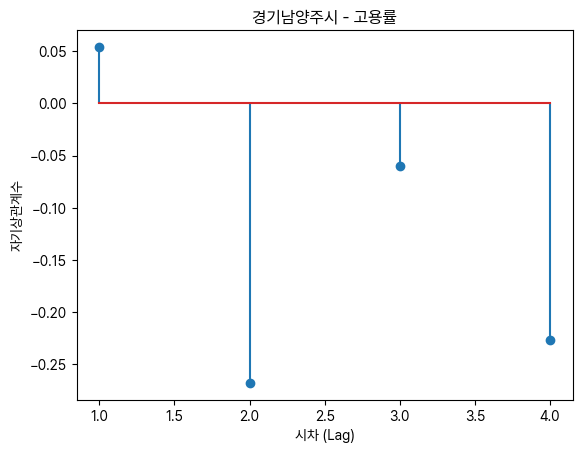

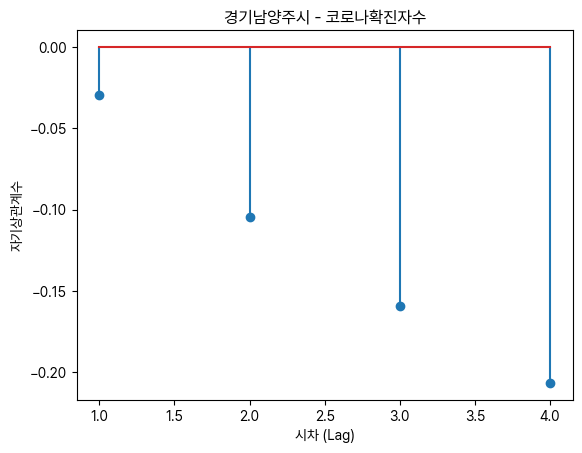

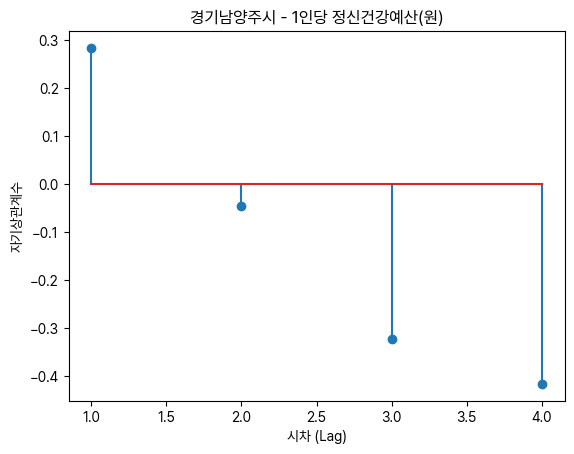

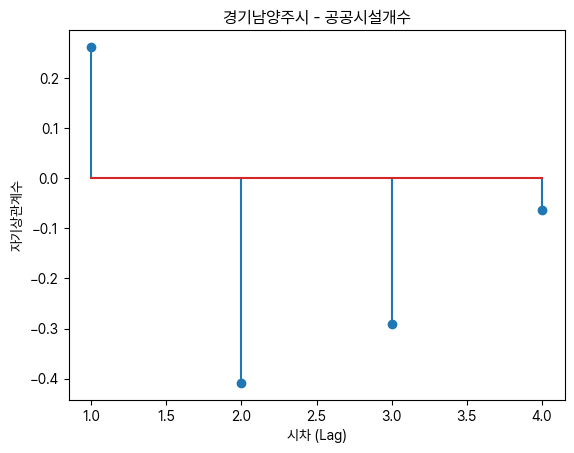

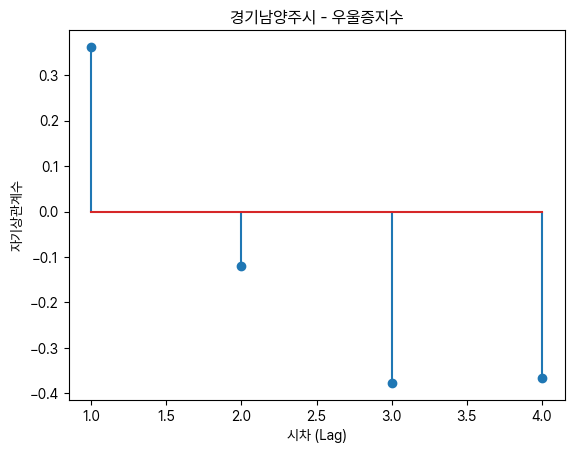

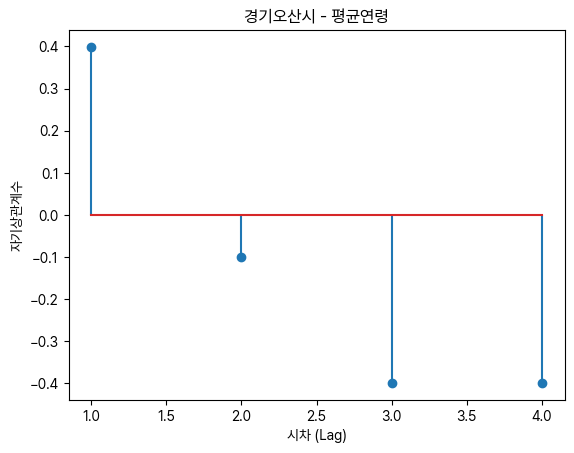

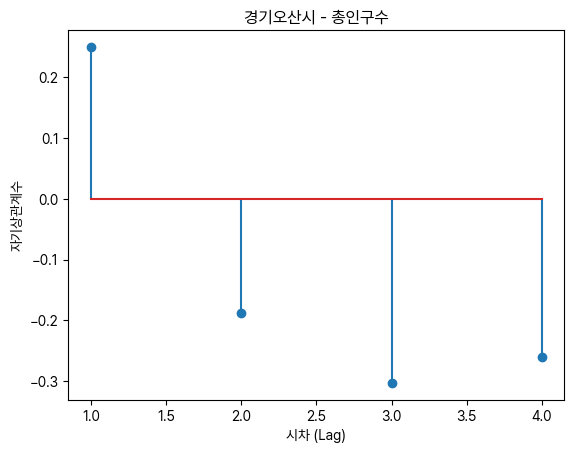

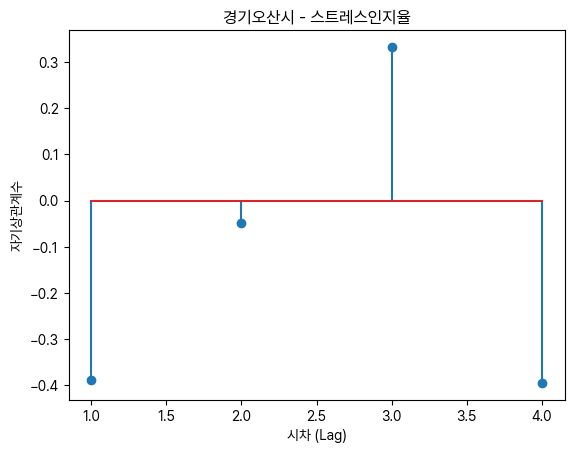

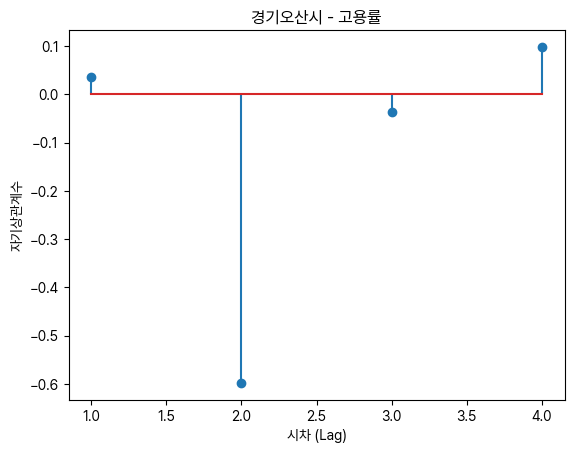

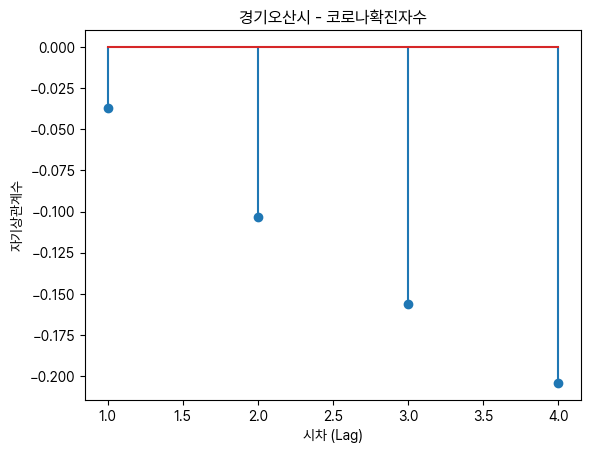

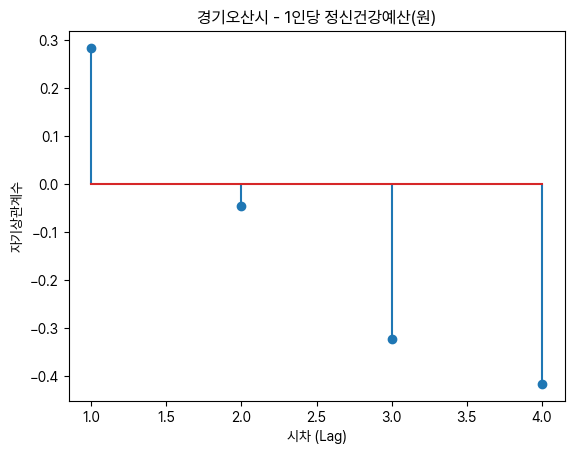

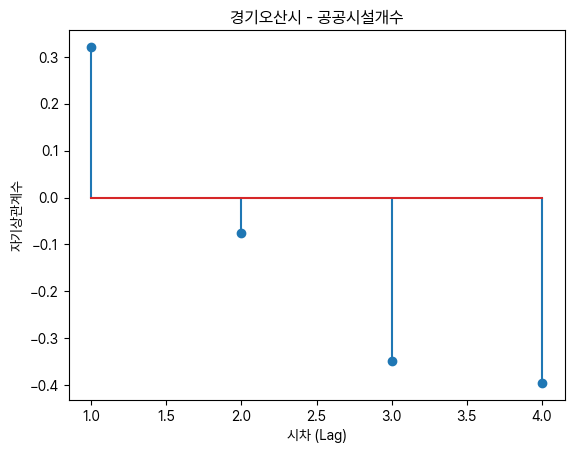

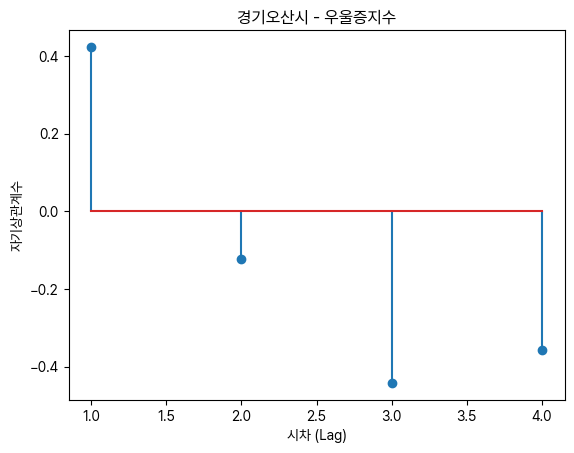

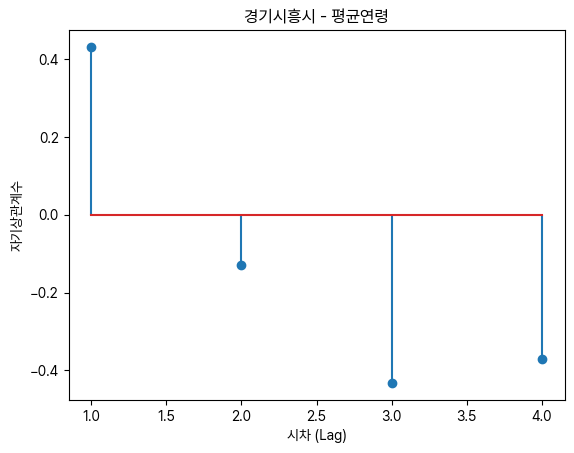

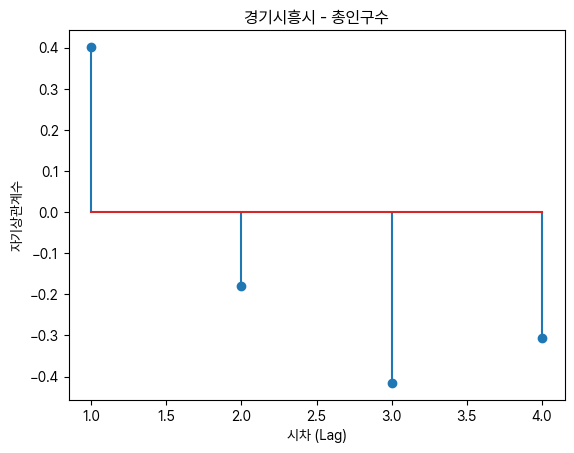

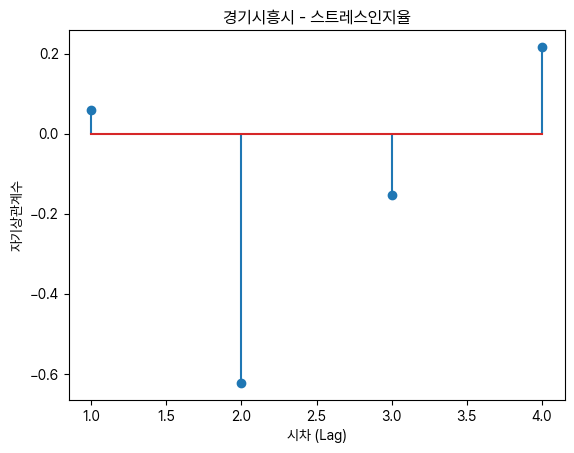

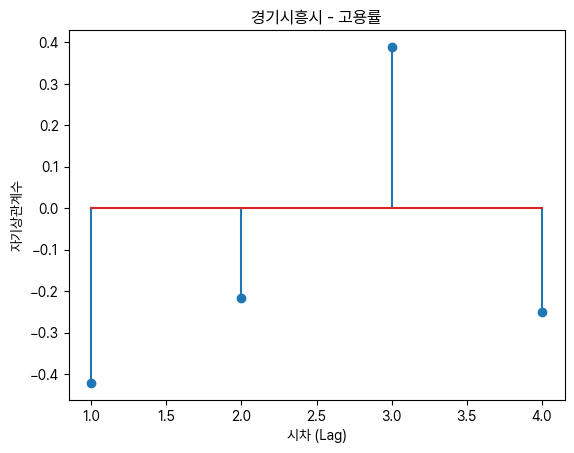

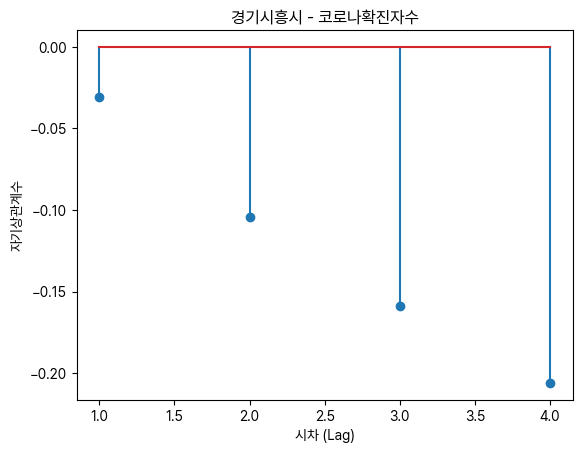

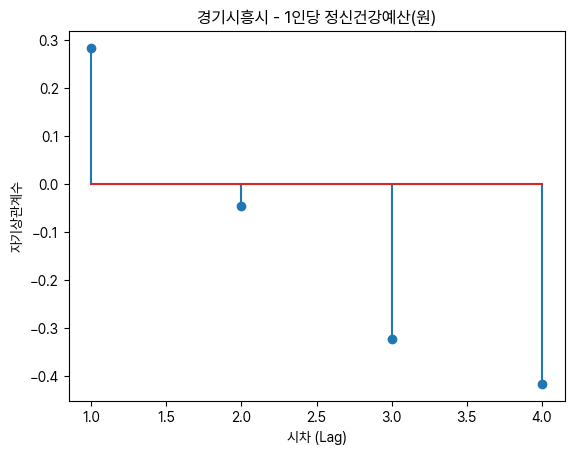

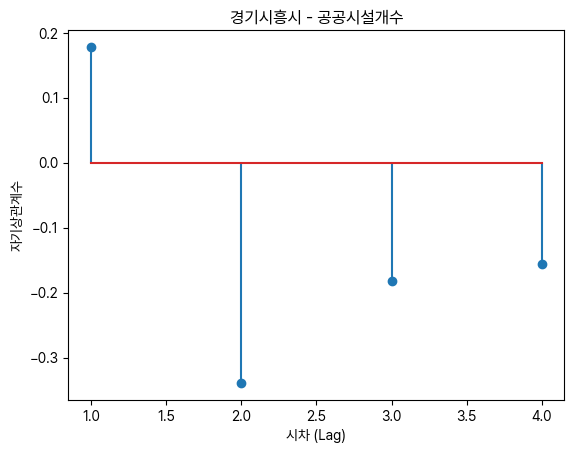

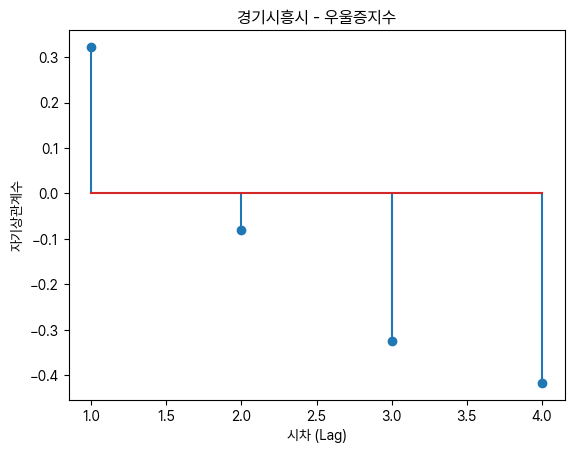

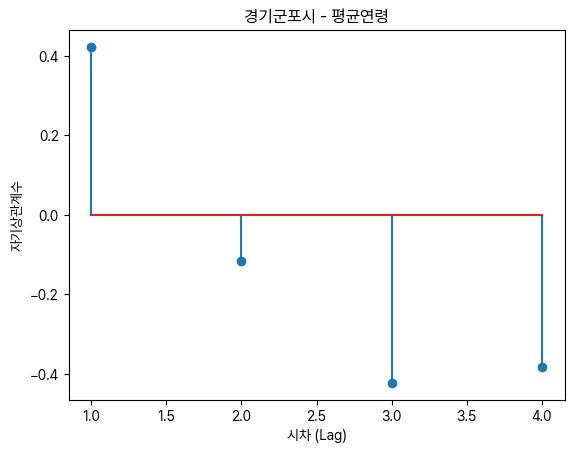

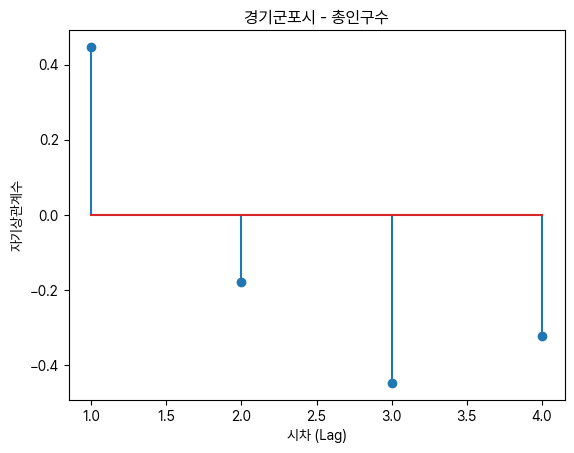

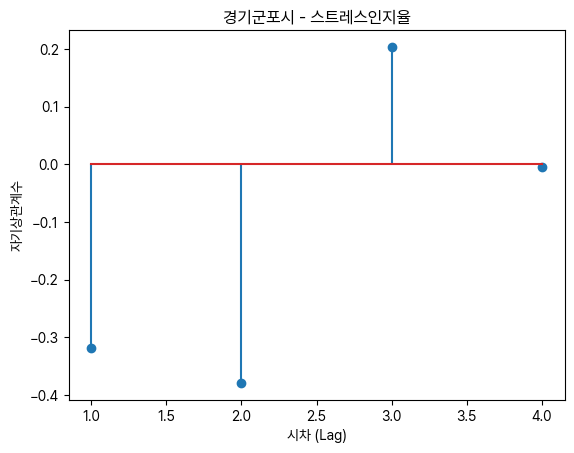

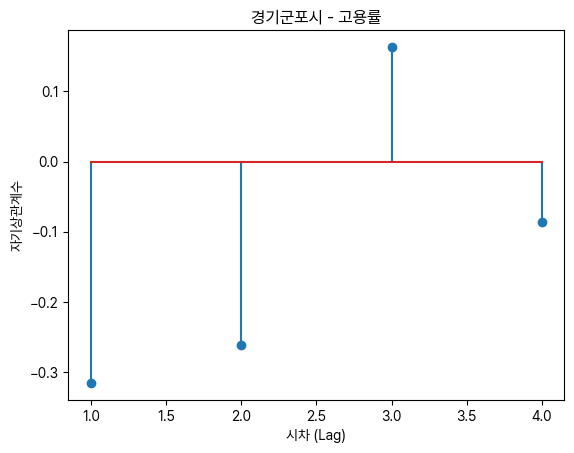

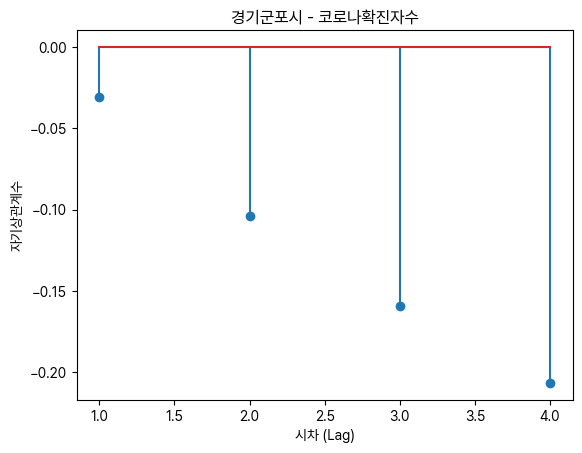

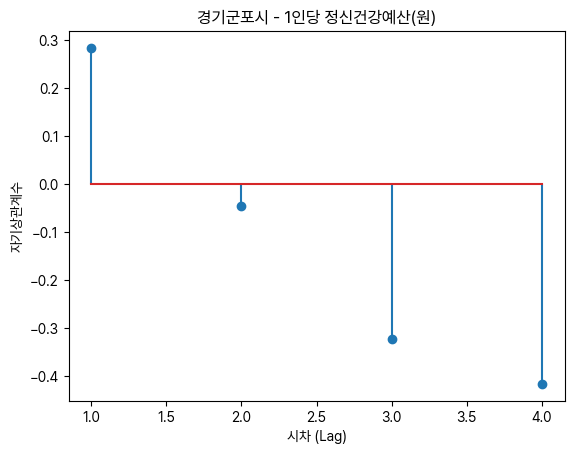

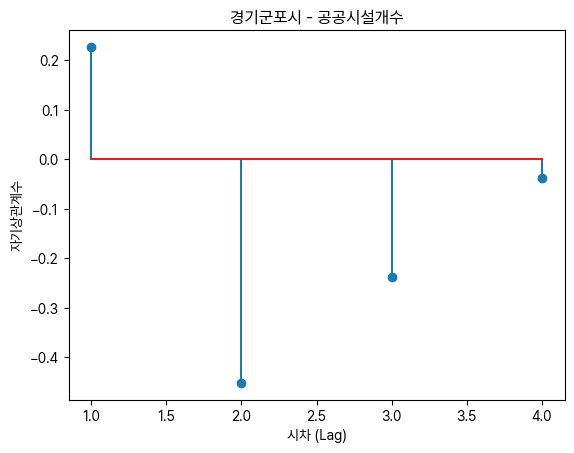

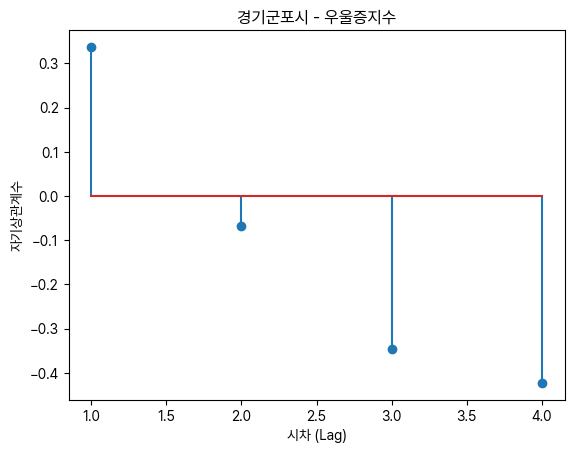

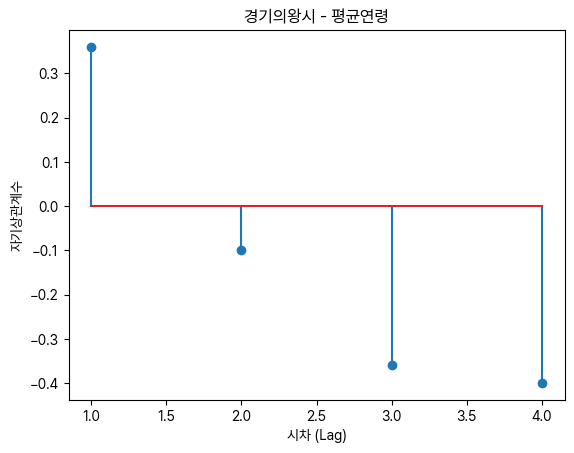

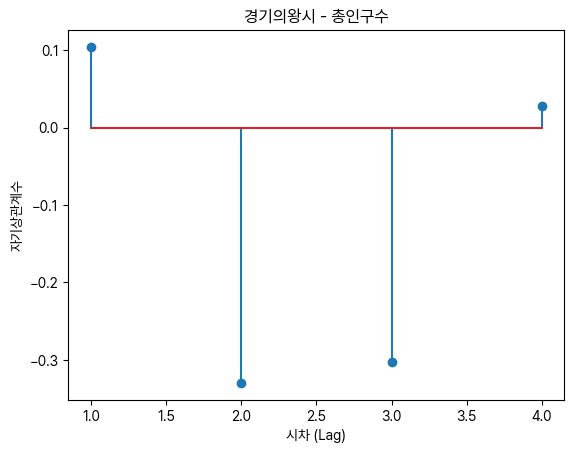

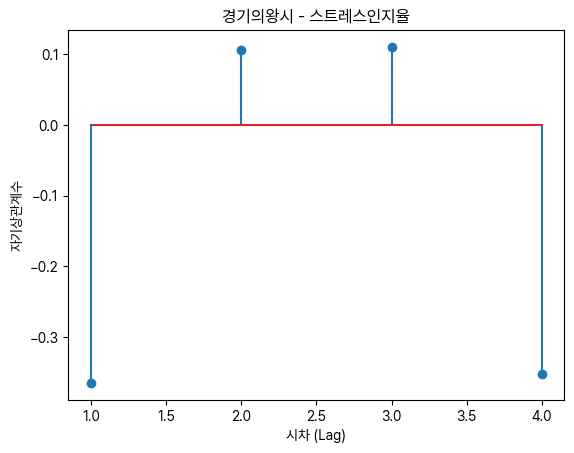

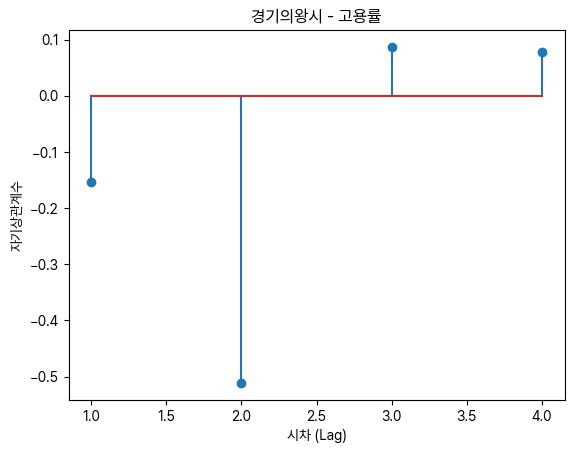

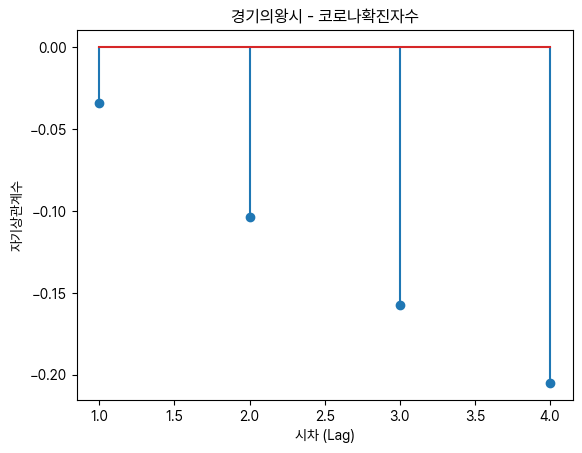

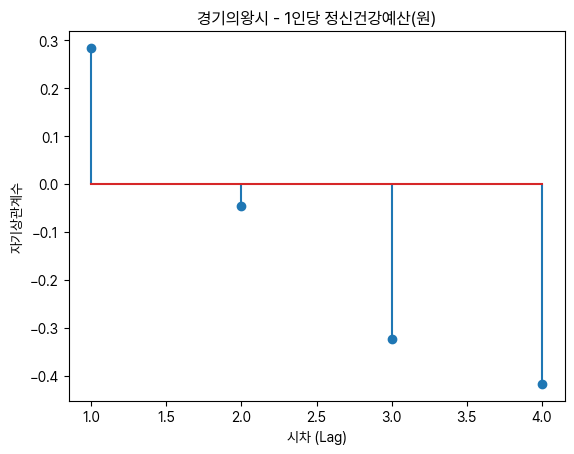

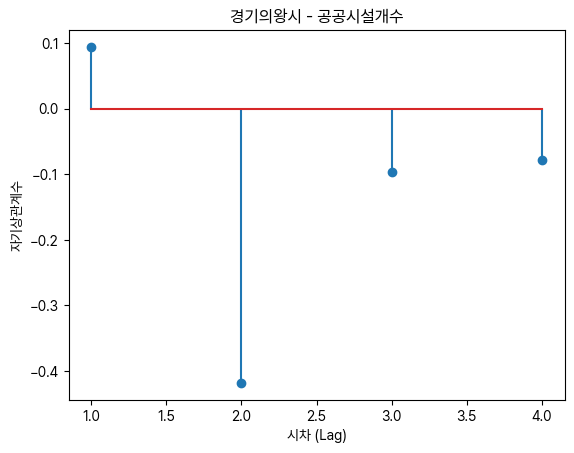

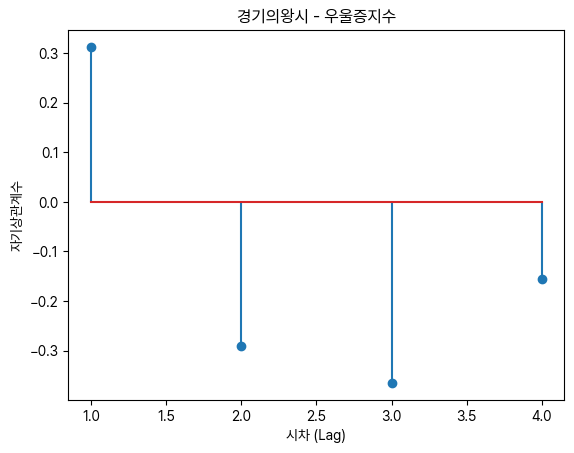

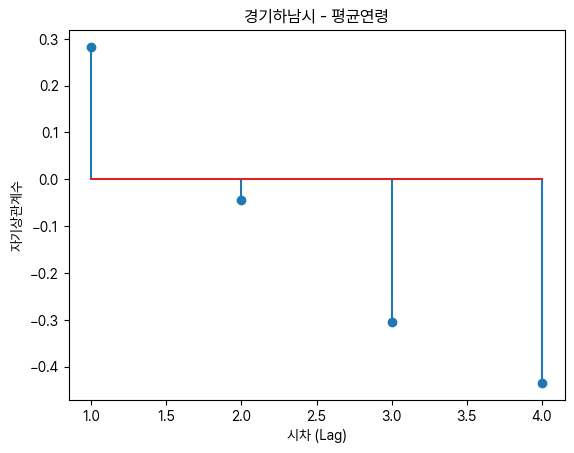

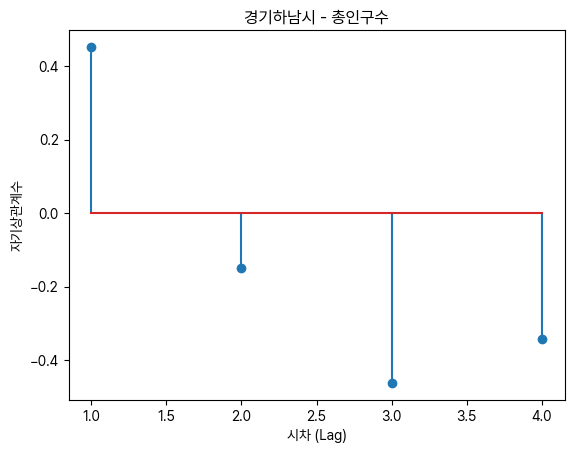

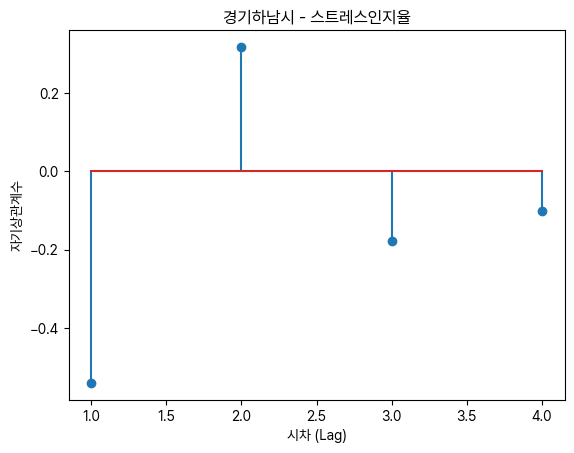

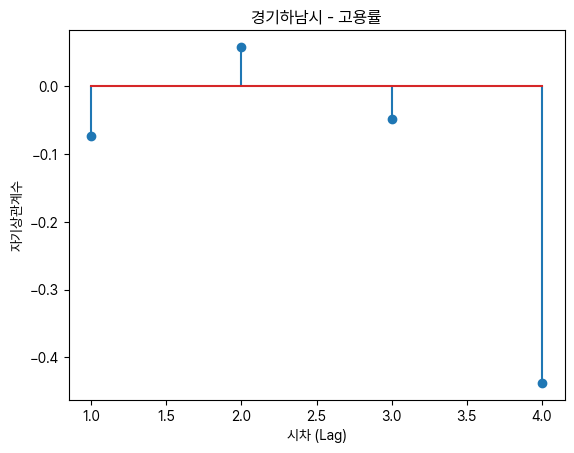

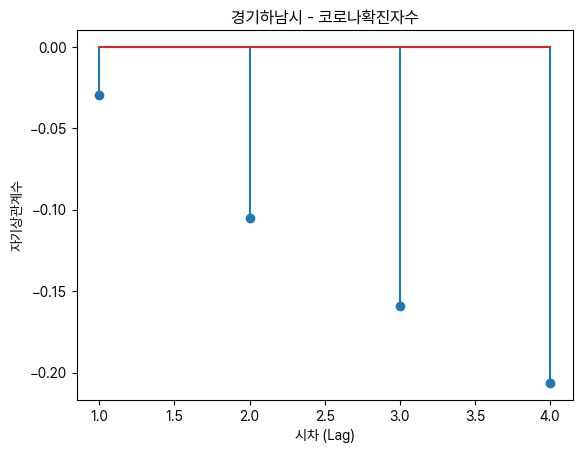

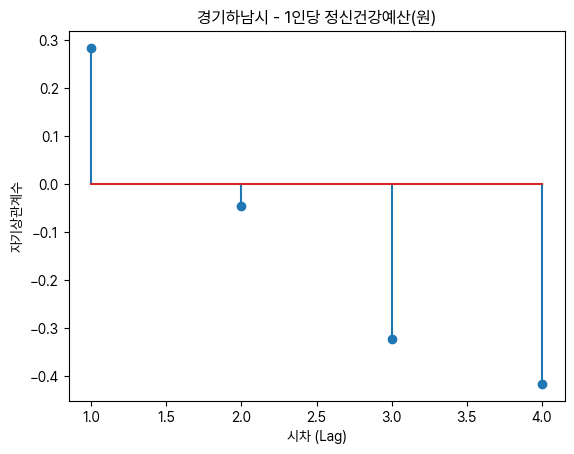

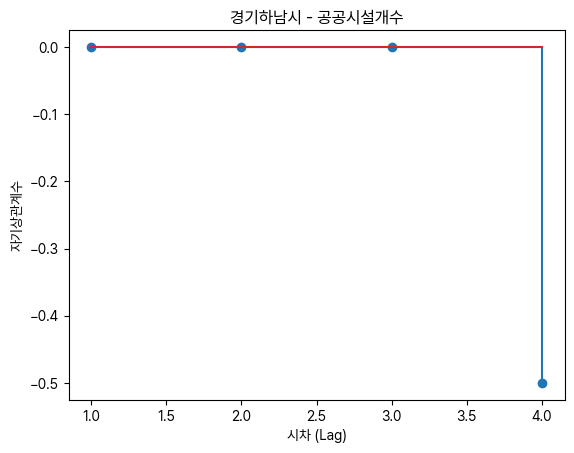

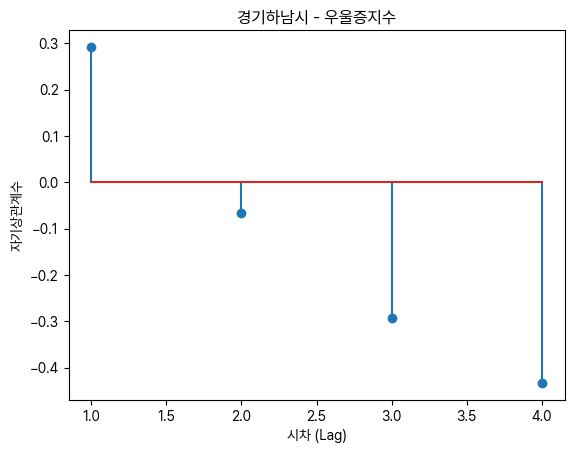

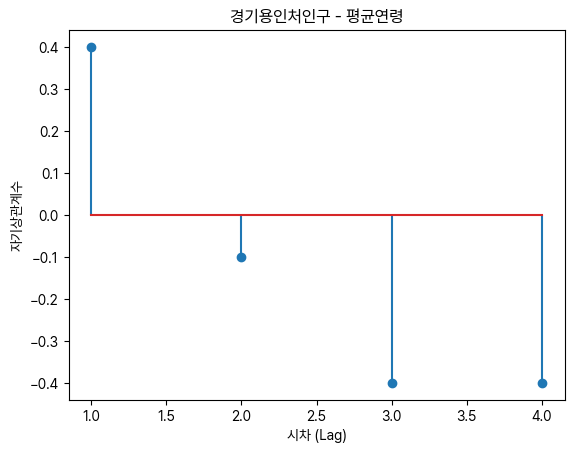

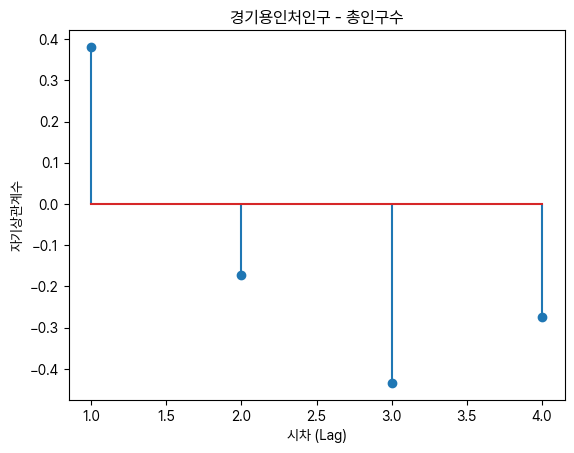

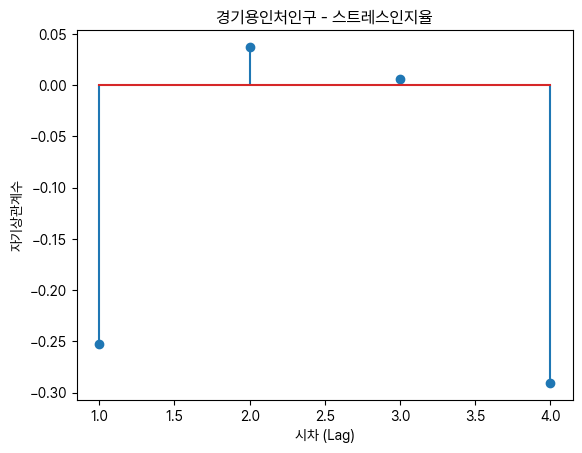

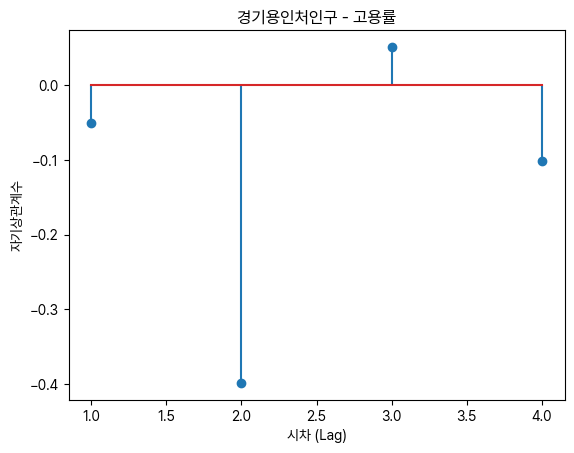

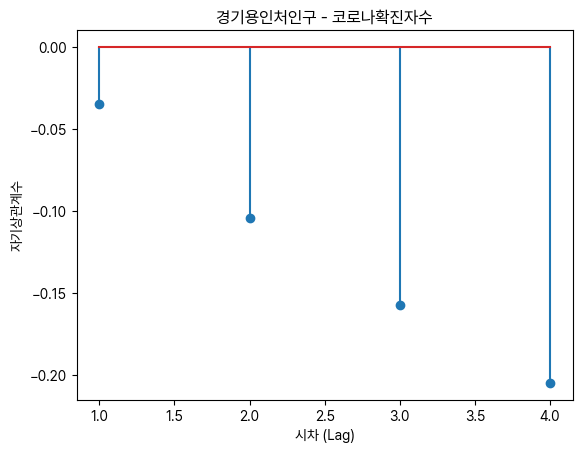

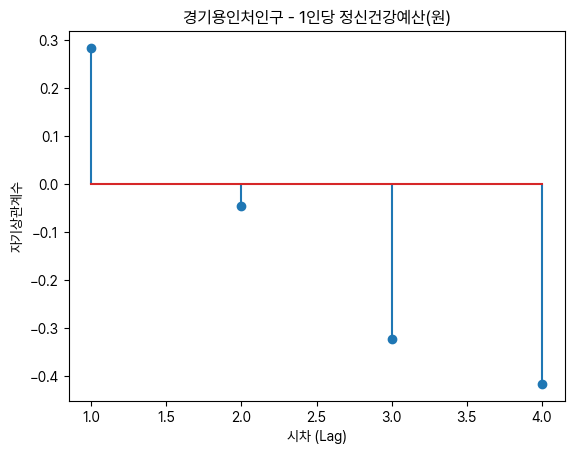

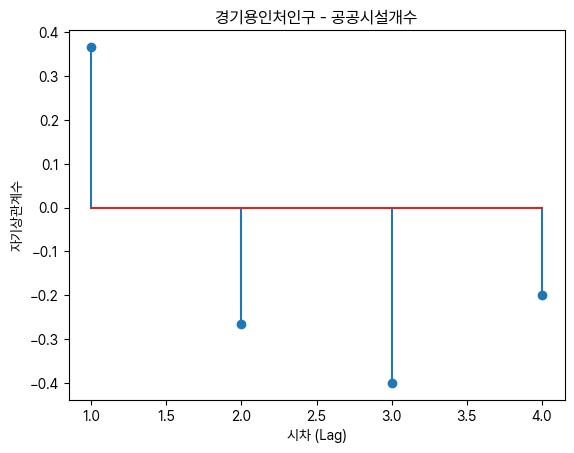

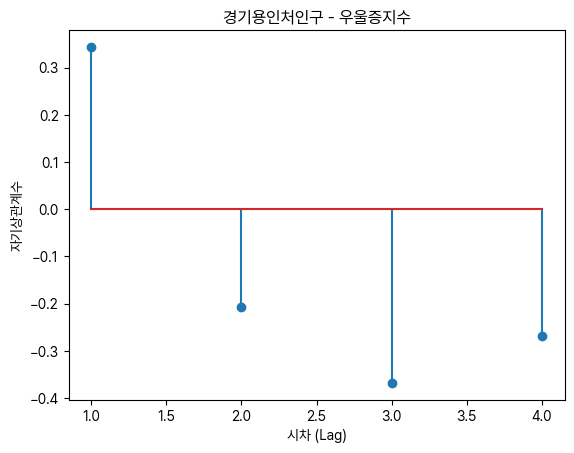

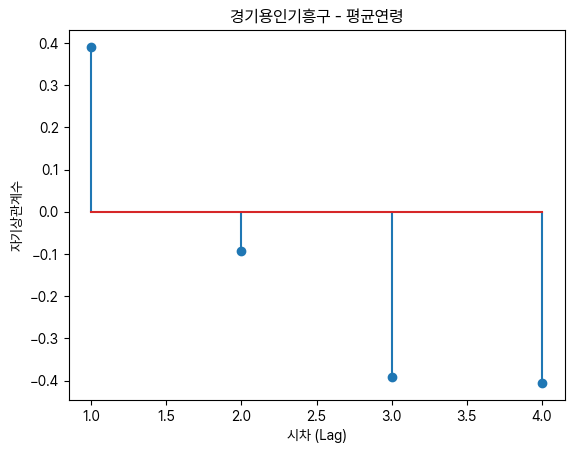

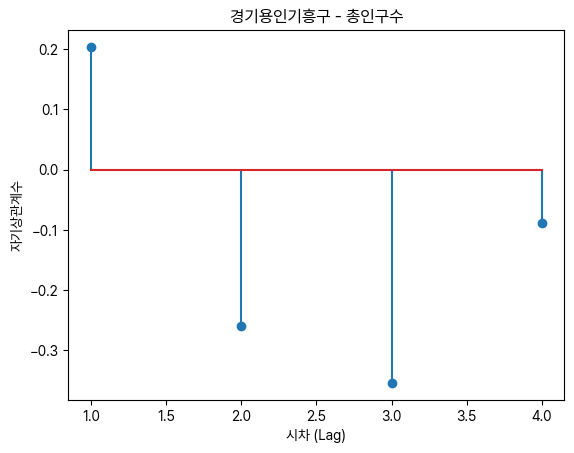

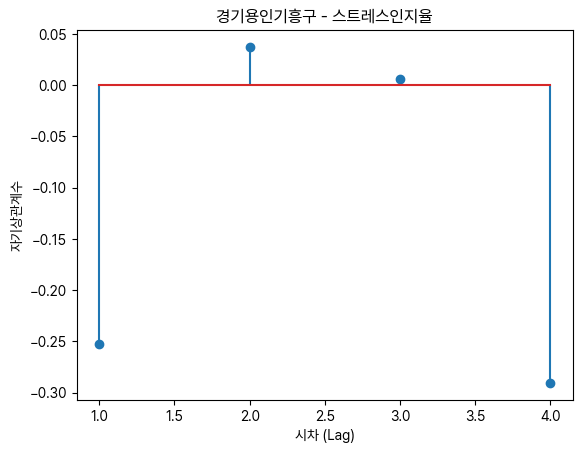

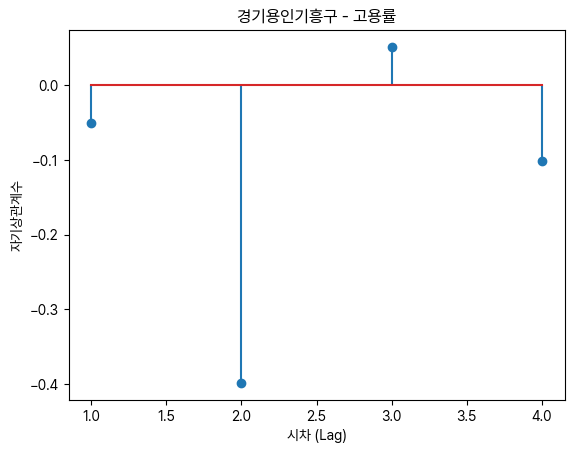

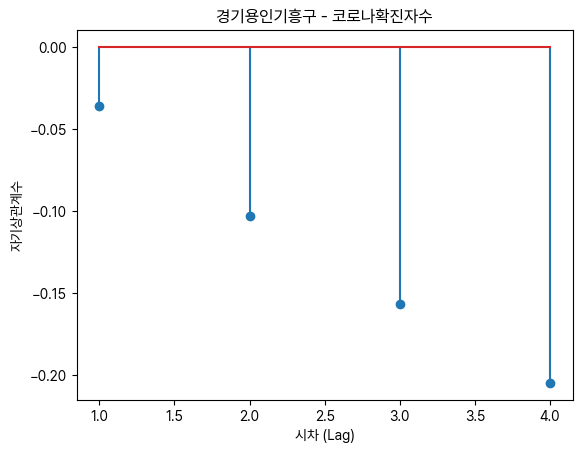

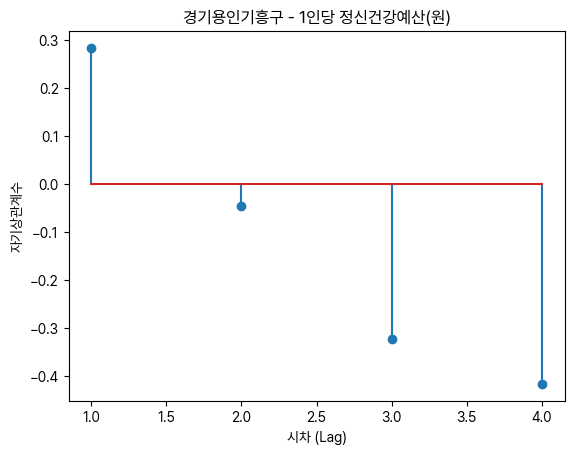

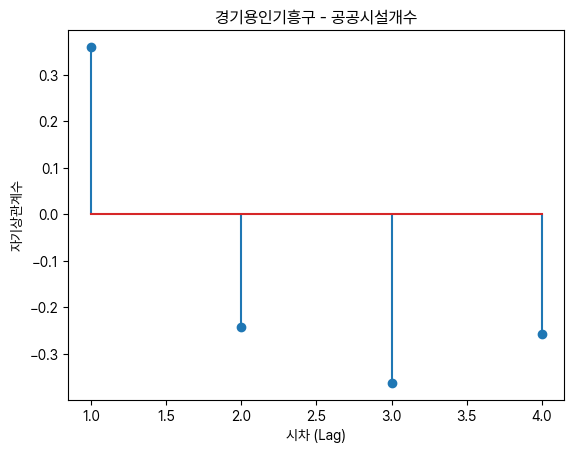

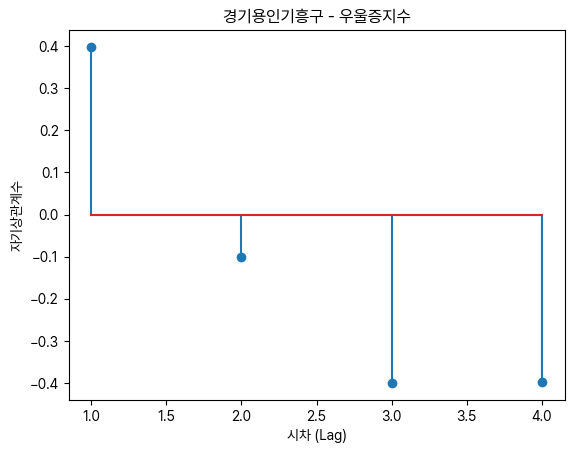

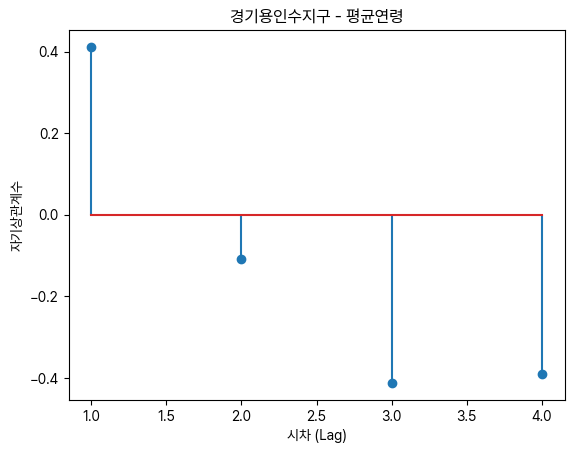

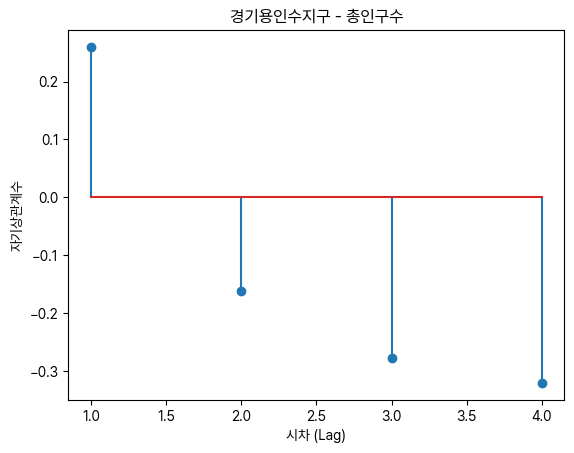

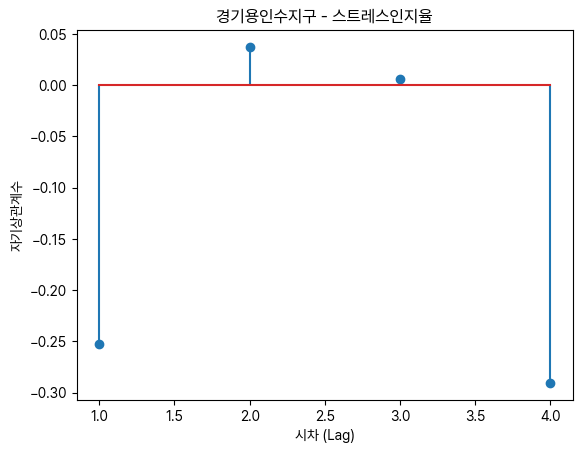

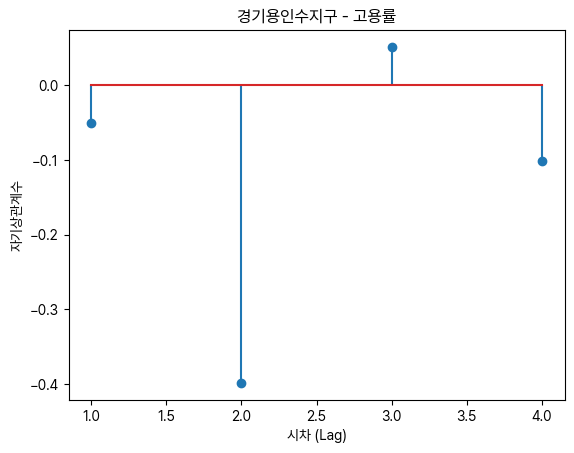

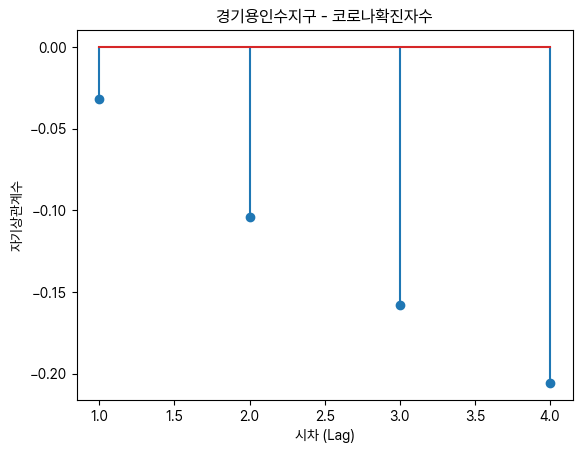

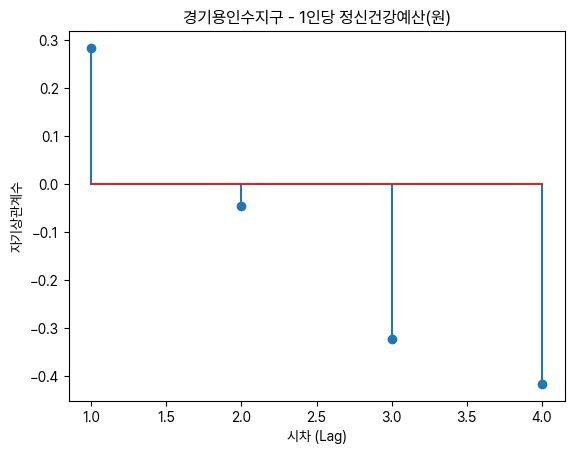

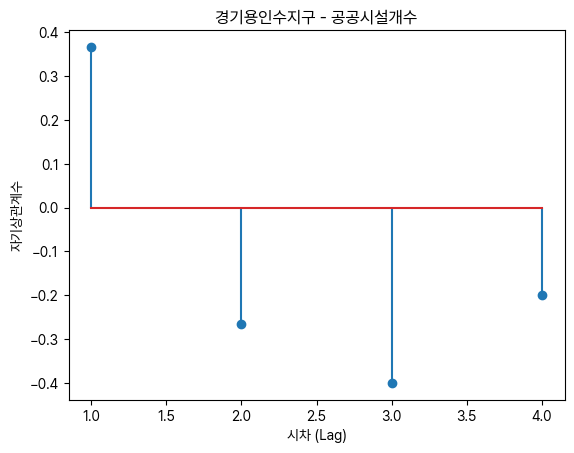

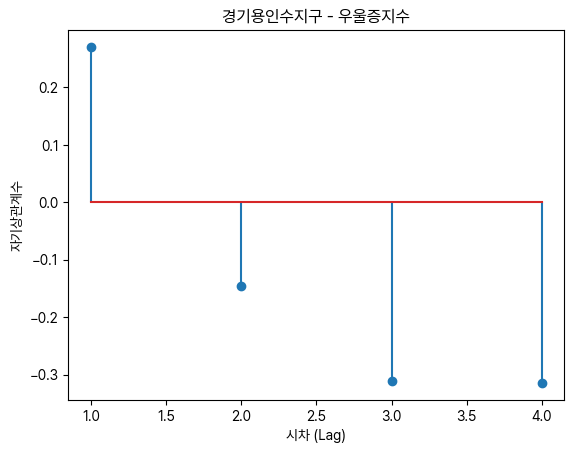

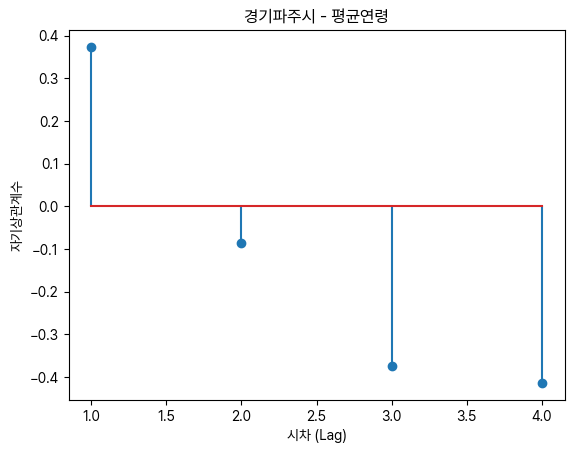

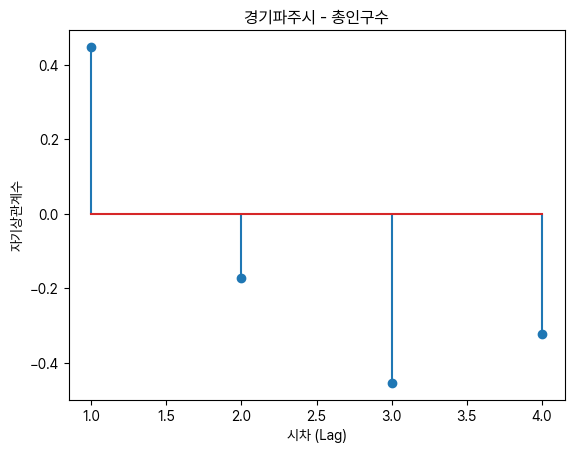

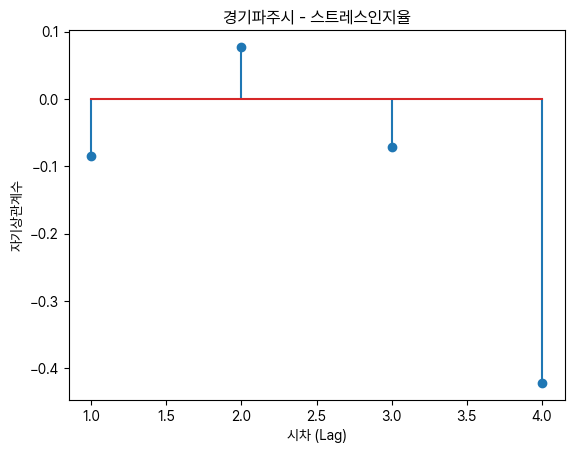

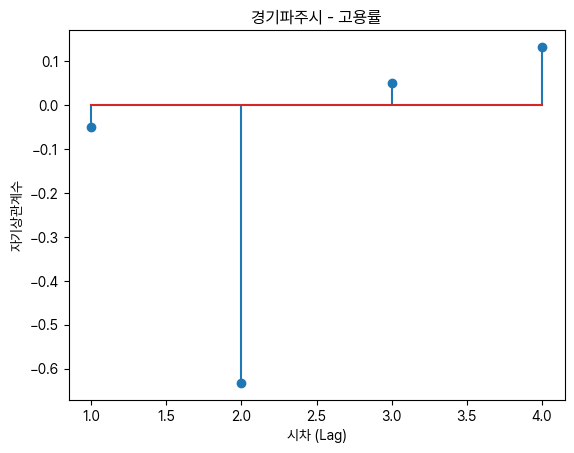

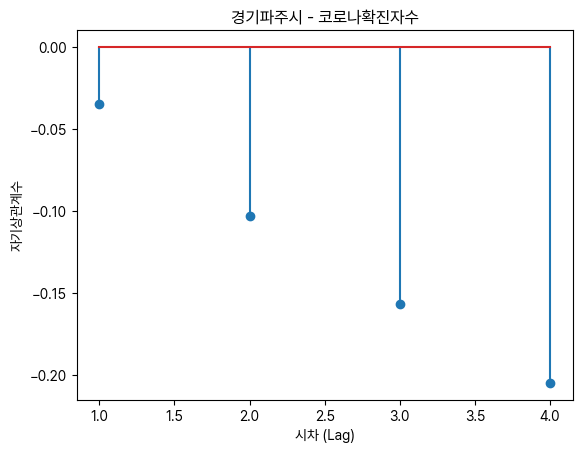

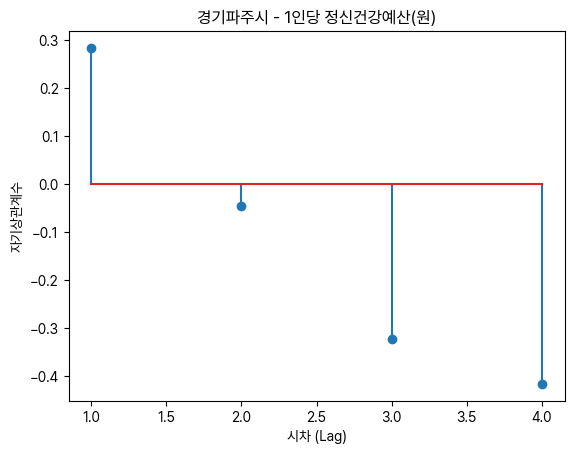

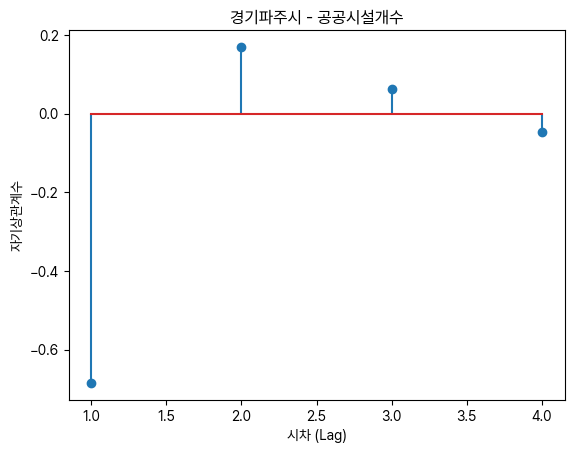

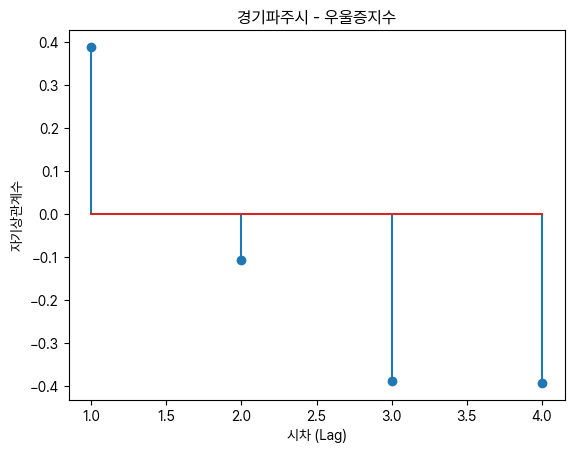

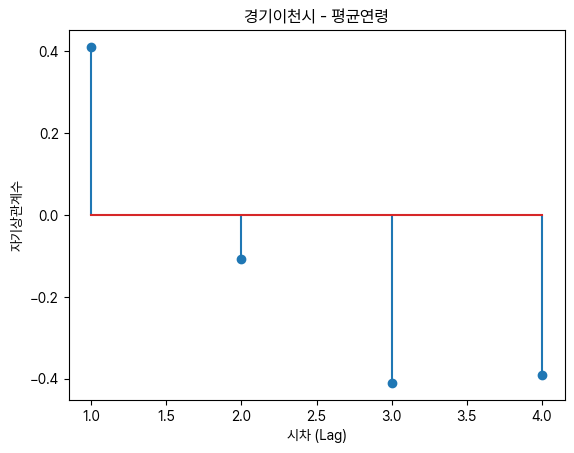

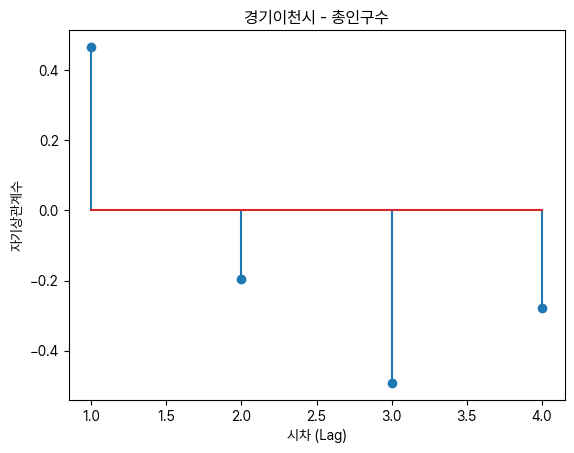

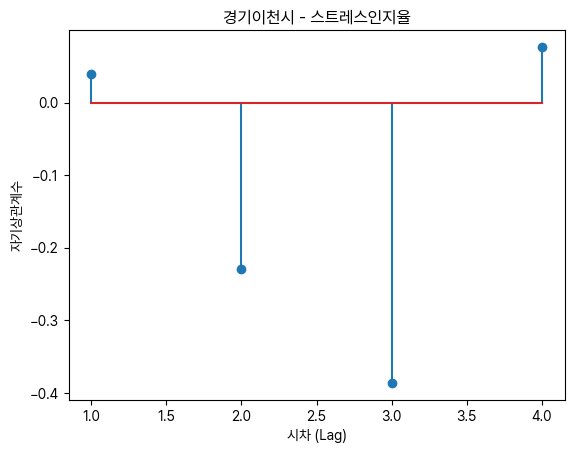

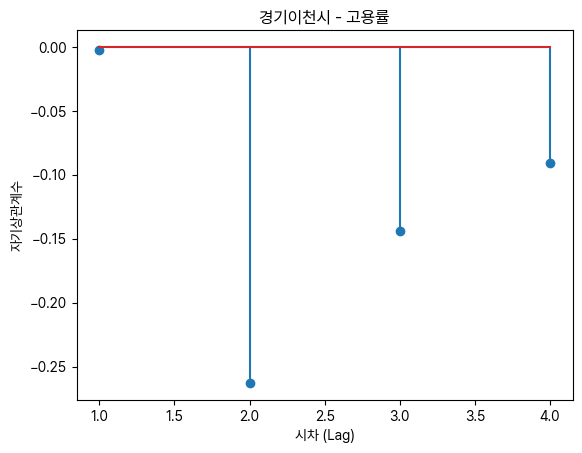

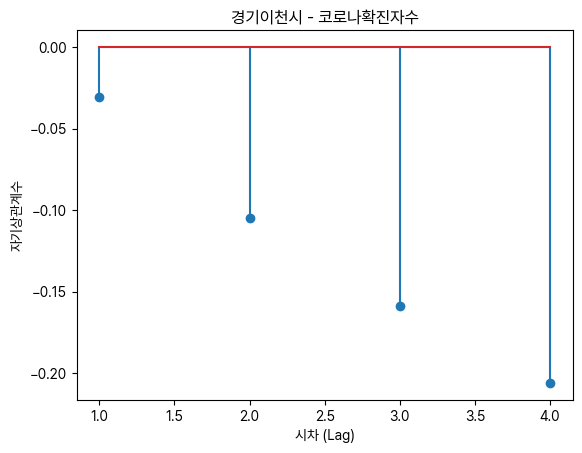

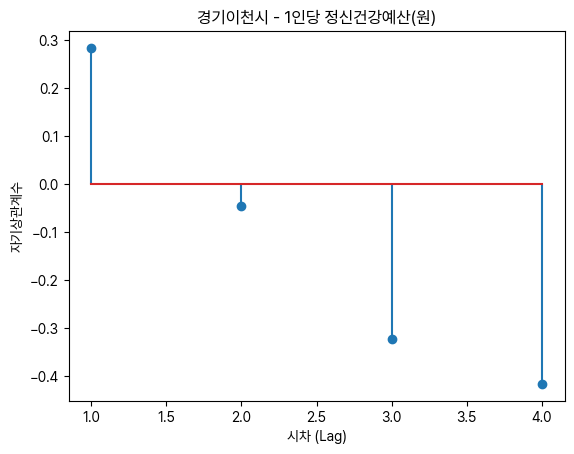

C:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


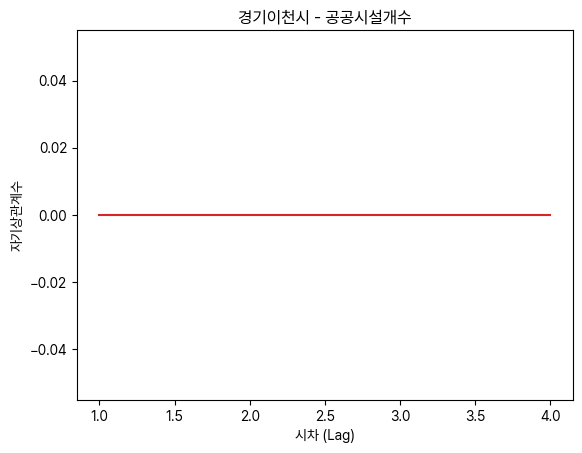

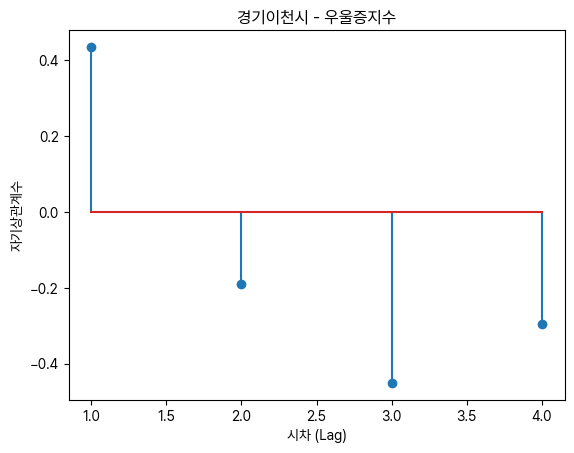

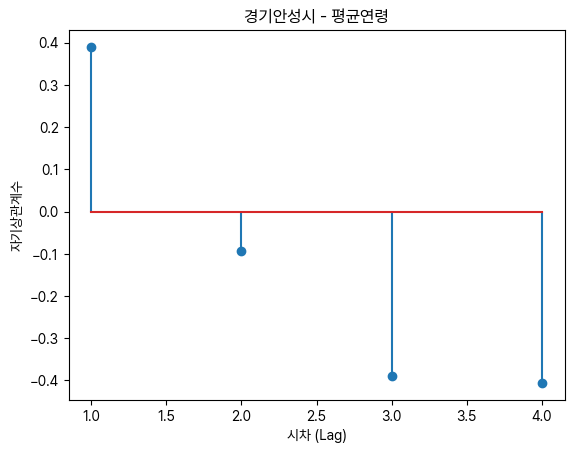

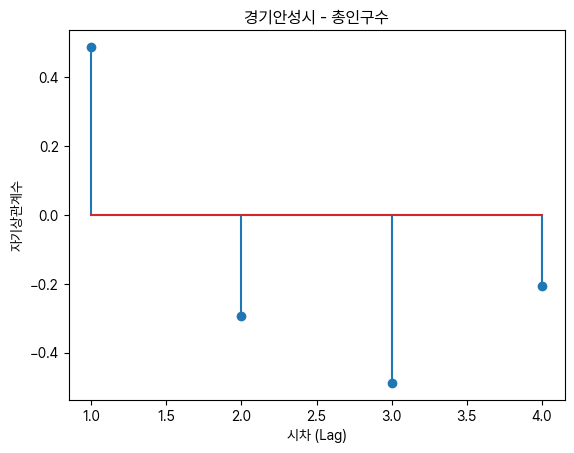

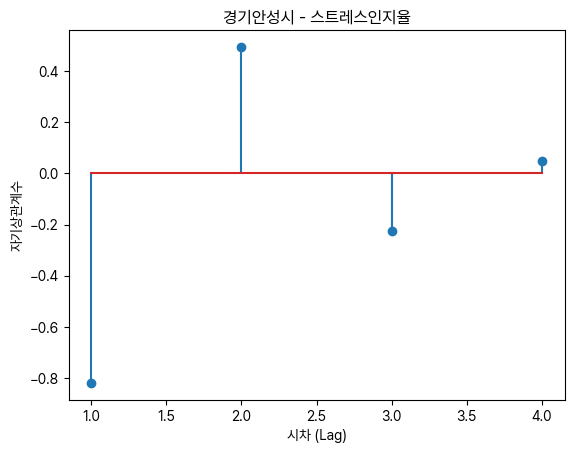

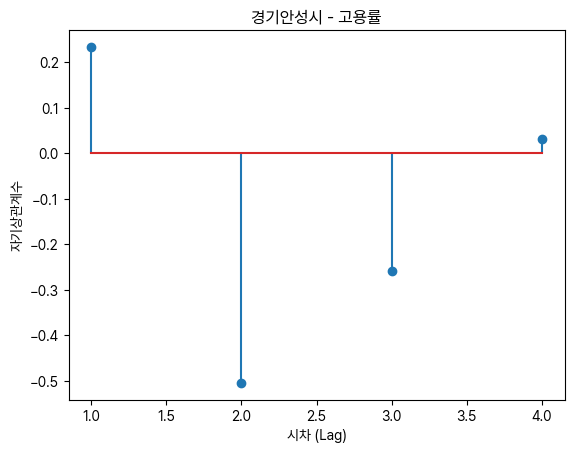

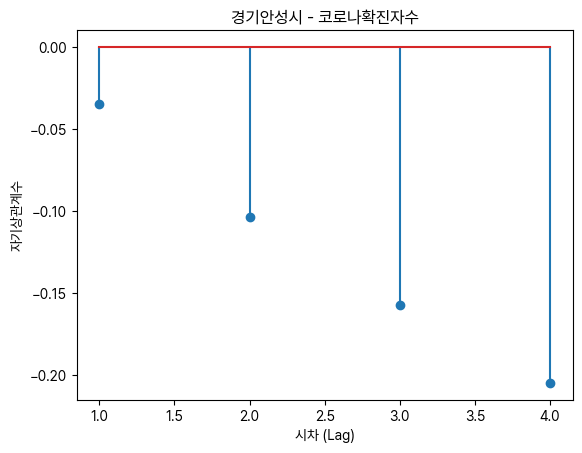

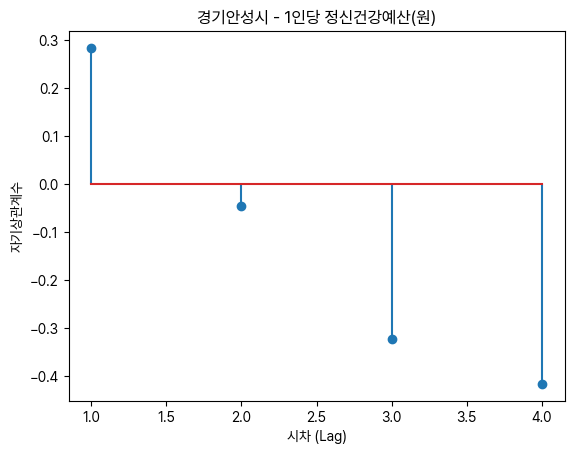

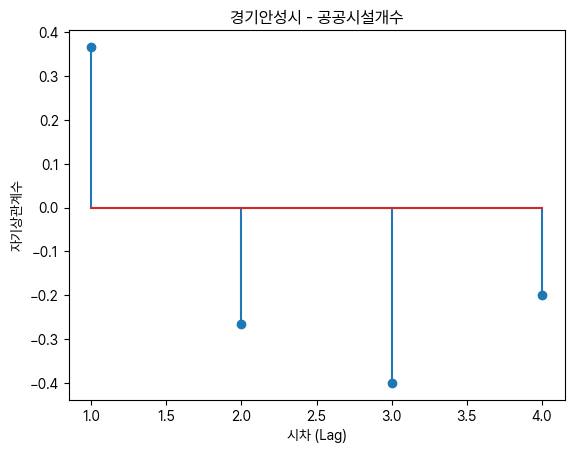

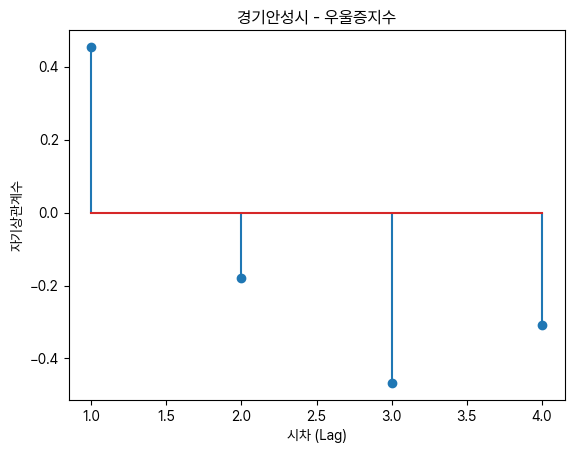

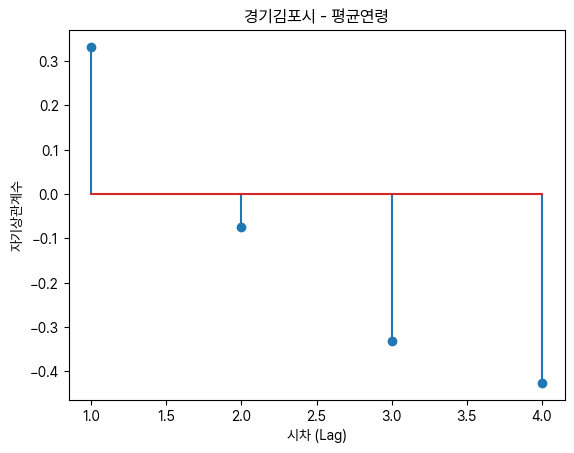

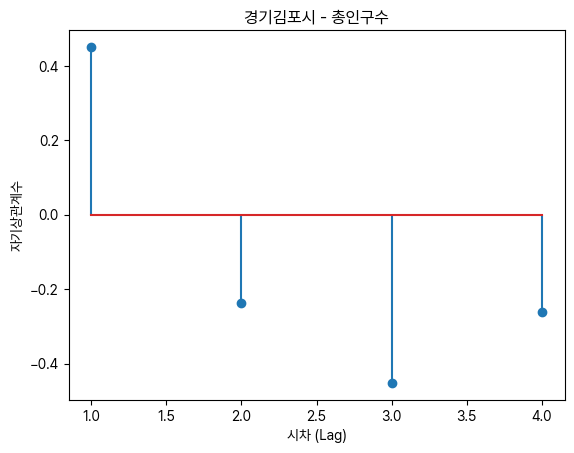

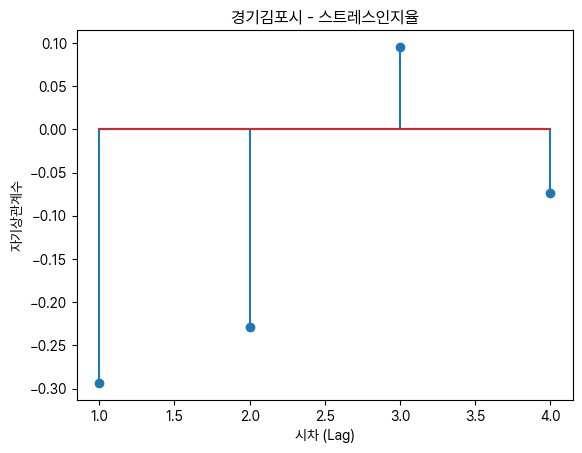

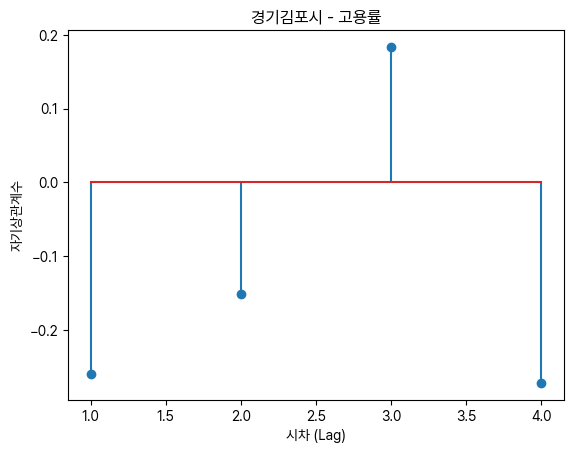

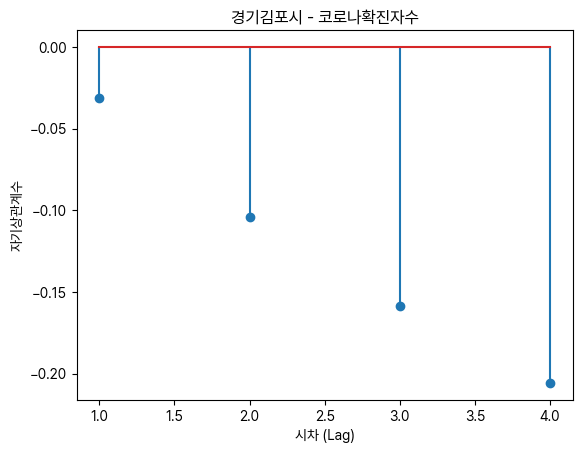

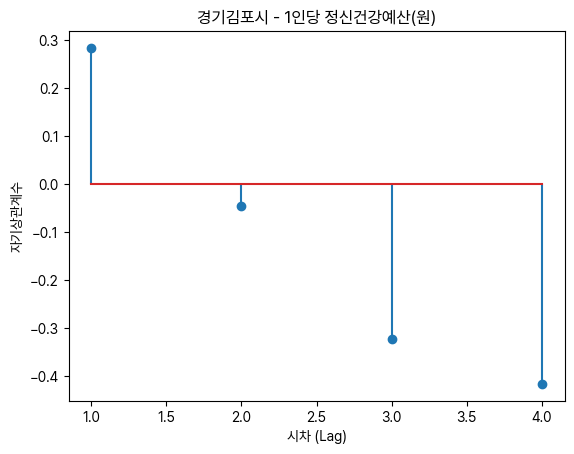

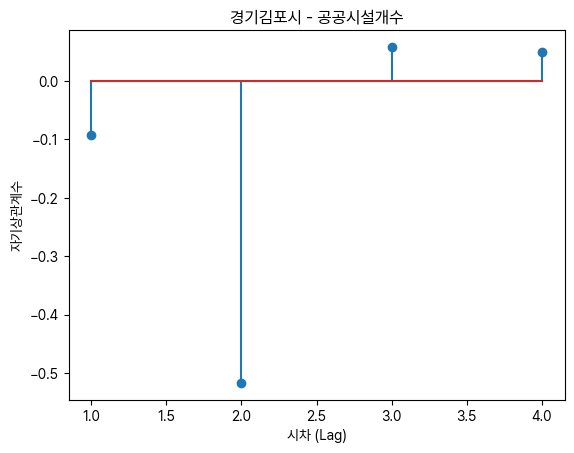

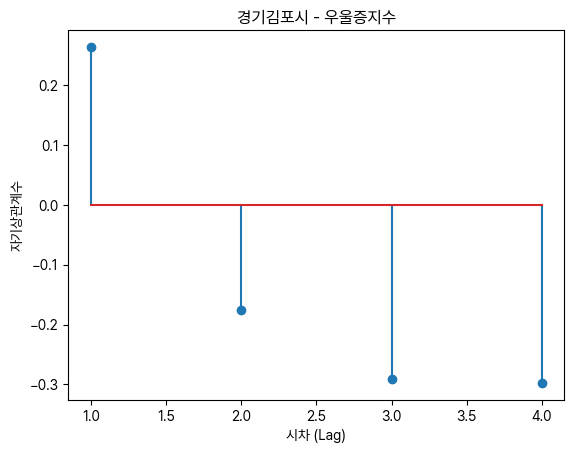

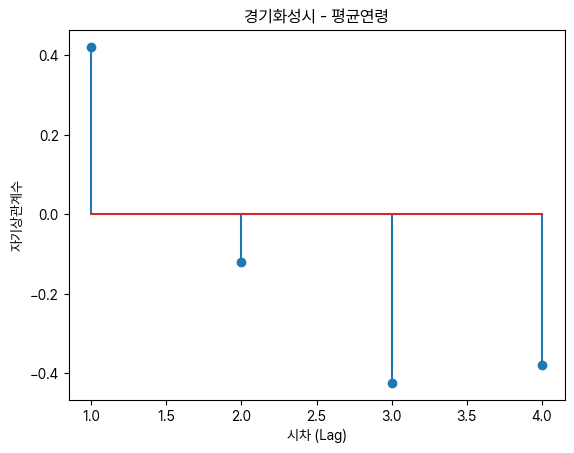

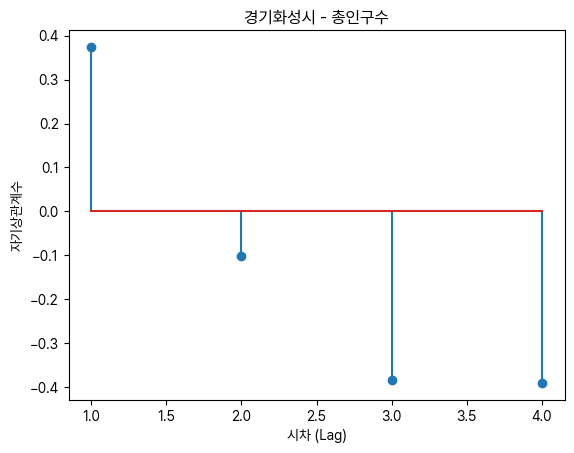

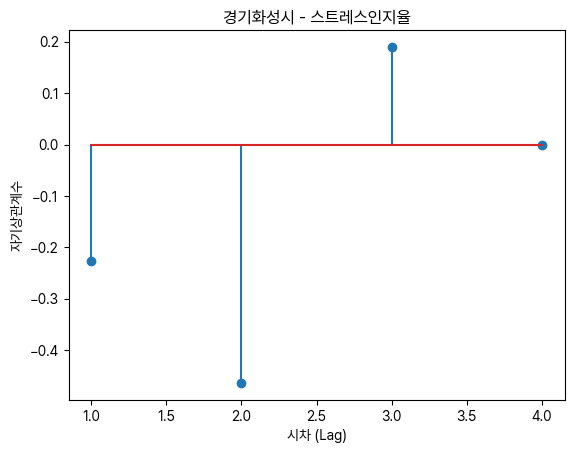

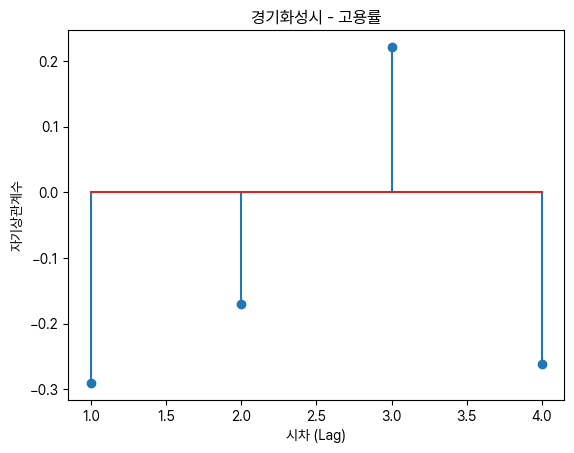

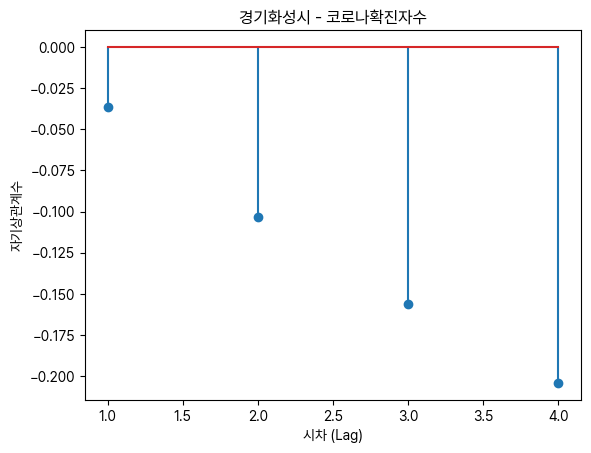

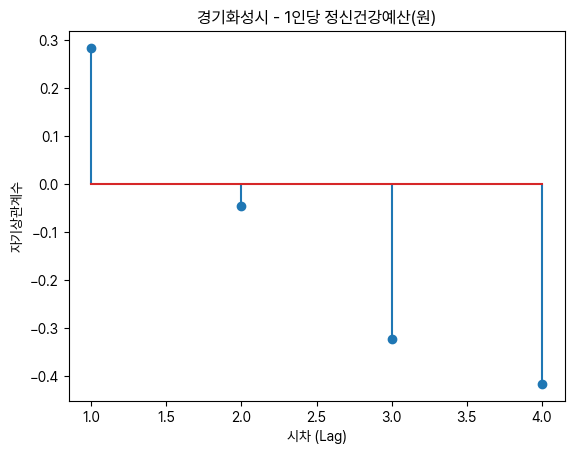

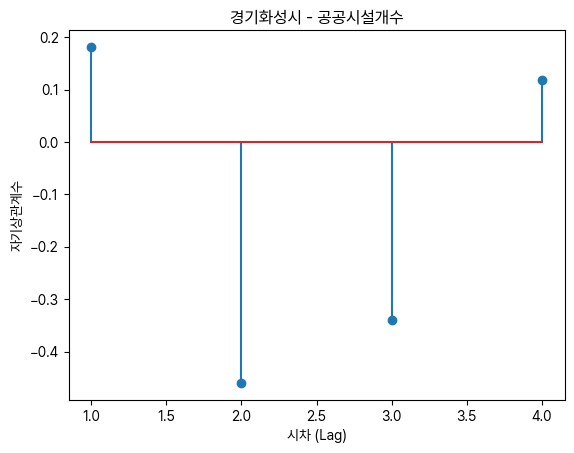

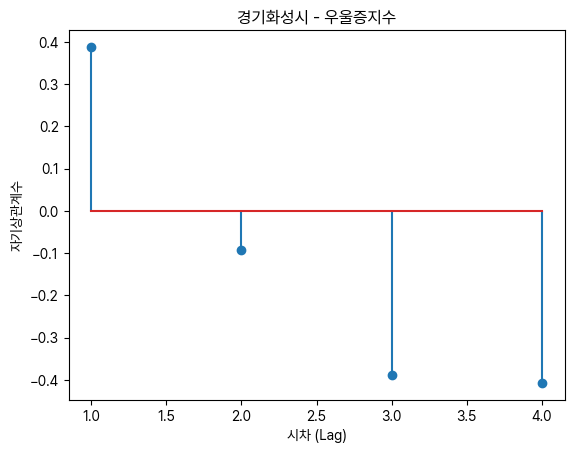

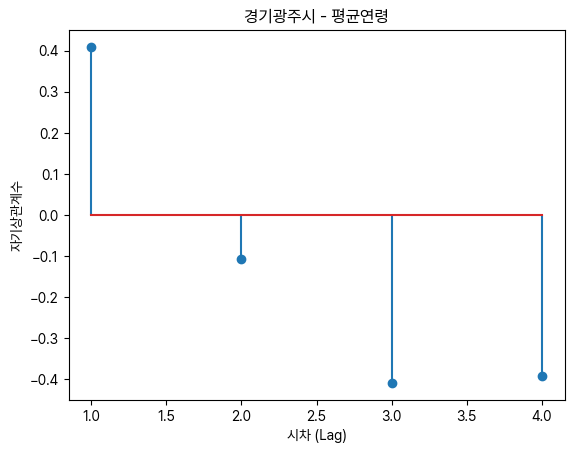

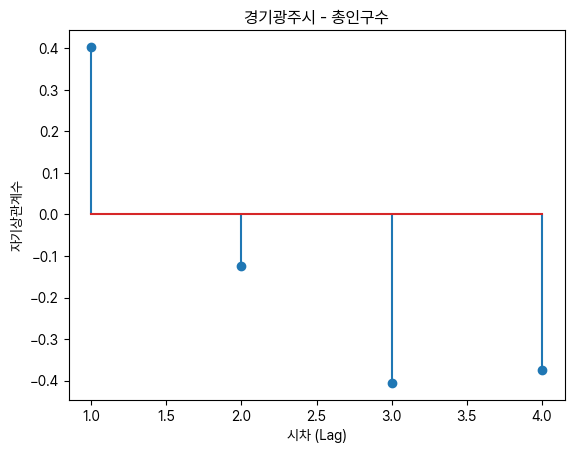

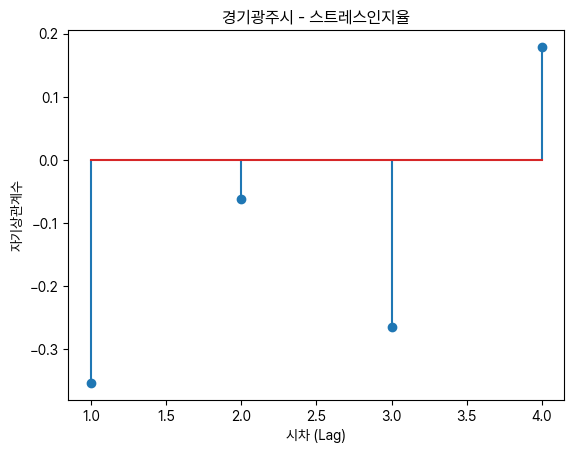

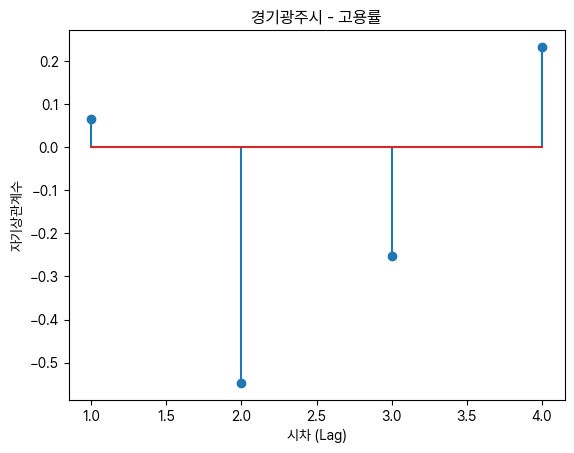

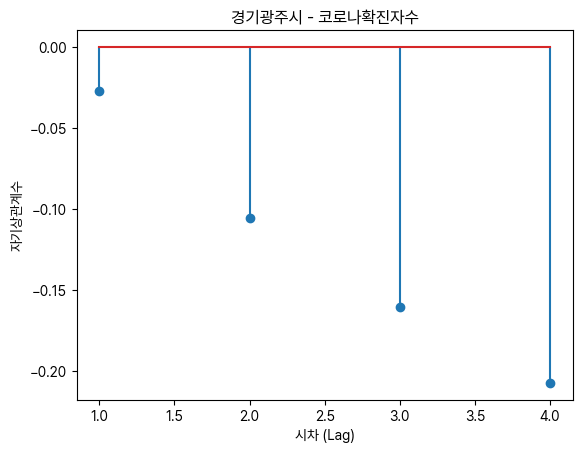

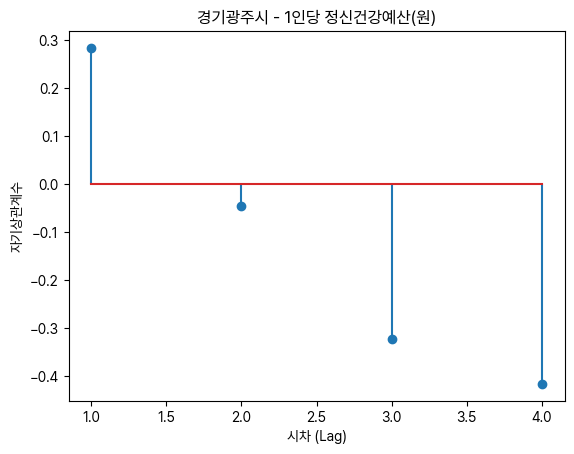

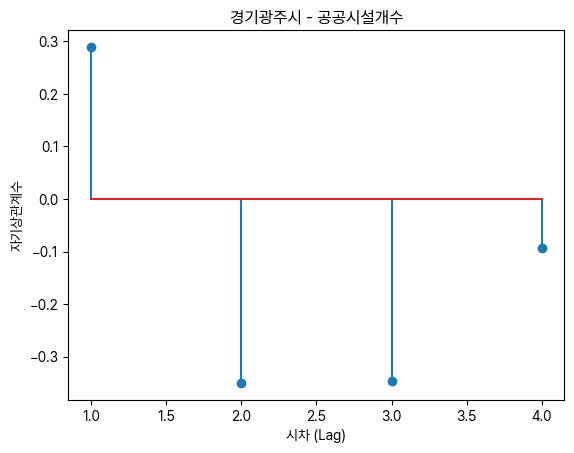

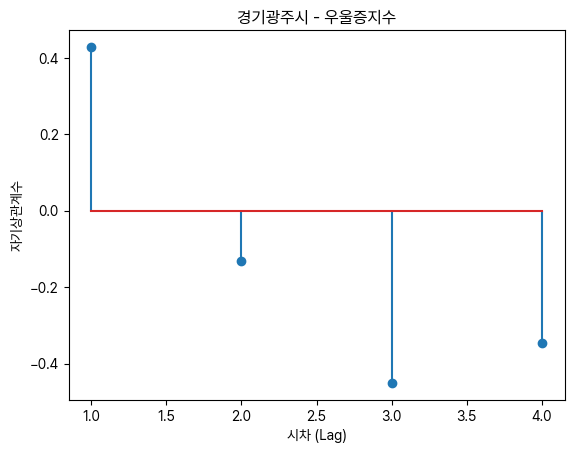

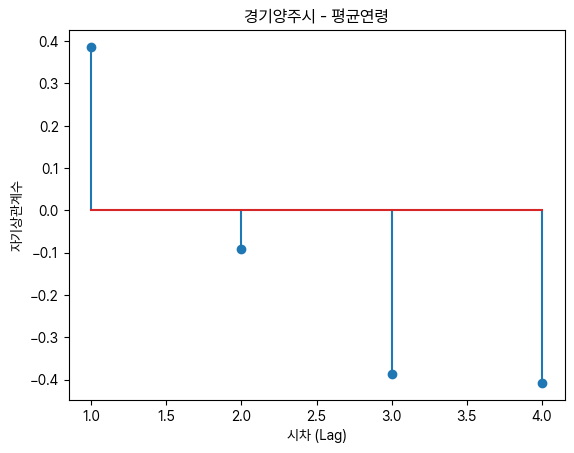

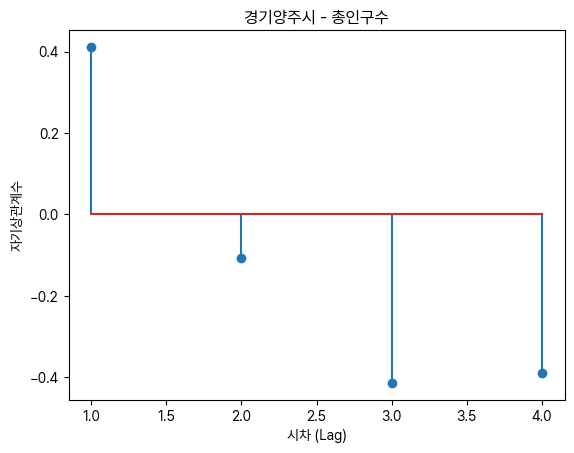

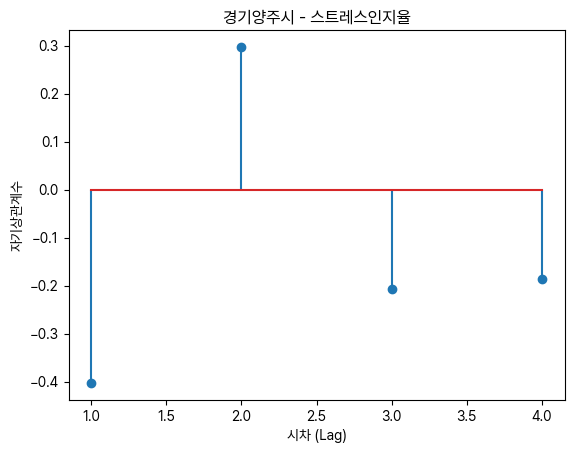

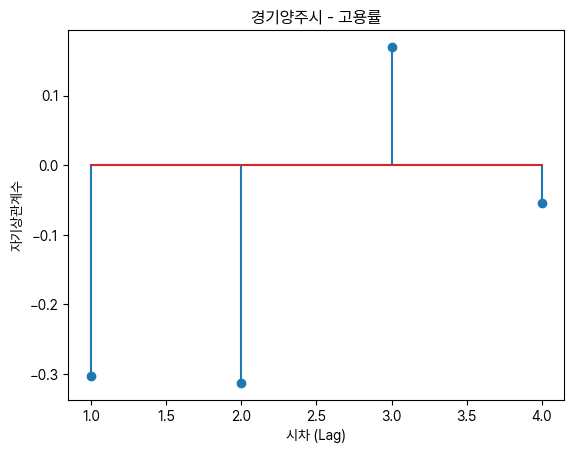

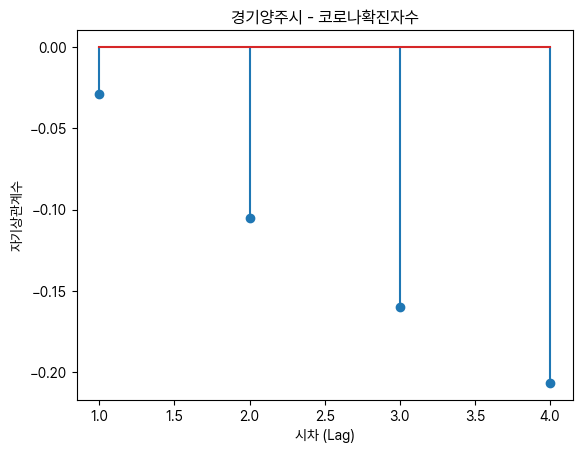

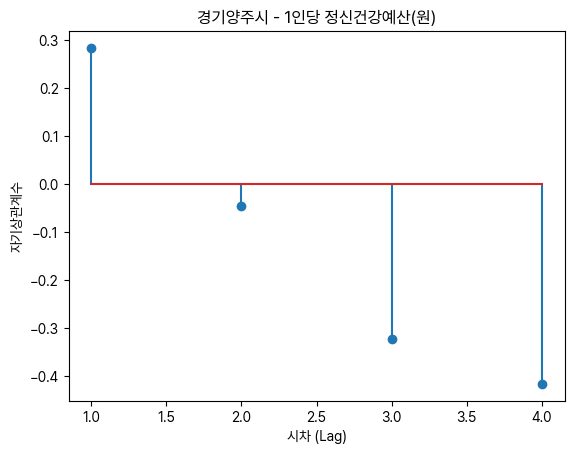

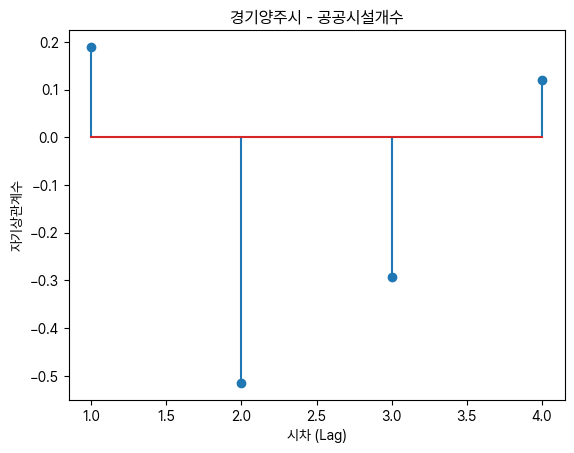

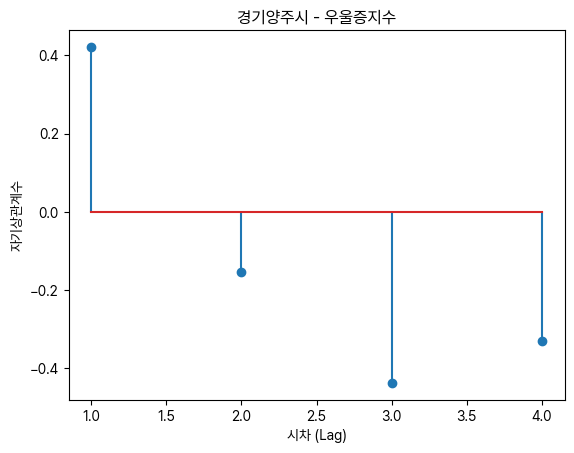

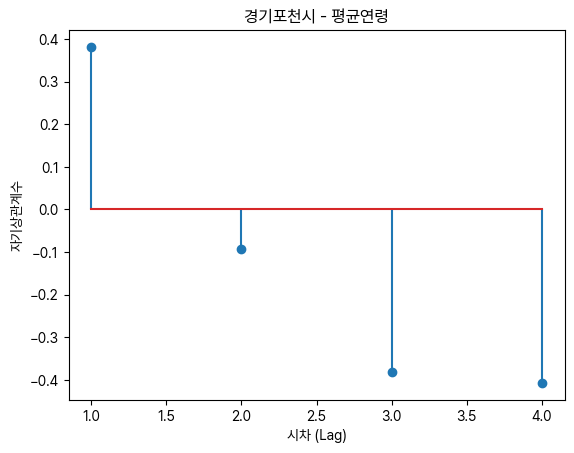

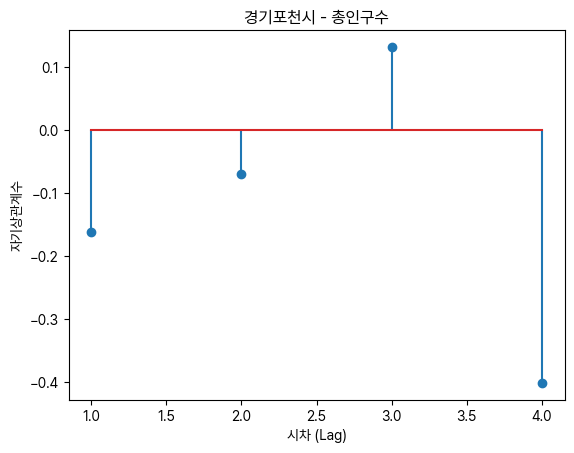

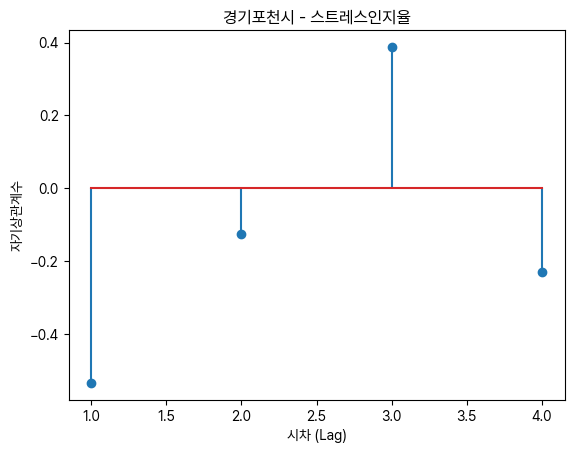

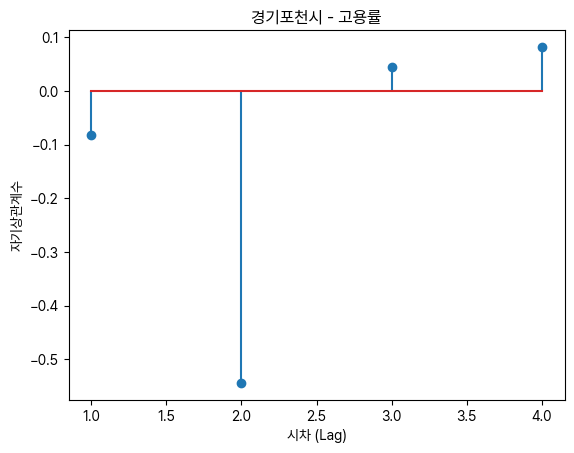

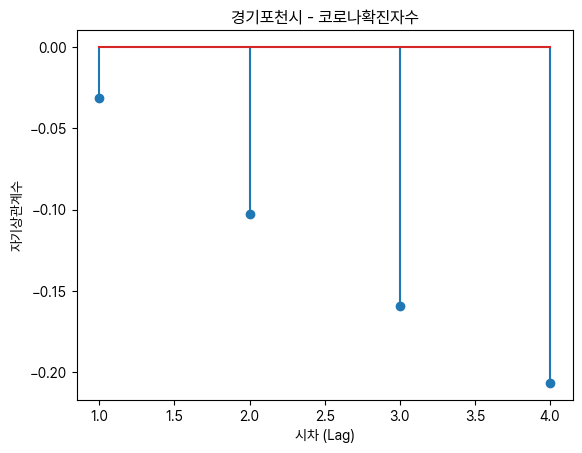

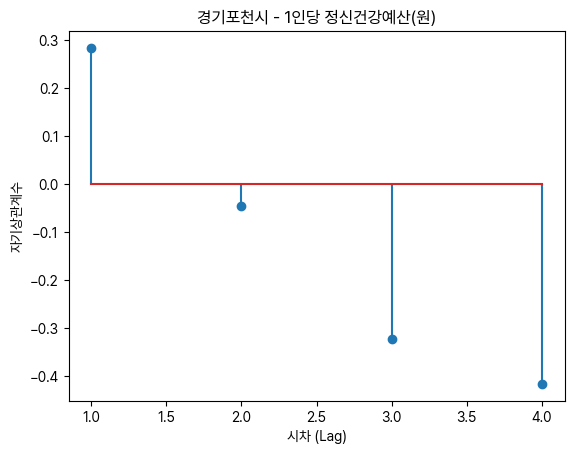

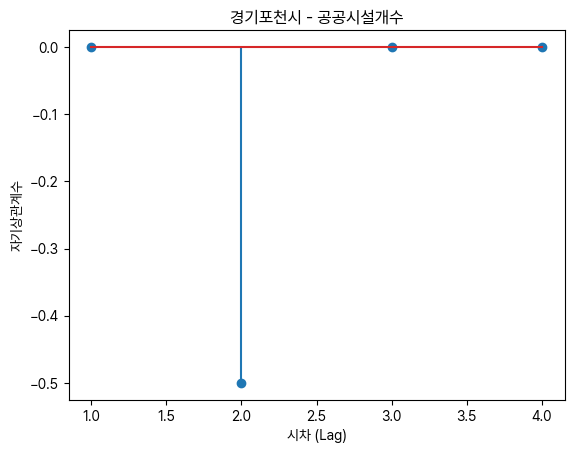

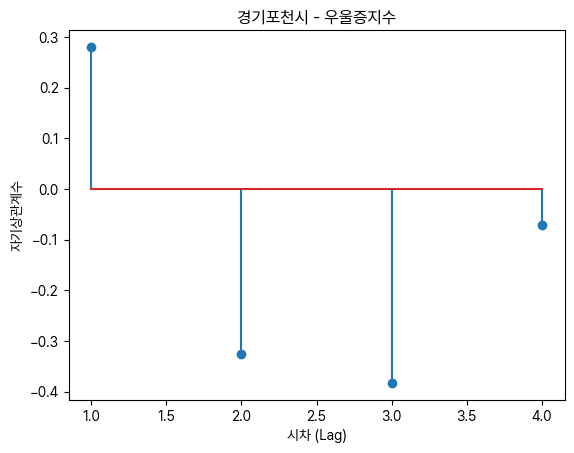

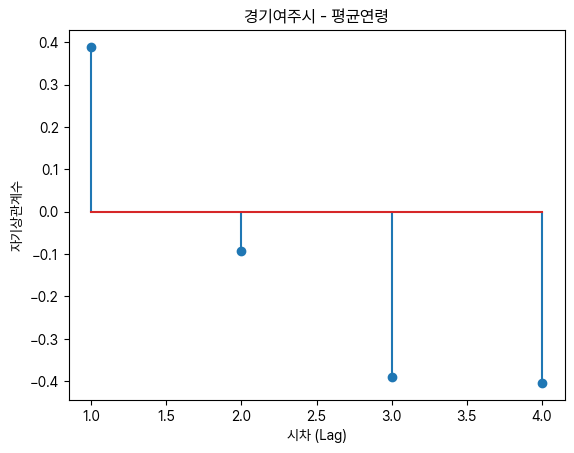

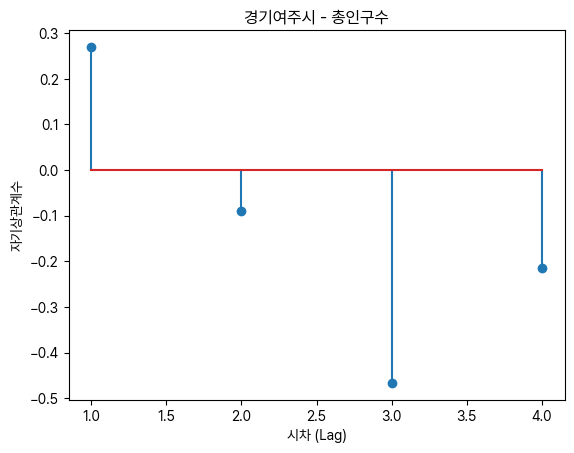

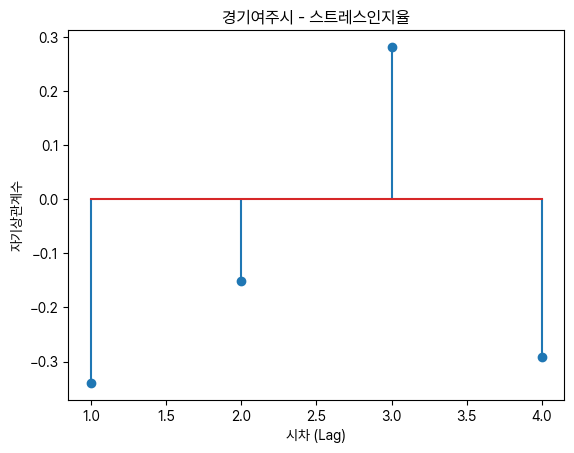

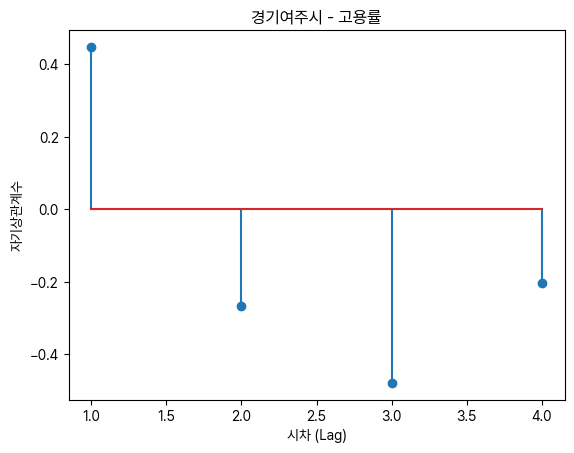

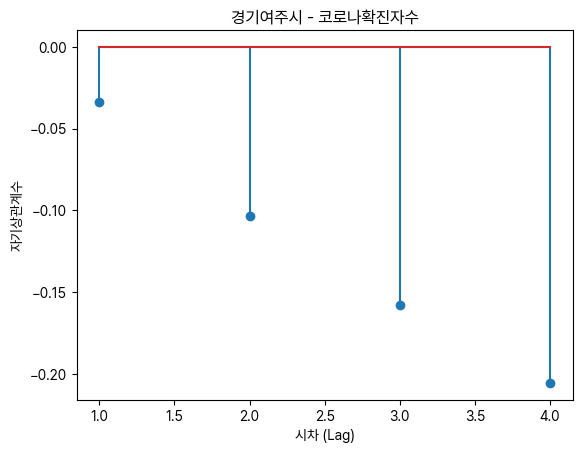

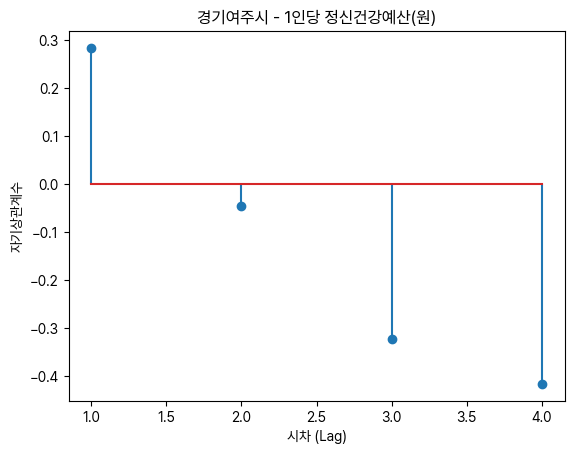

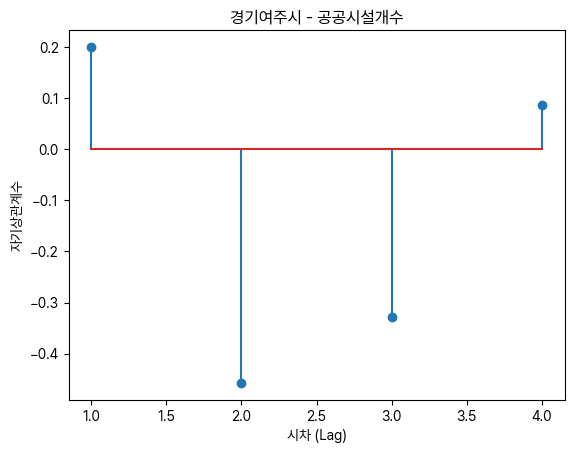

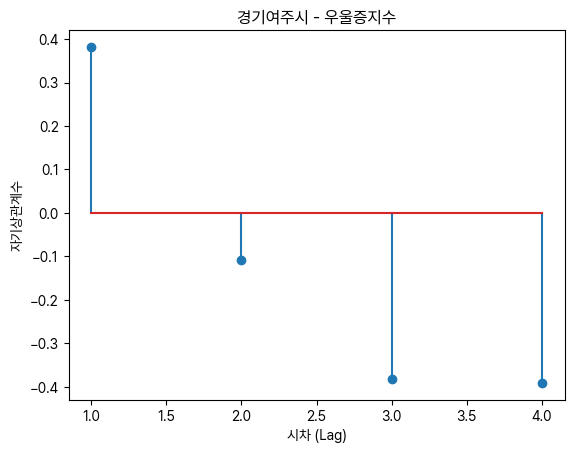

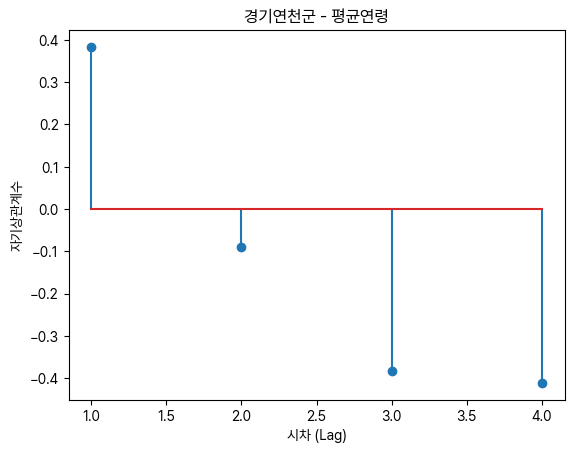

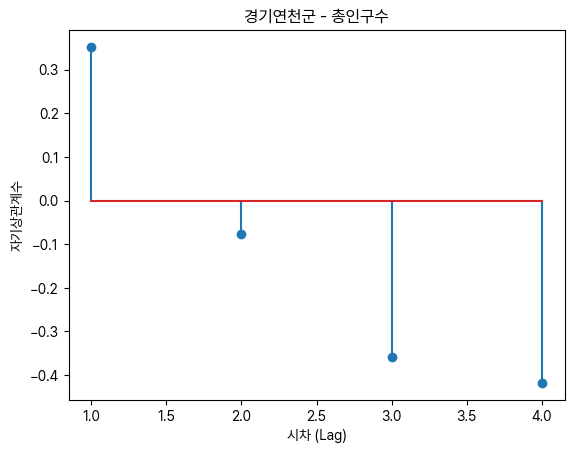

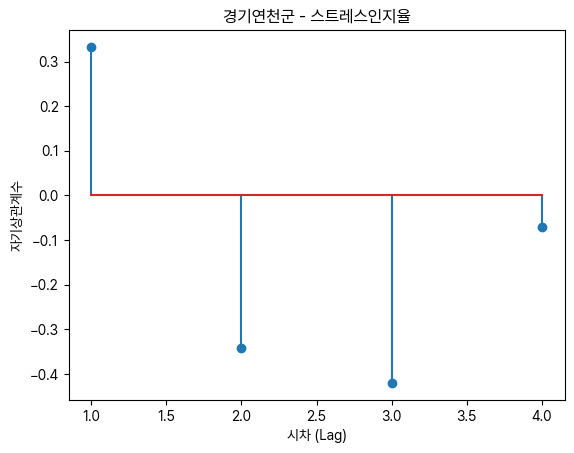

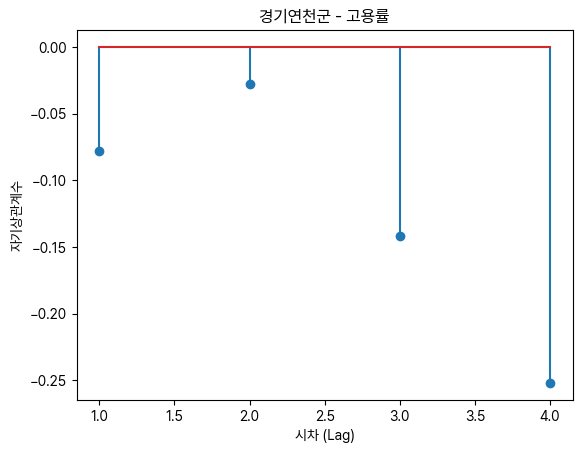

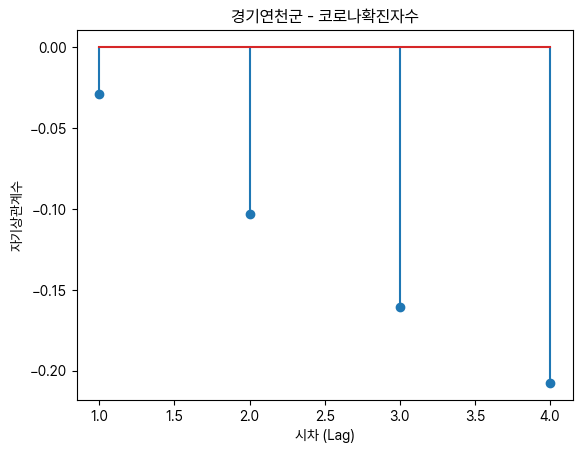

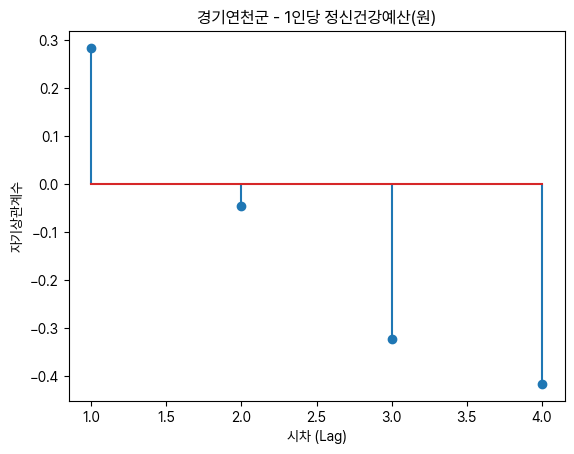

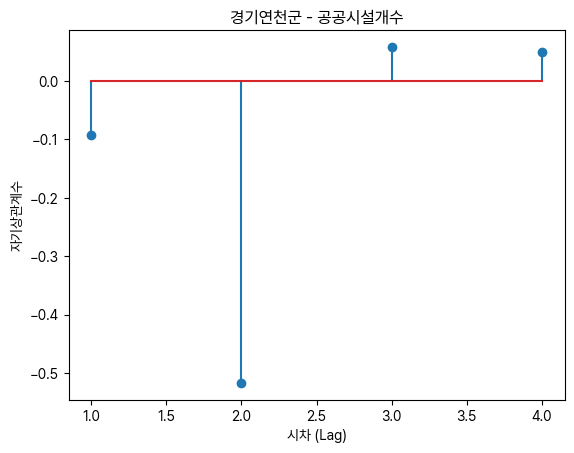

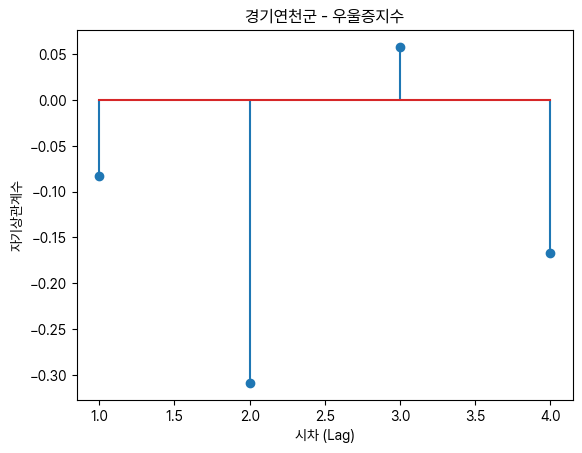

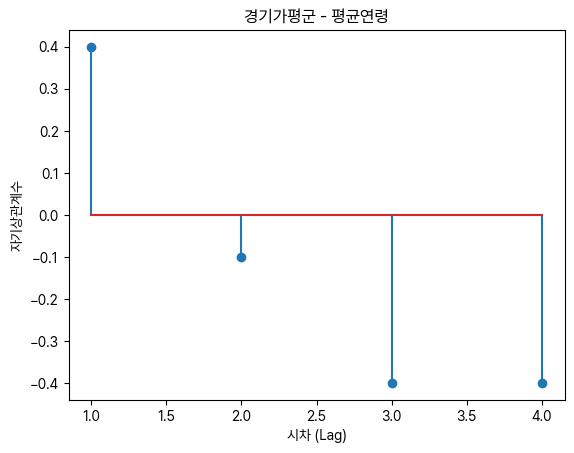

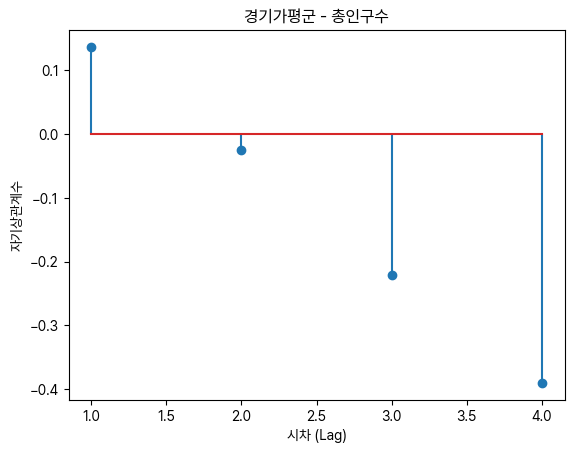

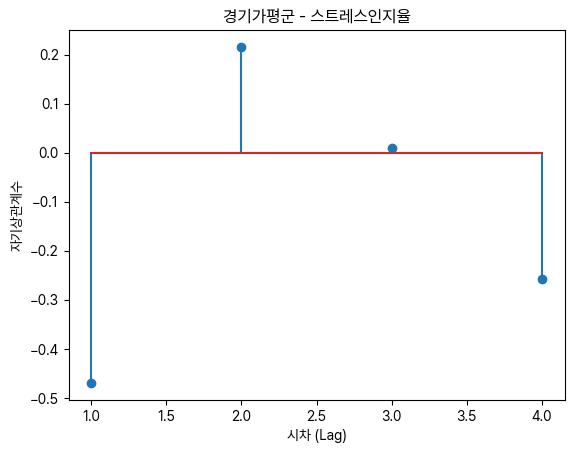

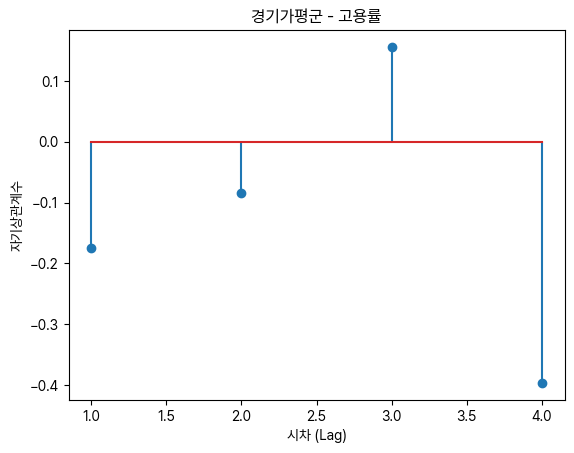

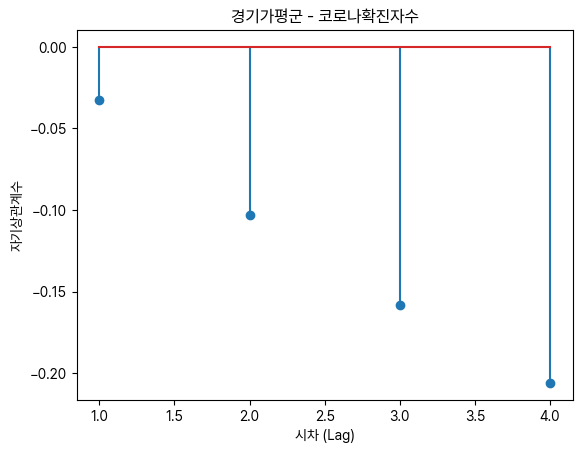

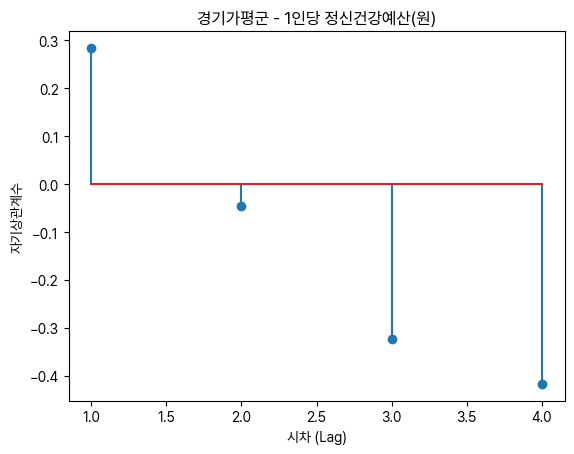

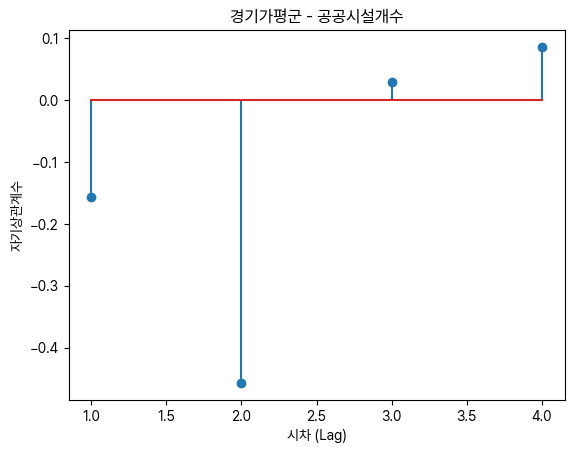

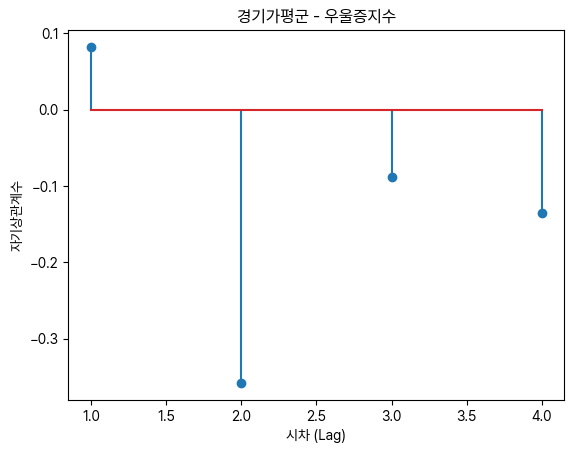

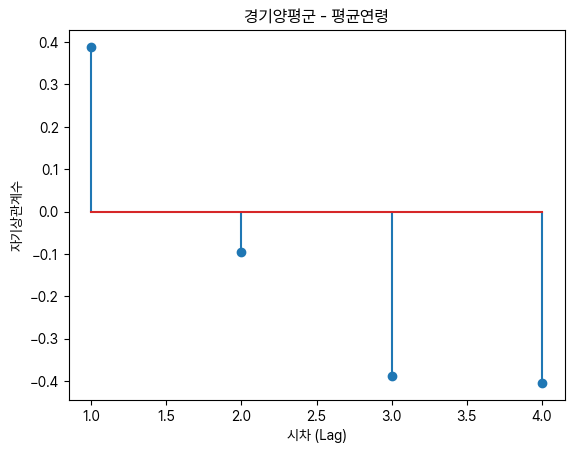

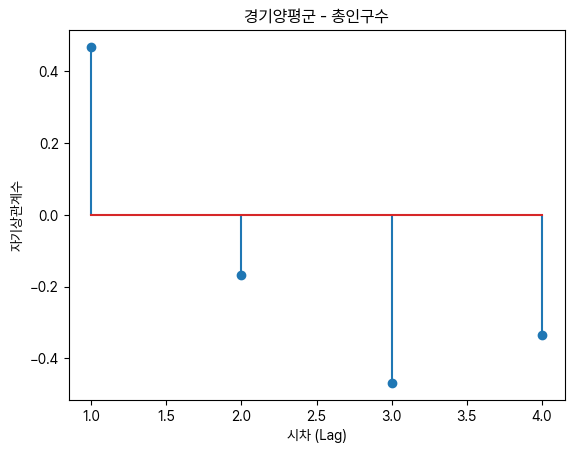

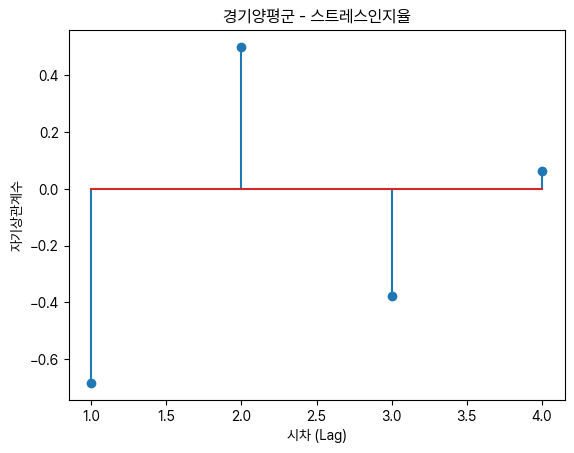

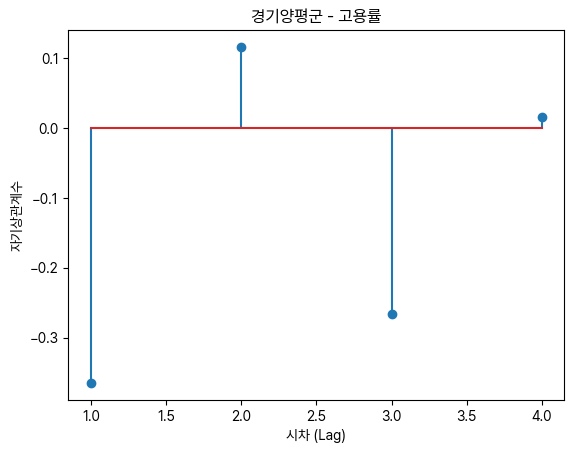

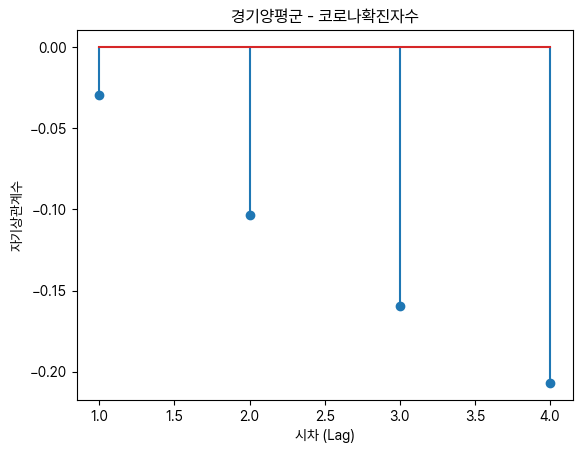

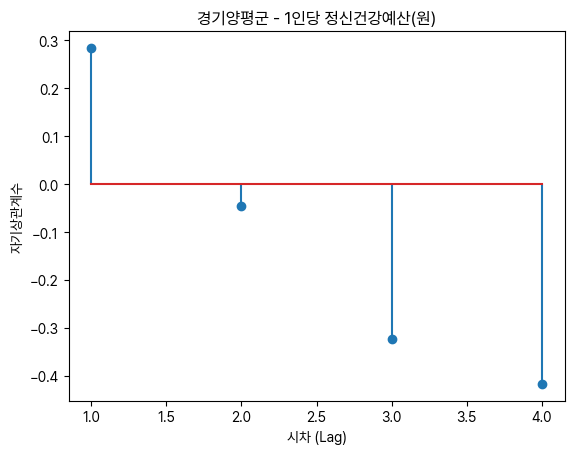

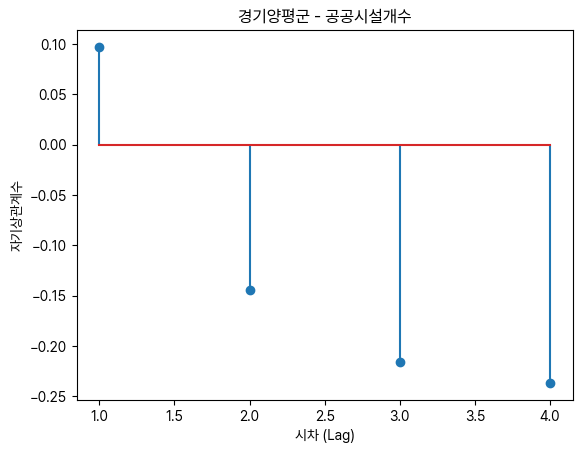

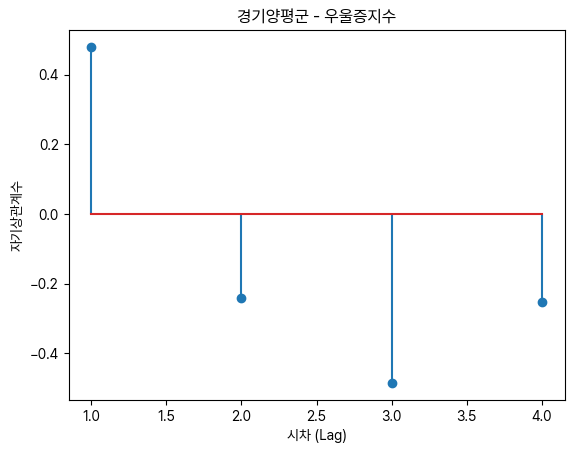

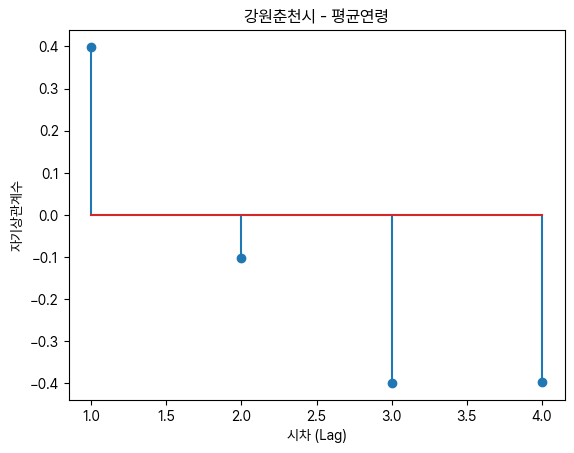

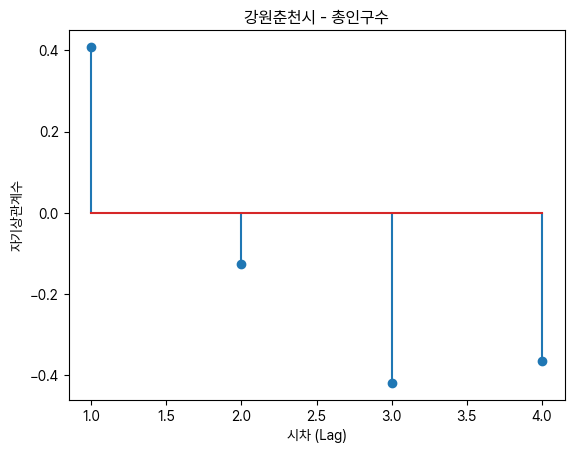

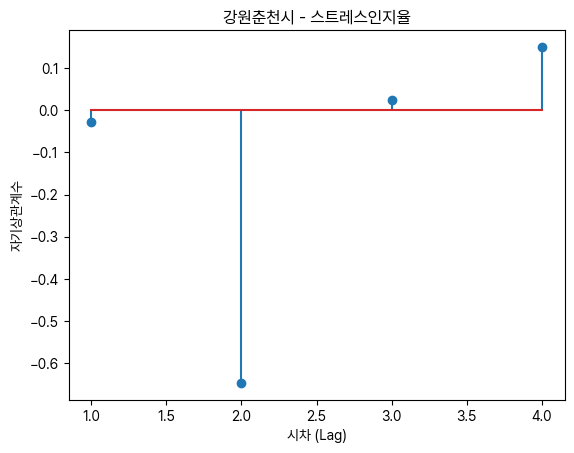

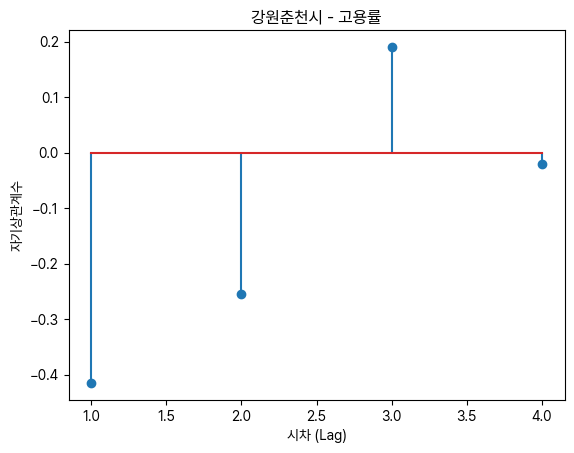

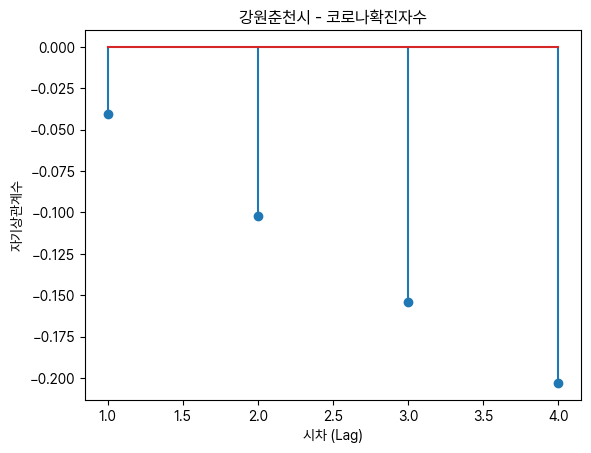

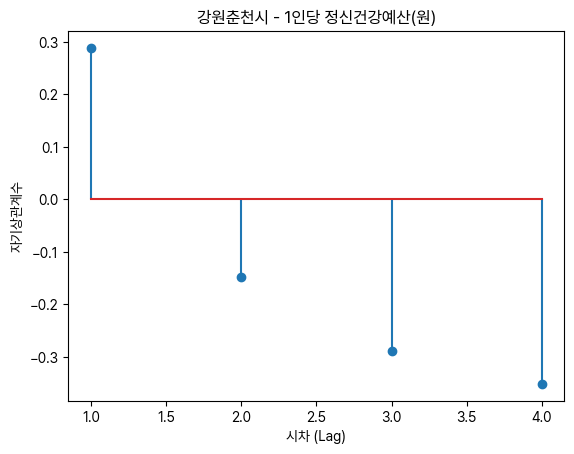

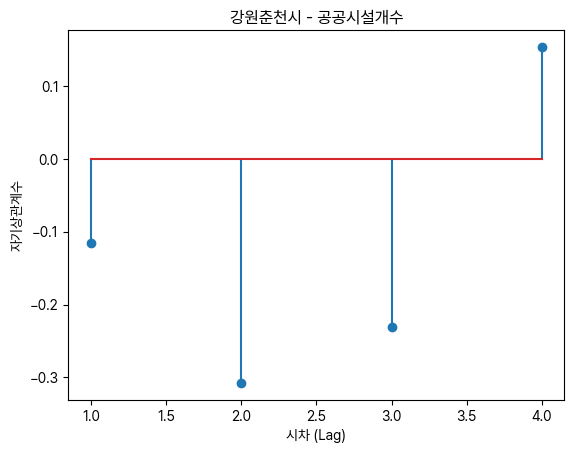

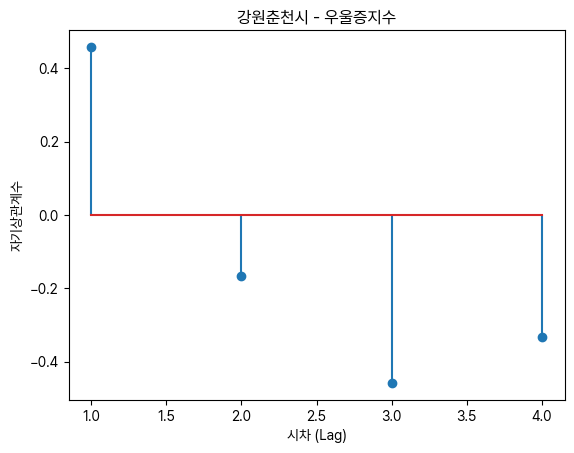

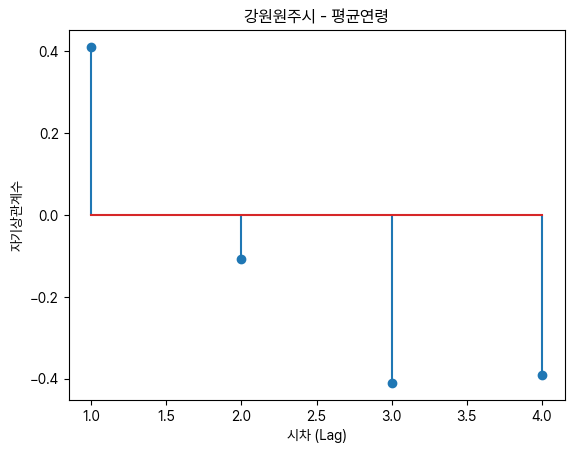

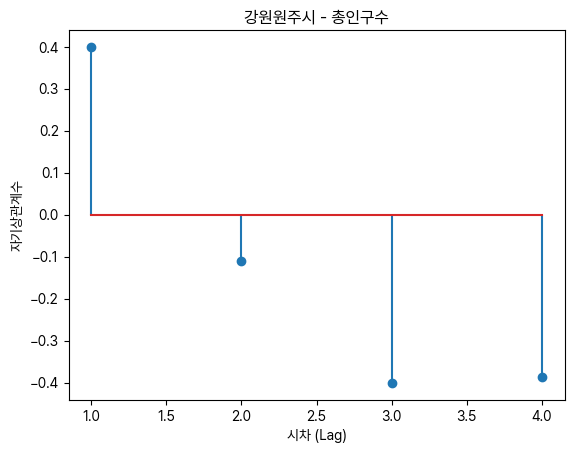

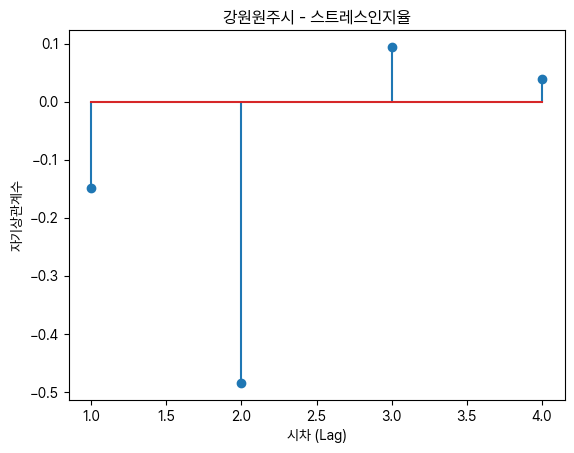

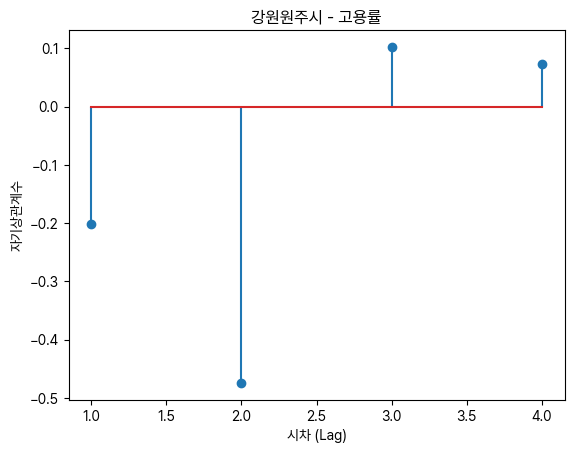

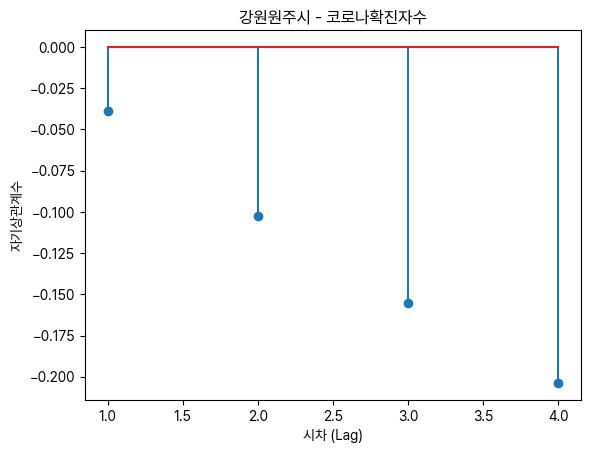

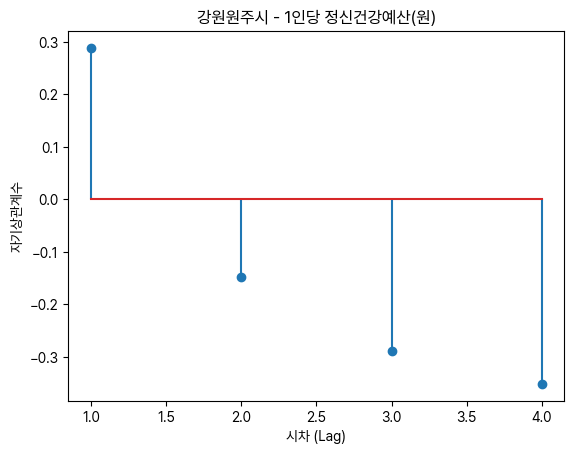

C:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


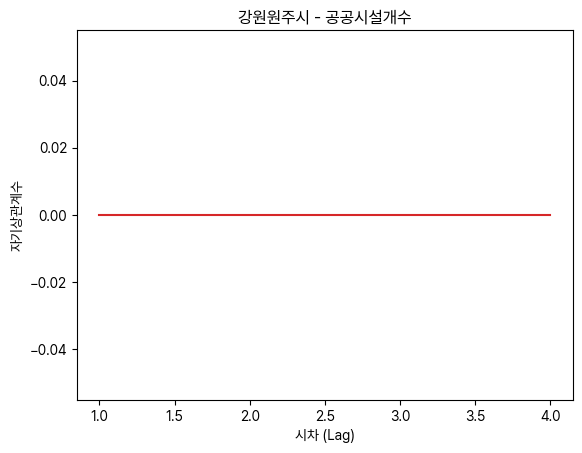

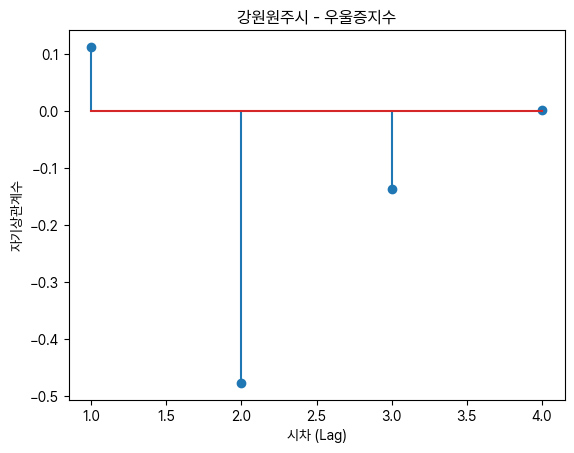

In [177]:
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt

col = ['평균연령', '총인구수', '스트레스인지율', '고용률', '코로나확진자수', '1인당 정신건강예산(원)', '공공시설개수', '우울증지수']

for j in range(len(lst)):
    f_1111000000 = final[final['행정번호'] == lst[j]]
    #f_1111000000.info()
    for i in range(len(col)):
        data = np.array(f_1111000000[col[i]])


        time_series = pd.Series(data, index=pd.to_datetime(f_1111000000['년도'],format='%Y'))

        acf_result = sm.tsa.acf(time_series, nlags=len(f_1111000000['년도'])-1)

        plt.stem(range(1, len(f_1111000000['년도'])), acf_result[1:])
        plt.xlabel('시차 (Lag)')
        plt.ylabel('자기상관계수')
        plt.title(f"{f_1111000000['시군구'].unique()[0]} - {col[i]}")
        plt.show()

In [176]:
lst = list(final['행정번호'].unique())
lst
lst = lst[80:117]
lst

[4113300000,
 4113500000,
 4115000000,
 4117100000,
 4117300000,
 4119000000,
 4121000000,
 4122000000,
 4125000000,
 4127100000,
 4127300000,
 4128100000,
 4128500000,
 4128700000,
 4129000000,
 4131000000,
 4136000000,
 4137000000,
 4139000000,
 4141000000,
 4143000000,
 4145000000,
 4146100000,
 4146300000,
 4146500000,
 4148000000,
 4150000000,
 4155000000,
 4157000000,
 4159000000,
 4161000000,
 4163000000,
 4165000000,
 4167000000,
 4180000000,
 4182000000,
 4183000000,
 4211000000,
 4213000000]

In [163]:
lst = np.array(['서울광진구'], dtype=object)

# NumPy 배열에서 값 가져오기
value = lst[0]
value

'서울광진구'

In [165]:
f_1111000000['시군구'].unique()[0]

'서울광진구'

In [184]:
lst = list(final['행정번호'].unique())
len(lst[:117])

117

In [182]:
a = ['서울종로구-코로나확진자수',
'서울중구-코로나확진자수',
'서울용산구-코로나확진자수',
'서울성동구-코로나확진자수',
'서울광진구-코로나확진자수',
'서울동대문구-코로나확진자수',
'서울중랑구-코로나확진자수',
'서울성북구-코로나확진자수',
'서울강북구-코로나확진자수',
'서울노원구-코로나확진자수',
'서울은평구-코로나확진자수',
'서울서대문구-총인구수',
'서울서대문구-코로나확진자수',
'서울마포구-코로나확진자수',
'서울양천구-코로나확진자수',
'서울강서구-공공시설개수',
'서울구로구-코로나확진자수',
'서울구로구-공공시설개수',
'서울금천구-코로나확진자수',
'서울영등포구-코로나확진자수',
'서울동작구-코로나확진자수',
'서울관악구-코로나확진자수',
'서울서초구-코로나확진자수',
'서울강남구-코로나확진자수',
'서울송파구-코로나확진자수',
'서울강동구-코로나확진자수',
'서울강동구-공공시설개수',
'부산진구-코로나확진자수',
'부산수영구-코로나확진자수',
'부산수영구-공공시설개수',
'부산동구-코로나확진자수',
'부산중구-코로나확진자수',
'부산북구-코로나확진자수',
'부산동래구-코로나확진자수',
'부산남구-스트레스인지율d',
'부산남구-코로나확진자수',
'부산사상구-코로나확진자수',
'부산해운대구-코로나확진자수',
'부산서구-코로나확진자수',
'부산금정구-코로나확진자수',
'부산강서구-코로나확진자수',
'부산영도구-코로나확진자수',
'부산연제구-코로나확진자수',
'부산사하구-코로나확진자수',
'부산기장군-코로나확진자수',
'부산기장군-공공시설개수',
'대구중구-코로나확진자수',
'대구동구-코로나확진자수',
'대구서구-코로나확진자수',
'대구남구-코로나확진자수',
'대구북구-코로나확진자수',
'대구북구-공공시설개수',
'대구수성구-코로나확진자수',
'대구달서구-코로나확진자수',
'대구달성군-코로나확진자수',
'인천중구-코로나확진자수',
'인천동구-코로나확진자수',
'인천미추홀구-코로나확진자수',
'인천연수구-코로나확진자수',
'인천남동구-코로나확진자수',
'인천부평구-코로나확진자수',
'인천부평구-공공시설개수',
'인천계양구-코로나확진자수',
'인천서구-코로나확진자수',
'인천강화군-코로나확진자수',
'인천옹진군-코로나확진자수',
'광주동구-코로나확진자수',
'광주서구-코로나확진자수',
'광주남구-코로나확진자수',
'광주북구-코로나확진자수',
'광주광산구-코로나확진자수',
'대전동구-코로나확진자수',
'대전중구-코로나확진자수',
'대전서구-코로나확진자수',
'대전유성구-코로나확진자수',
'대전대덕구-코로나확진자수',
'울산중구-코로나확진자수',
'울산중구-공공시설개수',
'울산남구-코로나확진자수',
'울산동구-코로나확진자수',
'울산북구-코로나확진자수',
'울산울주군-코로나확진자수',
'세종시-코로나확진자수',
'경기수원장안구-코로나확진자수',
'경기수원장안구-공공시설개수',
'경기수원권선구-코로나확진자수',
'경기수원권선구-공공시설개수',
'경기수원팔달구-코로나확진자수',
'경기수원팔달구-공공시설개수',
'경기수원영통구-코로나확진자수',
'경기수원영통구-공공시설개수',
'경기성남수정구-코로나확진자수',
'경기성남수정구-공공시설개수',
'경기성남중원구-코로나확진자수',
'경기성남중원구-공공시설개수',
'경기성남분당구-코로나확진자수',
'경기성남분당구-공공시설개수',
'경기의정부시-코로나확진자수',
'경기안양만안구-코로나확진자수',
'경기안양동안구-코로나확진자수',
'경기부천시-코로나확진자수',
'경기광명시-코로나확진자수',
'경기평택시-코로나확진자수',
'경기동두천시-코로나확진자수',
'경기안산상록구-코로나확진자수',
'경기안산단원구-코로나확진자수',
'경기고양덕양구-코로나확진자수',
'경기고양일산동구-코로나확진자수',
'경기고양일산서구-코로나확진자수',
'경기과천시-코로나확진자수',
'경기구리시-코로나확진자수',
'경기남양주시-코로나확진자수',
'경기오산시-코로나확진자수',
'경기시흥시-코로나확진자수'
'경기군포시-코로나확진자수',
'경기의왕시-코로나확진자수',
'경기하남시-코로나확진자수',
'경기용인처인구-코로나확진자수',
'경기용인기흥구-코로나확진자수',
'경기용인수지구-코로나확진자수',
'경기파주시-코로나확진자수',
'경기이천시-코로나확진자수',
'경기안성시-코로나확진자수',
'경기김포시-코로나확진자수',
'경기화성시-코로나확진자수',
'경기광주시-코로나확진자수',
'경기양주시-코로나확진자수',
'경기포천시-코로나확진자수',
'경기여주시-코로나확진자수',
'경기연천군-코로나확진자수',
'경기가평군-코로나확진자수',
'경기양평군-코로나확진자수'
]
len(a) - 14

117